In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


# Loading data

In [324]:
df_RAW_recipes = pd.read_csv('C:/Users/Dell/Desktop/notes/San Jose State University/Sem2/CMPE 256-01 Advanced Data Mining/Project/data/RAW_recipes.csv')

In [325]:
train_df = pd.read_csv(r"C:/Users/Dell/Desktop/notes/San Jose State University/Sem2/CMPE 256-01 Advanced Data Mining/Project/data/interactions_train.csv")

test_df = pd.read_csv(r"C:/Users/Dell/Desktop/notes/San Jose State University/Sem2/CMPE 256-01 Advanced Data Mining/Project/data/interactions_test.csv")

validation_df = pd.read_csv(r"C:/Users/Dell/Desktop/notes/San Jose State University/Sem2/CMPE 256-01 Advanced Data Mining/Project/data/interactions_validation.csv")

In [326]:
df_RAW_recipes.head()

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

# Exploratory Data Analysis

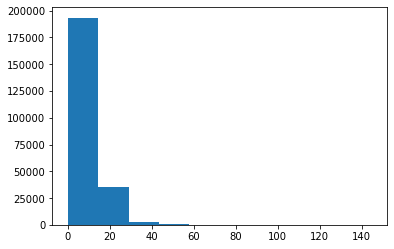

145

In [9]:
plt.hist(df_RAW_recipes['n_steps'])
plt.show()

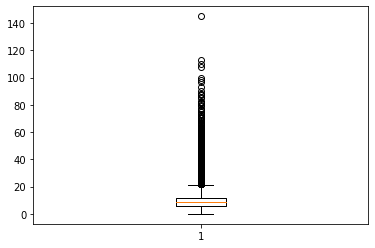

In [10]:
plt.boxplot(df_RAW_recipes['n_steps'])
plt.show()

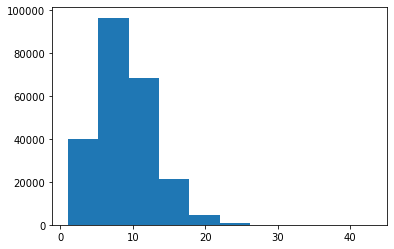

In [6]:
plt.hist(df_RAW_recipes['n_ingredients'])
plt.show() 

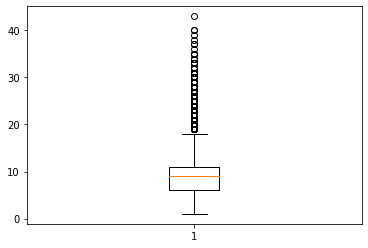

In [490]:
plt.boxplot(df_RAW_recipes['n_ingredients'])
plt.show()

2147483647


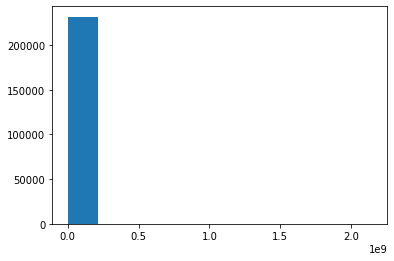

In [492]:
print(max(df_RAW_recipes['minutes']))
plt.hist(df_RAW_recipes['minutes'])
plt.show()

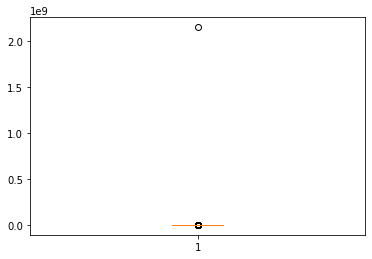

In [491]:
plt.boxplot(df_RAW_recipes['minutes'])
plt.show()

288000


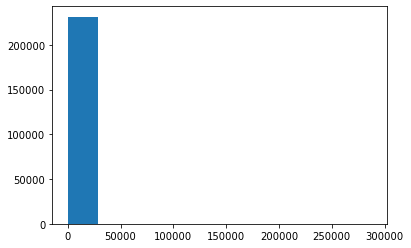

In [499]:
df_new_RAW_recipes = df_RAW_recipes[df_RAW_recipes['minutes']!=2147483647]
df_new_RAW_recipes = df_new_RAW_recipes[df_new_RAW_recipes['minutes']!=1051200]
print(max(df_new_RAW_recipes['minutes']))
plt.hist(df_new_RAW_recipes['minutes'])
plt.show()

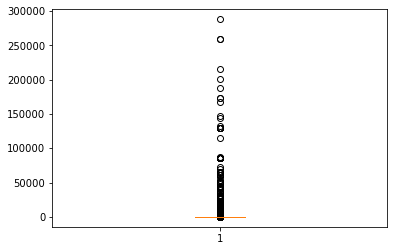

In [500]:
plt.boxplot(df_new_RAW_recipes['minutes'])
plt.show()

In [459]:
df_RAW_recipes.isna().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [327]:
df_RAW_interactions = pd.read_csv('C:/Users/Dell/Desktop/notes/San Jose State University/Sem2/CMPE 256-01 Advanced Data Mining/Project/data/RAW_interactions.csv')

In [14]:
df_RAW_interactions.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  
2  This worked very well and is EASY.  I used not...  
3  I made the Mexican topping and took it to bunk...  
4  Made the cheddar bacon topping, adding a sprin...

In [460]:
df_RAW_interactions.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

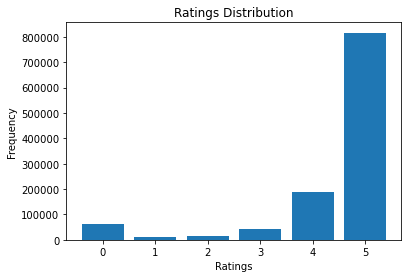

In [27]:
rating = list(range(min(df_RAW_interactions['rating']),max(df_RAW_interactions['rating']+1)))
# print(rating)
# Calculate the frequency of each rating
unique_ratings, counts = np.unique(df_RAW_interactions['rating'], return_counts=True)

# Specify the labels for the x-axis (if needed)
x_labels = unique_ratings

# Specify the heights of the bars as the frequency of each rating
heights = counts

# Create a bar chart
plt.bar(x_labels, heights)

# Set the title and labels for the chart
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

# Show the chart
plt.show()

# Sentimental analysis

In [462]:
#This is how to get the lastest model uncomment the lines and run it once it will be saved then comment those 5 lines and pull the model from local path
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# model.save_pretrained('C:/Users/Dell/Downloads/sentimodels')
# tokenizer.save_pretrained('C:/Users/Dell/Downloads/sentimodels')
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('C:/Users/Dell/Downloads/sentimodels') # path of your model folder
model = AutoModelForSequenceClassification.from_pretrained('C:/Users/Dell/Downloads/sentimodels') # path of the model folder

In [469]:
import re

def clean_text(text):
    '''
    Utility function to clean text text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

In [31]:
from scipy.special import softmax
def get_text_sentiment(text):
    '''
    Utility function to classify sentiment of passed text
    returing the probabilities of each label
    '''

    #huggingface

    labels=['negative', 'neutral', 'positive']
    encoded_input = tokenizer(clean_text(text), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    return scores[0],scores[1],scores[2]

In [42]:
#finding the sentiment of the reviews
sentipos =[]
sentineg =[]
sentineu =[]
print(len(df_RAW_interactions['review']))
for i in tqdm(range(200000)):
    try:
        senti = get_text_sentiment((list(df_RAW_interactions['review'][i])[0]))
        sentineg.append(senti[0])
        sentineu.append(senti[1])
        sentipos.append(senti[2])
        
    except:
        sentineg.append(0)
        sentineu.append(0)
        sentipos.append(0)

1132367


100%|█████████████████████████████████| 200000/200000 [1:09:41<00:00, 47.83it/s]


In [488]:
# checking the distribution of the probabilities of all the labels

[]

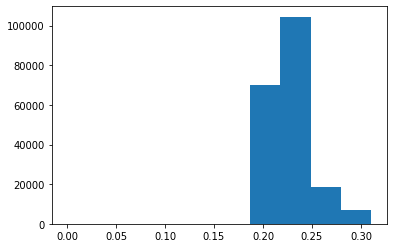

In [44]:
np_sentipos = np.array(sentipos)
np_sentipos
plt.hist(np_sentipos)
plt.plot()

[]

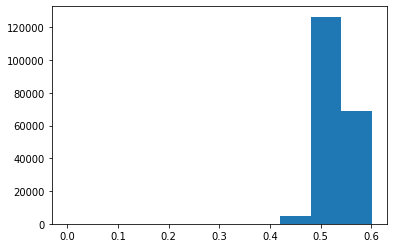

In [47]:
np_sentineu = np.array(sentineu)
np_sentineu
plt.hist(np_sentineu)
plt.plot()

[]

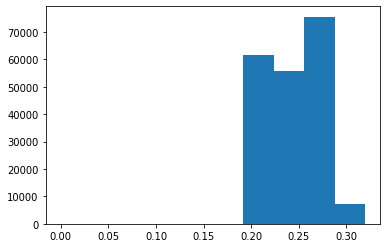

In [48]:
np_sentineg = np.array(sentineg)
np_sentineg
plt.hist(np_sentineg)
plt.plot()

In [54]:
df_interactions = df_RAW_interactions[:200000]

In [59]:
df_interactions['prob_senti_pos'] = np_sentipos
df_interactions['prob_senti_neu'] = np_sentineu
df_interactions['prob_senti_neg'] = np_sentineg

/tmp/ipykernel_43111/1738194641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interactions['prob_senti_pos'] = np_sentipos
/tmp/ipykernel_43111/1738194641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interactions['prob_senti_neu'] = np_sentineu
/tmp/ipykernel_43111/1738194641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [60]:
df_interactions

user_id  recipe_id        date  rating  \
0         38094      40893  2003-02-17       4   
1       1293707      40893  2011-12-21       5   
2          8937      44394  2002-12-01       4   
3        126440      85009  2010-02-27       5   
4         57222      85009  2011-10-01       5   
...         ...        ...         ...     ...   
199995   486888      33671  2009-01-17       5   
199996  1133067      33671  2009-01-17       0   
199997   227456      33671  2009-01-18       5   
199998   335606      33671  2009-01-19       4   
199999  1026827      33671  2009-01-20       5   

                                                   review  prob_senti_pos  \
0       Great with a salad. Cooked on top of stove for...        0.244645   
1       So simple, so delicious! Great for chilly fall...        0.212580   
2       This worked very well and is EASY.  I used not...        0.217615   
3       I made the Mexican topping and took it to bunk...        0.217029   
4       Made the cheddar bacon topping, adding a sprin...        0.245181   
...                                                   ...             ...   
199995  DH said he could just drink the gravy or eat i...        0.290039   
199996  Wow!  at 53 grams of fat per person, no WONDER...        0.214188   
199997  FANTASTIC!  What else needs to be said.  I bou...        0.222121   
199998  Very easy and fall off the bone tender.  My on...        0.273133   
199999  Best. Chicken. Ever. The only change I made to...        0.247878   

        prob_senti_neu  prob_senti_neg  
0             0.510024        0.245331  
1             0.541937        0.245482  
2             0.504000        0.278385  
3             0.562159        0.220812  
4             0.516963        0.237855  
...                ...             ...  
199995        0.504268        0.205692  
199996        0.543682        0.242130  
199997        0.489666        0.288212  
199998        0.514271        0.212596  
199999        0.504908        0.247214  

[200000 rows x 8 columns]

In [61]:
df_interactions.to_csv('df_interactions_with_senti.csv', encoding='utf-8')

## TF-IDF

In [328]:
#taking only few columns for analysis
cols = ["steps","description","ingredients","tags"]

In [329]:
unique_ui = list(set(list(train_df["user_id"])))
dic = {}

In [330]:
#creating a dictionary for user-items i.e. user with all the recipes they have rated so a 1 to many relation
for ui in tqdm(unique_ui):
    dic[ui]={"steps" : [],
    "description" : [],
    "ingredients" : []
    ,"tags" : []
    ,"rating":[]        }
    temp = train_df[train_df["user_id"]== ui]

    for bi in list(temp["recipe_id"]):
        btemp = df_RAW_recipes[df_RAW_recipes["id"] == bi]
        for c in cols:
            dic[ui][c].append(btemp[c])
        dic[ui]["rating"].append(temp[temp["recipe_id"] == bi]["rating"].values[0])

100%|████████████████████████████████████████████████████████████████████████████| 25076/25076 [26:06<00:00, 16.01it/s]


In [57]:
# removing stop words and punctuations

import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def preprocess(text):
    return nltk.word_tokenize(text.lower().translate(remove_punctuation_map))
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [72]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=preprocess, stop_words=stopwords)

In [96]:
# computing similarity between 2 recipes
def compute_similarity(a, b):
    print(a,b)
    try:
        tfidf = vectorizer.fit_transform([a, b])
        return ((tfidf * tfidf.T).toarray())[0,1]
    except Exception as e:
        print(e)
        return 0

In [112]:
# finding similarities for all columns 
def predict_sim_measure(userid,recipeid):
    user_dict = dic[userid]
    recipe_info = df_RAW_recipes[df_RAW_recipes["id"]==recipeid]
    ratings = {}
    for c in cols:
        ratings[c] = []
        print("--------------")
        print(user_dict[c])
        print("--------------")
        print(recipe_info[c])
        print("---------------")
        for i in range(len(user_dict[c])):
            if(len(user_dict[c][i]) !=0):
                ratings[c].append(compute_similarity(list(user_dict[c][i])[0],list(recipe_info[c])[0]))
    
    return ratings,user_dict["rating"]

In [113]:
predict_sim_measure(1290903,27208)

--------------
[35864    ['preheat oven to 375f', 'place chicken in a 9...
Name: steps, dtype: object, 195218    ['grease a 9-inch pie plate', 'in a large bowl...
Name: steps, dtype: object, 115240    ['saute mushrooms in butter and oil for 3-5 mi...
Name: steps, dtype: object, 81402    ['set oven to 425 degrees', 'cut the crusty br...
Name: steps, dtype: object, 224258    ['place bacon in large deep skillet', 'cook ov...
Name: steps, dtype: object, 14779    ['cook the pasta in salted boiling water until...
Name: steps, dtype: object, 93703    ['have all meats precooked and cold and the ri...
Name: steps, dtype: object, 210545    ['whisk together all the ingredients in a smal...
Name: steps, dtype: object, 77266    ['melt chocolate chips and stir until smooth',...
Name: steps, dtype: object, 52346    ['cook shells in plenty of boiling water accor...
Name: steps, dtype: object, 66980    ['in a large bowl , mix the flour , baking sod...
Name: steps, dtype: object, 118030    ['cream the b

this is a rich, wonderful mushroom sauce my husband found.  he made a steak dinner for me (and the kids) so i could enjoy watching the oscars.  this was my favorite part of the dinner!  it's fantastic! amazing flavor, and so simple! no salt needed here. in fact, you may wish to use half the ranch dressing mix to cut back on the saltiness. found this crock-pot pot roast recipe on of a website called www.recipegoldmine.com. it's all the rage there, so i thought i'd try it.
make certain to purchase a very crusty bread loaf to make slicing easier. you can use french or italian crusty bread but rustic or ciabatta is better! when you taste this cheese bread, i know that you will be making it all the time, so make a double recipe of the cheese mixture excluding the green onion and store one batch in the freezer for up to 2 months (trust me the mixture will be used up long before the 2 months!) when ready to use defrost in the fridge overnight and just add in the finely chopped green onions, t

['flour', 'baking soda', 'baking powder', 'salt', 'bananas', 'sugar', 'egg', 'butter', 'brown sugar', 'cinnamon', 'nuts'] ['beef roast', 'brown gravy mix', 'dried italian salad dressing mix', 'ranch dressing mix', 'water']
['butter', "confectioners' sugar", 'half-and-half cream', 'vanilla', 'unsweetened cocoa powder'] ['beef roast', 'brown gravy mix', 'dried italian salad dressing mix', 'ranch dressing mix', 'water']
['garlic cloves', 'plain low-fat yogurt', 'lemon juice', 'olive oil', 'salt', 'paprika', 'pepper', 'chickpeas', 'fresh parsley'] ['beef roast', 'brown gravy mix', 'dried italian salad dressing mix', 'ranch dressing mix', 'water']
['salmon', 'onions', 'celery', 'shoestring carrots', 'fat-free chicken broth', 'fat free cream cheese', 'brown rice', 'dill weed', 'salt', 'water'] ['beef roast', 'brown gravy mix', 'dried italian salad dressing mix', 'ranch dressing mix', 'water']
['red salmon', 'rotini pasta', 'carrots', 'celery', 'ripe olives', 'green onions', 'red bell pepper'

({'steps': [0.06608613983921338,
   0.08105611171850885,
   0.12874821080209234,
   0.07706962806387292,
   0.04465777321483354,
   0.13796216293307065,
   0.023810444152865304,
   0.018831735055216584,
   0.011781722416018447,
   0.0541786854278128,
   0.0527211375707982,
   0.015670065244453864,
   0.02779461485614993,
   0.17530311406362378,
   0.13338619891962564,
   0.15368795656184783,
   0.013571217611724414,
   0.060570324601634924,
   0.05486335574168806,
   0.1346334543547323,
   0.05853620352304596,
   0.06281379086974032],
  'description': [0,
   0.08250336015084977,
   0.021855331191555697,
   0.031056363471854417,
   0.0,
   0.0,
   0.06206169047683343,
   0.025343508024060553,
   0.0,
   0.038552920999268825,
   0.0,
   0.01784575529265022,
   0.020814305944905093,
   0.0,
   0.015761314348553605,
   0.02626497082959224,
   0.0,
   0.0,
   0.0393860777121511,
   0.0,
   0.035833421646951115,
   0.04113547275809673],
  'ingredients': [0.0,
   0.018583552329161403,
   0.08

In [81]:
# predicting ratings of the recipe based on all columns and then taking the average of all the columns ratings.
def predict_user_item_rating(userid,recipeid):
    sim_measure, ratings = predict_sim_measure(userid,recipeid)
    avg_rating = []
    for c in cols:
        avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
    return avg_rating

In [82]:
predict_user_item_rating(1290903,27208)

np.nan is an invalid document, expected byte or unicode string.


[4.791967175513901, 4.663688199543686, 4.9518680294405595, 4.733102077293977]

In [83]:
test_pred_ratings = []

In [84]:
user_list = list(test_df["user_id"])
recipe_list = list(test_df["recipe_id"])

In [85]:
# predicting all the ratings for train dataset
for u in tqdm(range(len(user_list))):
    test_pred_ratings.append(predict_user_item_rating(user_list[u],recipe_list[u]))

  0%|                                                                                        | 0/12455 [00:00<?, ?it/s]

np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                              | 1/12455 [00:00<1:36:33,  2.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                              | 2/12455 [00:02<5:46:56,  1.67s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\1132186685.py:5: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                              | 5/12455 [00:06<4:36:27,  1.33s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                             | 6/12455 [00:31<25:42:42,  7.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                             | 7/12455 [00:34<20:57:35,  6.06s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                             | 8/12455 [00:39<20:06:54,  5.82s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  0%|                                                                             | 9/12455 [01:09<43:55:04, 12.70s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                            | 10/12455 [01:17<39:35:27, 11.45s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                            | 11/12455 [01:21<31:17:30,  9.05s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                            | 12/12455 [01:32<33:43:01,  9.76s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                            | 13/12455 [01:33<24:12:05,  7.00s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                            | 14/12455 [01:35<19:59:00,  5.78s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                            | 15/12455 [01:41<19:42:32,  5.70s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  0%|                                                                            | 16/12455 [02:24<58:40:42, 16.98s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                            | 17/12455 [02:53<71:10:28, 20.60s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                            | 18/12455 [03:15<72:35:08, 21.01s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                            | 19/12455 [03:17<52:23:01, 15.16s/it]

np.nan is an invalid document, expected byte or unicode string.


  0%|                                                                            | 20/12455 [03:20<39:50:11, 11.53s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▏                                                                           | 21/12455 [03:31<39:37:18, 11.47s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▏                                                                           | 22/12455 [03:34<30:04:24,  8.71s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▏                                                                           | 24/12455 [03:46<23:42:47,  6.87s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▏                                                                           | 26/12455 [04:06<26:12:33,  7.59s/it]

np.nan is an invalid document, expected byte or unicode string.


  0%|▏                                                                           | 27/12455 [04:06<18:31:56,  5.37s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▏                                                                           | 30/12455 [04:24<17:01:33,  4.93s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  0%|▏                                                                           | 32/12455 [04:40<22:15:45,  6.45s/it]

np.nan is an invalid document, expected byte or unicode string.


  0%|▏                                                                           | 34/12455 [04:43<14:11:27,  4.11s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  0%|▏                                                                           | 36/12455 [04:59<18:36:12,  5.39s/it]

np.nan is an invalid document, expected byte or unicode string.


  0%|▏                                                                           | 37/12455 [04:59<13:28:26,  3.91s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▏                                                                           | 38/12455 [05:01<11:10:57,  3.24s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  0%|▏                                                                           | 39/12455 [05:09<16:12:59,  4.70s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▏                                                                           | 40/12455 [05:18<20:01:21,  5.81s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 41/12455 [05:20<16:18:29,  4.73s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 42/12455 [05:34<26:18:24,  7.63s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 43/12455 [05:49<33:34:54,  9.74s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 46/12455 [05:50<15:03:55,  4.37s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 48/12455 [06:35<36:58:34, 10.73s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 49/12455 [06:42<34:33:52, 10.03s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  0%|▎                                                                           | 50/12455 [06:44<28:40:21,  8.32s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 51/12455 [06:47<23:34:05,  6.84s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 52/12455 [06:48<19:14:49,  5.59s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 54/12455 [06:49<11:45:07,  3.41s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 55/12455 [06:55<13:30:27,  3.92s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                           | 56/12455 [07:02<16:04:26,  4.67s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                            | 58/12455 [07:03<9:10:53,  2.67s/it]

np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                            | 59/12455 [07:03<6:42:53,  1.95s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▎                                                                            | 60/12455 [07:06<7:39:25,  2.22s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  0%|▍                                                                            | 61/12455 [07:08<8:04:22,  2.34s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  0%|▍                                                                           | 62/12455 [07:13<10:50:16,  3.15s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 65/12455 [07:14<4:18:04,  1.25s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 66/12455 [07:15<3:24:00,  1.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 67/12455 [07:15<3:16:16,  1.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 68/12455 [07:21<7:39:17,  2.22s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 70/12455 [07:27<8:56:46,  2.60s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 71/12455 [07:27<7:20:30,  2.13s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 72/12455 [07:29<6:55:06,  2.01s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 73/12455 [07:30<5:52:23,  1.71s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 74/12455 [07:33<6:44:32,  1.96s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 75/12455 [07:36<8:17:01,  2.41s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                            | 78/12455 [07:42<6:38:49,  1.93s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▍                                                                           | 80/12455 [07:53<10:21:47,  3.01s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                            | 81/12455 [07:54<8:43:13,  2.54s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                            | 82/12455 [07:56<8:29:10,  2.47s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                            | 83/12455 [07:57<6:28:17,  1.88s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                            | 85/12455 [08:01<6:27:01,  1.88s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                            | 86/12455 [08:01<5:12:10,  1.51s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                           | 87/12455 [08:10<11:22:06,  3.31s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                            | 90/12455 [08:15<7:25:07,  2.16s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                           | 92/12455 [08:27<12:54:10,  3.76s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                           | 93/12455 [08:44<22:09:20,  6.45s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                           | 94/12455 [08:47<19:25:56,  5.66s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                           | 96/12455 [08:48<11:43:42,  3.42s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  1%|▌                                                                           | 97/12455 [09:17<35:43:41, 10.41s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                           | 98/12455 [09:25<32:56:40,  9.60s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                           | 99/12455 [09:33<32:05:13,  9.35s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                          | 100/12455 [09:36<25:33:28,  7.45s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                          | 101/12455 [10:00<42:21:46, 12.34s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▌                                                                          | 102/12455 [10:07<36:15:36, 10.57s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                          | 105/12455 [10:12<16:34:07,  4.83s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                          | 106/12455 [10:15<15:11:54,  4.43s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                          | 107/12455 [10:30<24:28:16,  7.13s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                          | 108/12455 [10:31<18:59:18,  5.54s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                          | 109/12455 [10:31<13:59:48,  4.08s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                          | 110/12455 [10:37<15:25:15,  4.50s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                          | 111/12455 [10:42<16:14:25,  4.74s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                          | 113/12455 [10:45<10:15:14,  2.99s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                          | 114/12455 [10:49<10:58:26,  3.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                           | 117/12455 [10:50<4:55:39,  1.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                           | 118/12455 [10:53<6:06:30,  1.78s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                          | 121/12455 [11:09<11:26:24,  3.34s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▋                                                                           | 122/12455 [11:10<9:16:13,  2.71s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  1%|▊                                                                          | 126/12455 [11:44<16:34:09,  4.84s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▊                                                                          | 127/12455 [11:47<15:10:42,  4.43s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▊                                                                          | 129/12455 [11:50<11:16:40,  3.29s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  1%|▊                                                                          | 130/12455 [12:32<41:57:42, 12.26s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▊                                                                          | 131/12455 [12:33<32:19:22,  9.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▊                                                                          | 133/12455 [12:37<20:06:06,  5.87s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▊                                                                           | 137/12455 [12:44<9:21:45,  2.74s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▊                                                                           | 138/12455 [12:46<9:16:02,  2.71s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▊                                                                          | 139/12455 [12:52<12:00:42,  3.51s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▊                                                                           | 141/12455 [12:54<8:02:40,  2.35s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▉                                                                           | 146/12455 [12:57<3:20:14,  1.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▉                                                                           | 147/12455 [12:59<3:37:55,  1.06s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▉                                                                           | 148/12455 [13:01<5:01:58,  1.47s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▉                                                                           | 149/12455 [13:06<7:52:46,  2.31s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|▉                                                                           | 150/12455 [13:08<7:44:56,  2.27s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  1%|▉                                                                          | 151/12455 [13:29<24:39:05,  7.21s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▉                                                                          | 152/12455 [13:36<25:08:49,  7.36s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▉                                                                          | 155/12455 [13:39<12:01:28,  3.52s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|▉                                                                           | 162/12455 [13:43<3:05:48,  1.10it/s]

np.nan is an invalid document, expected byte or unicode string.


  1%|█                                                                           | 167/12455 [13:47<2:24:36,  1.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|█                                                                           | 168/12455 [13:52<6:33:32,  1.92s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|█                                                                           | 172/12455 [13:56<3:56:59,  1.16s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|█                                                                           | 177/12455 [14:05<3:42:33,  1.09s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|█                                                                           | 179/12455 [14:07<3:51:51,  1.13s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|█                                                                           | 180/12455 [14:11<5:58:07,  1.75s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|█                                                                           | 181/12455 [14:15<7:49:55,  2.30s/it]

np.nan is an invalid document, expected byte or unicode string.


  1%|█                                                                           | 184/12455 [14:16<4:05:34,  1.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|█▏                                                                          | 185/12455 [14:20<6:26:10,  1.89s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  1%|█                                                                          | 186/12455 [14:26<10:14:04,  3.00s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                         | 188/12455 [14:33<11:00:51,  3.23s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                          | 190/12455 [14:35<7:47:19,  2.29s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                          | 192/12455 [14:41<8:18:51,  2.44s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                          | 194/12455 [14:42<5:00:19,  1.47s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                          | 195/12455 [14:44<6:09:23,  1.81s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                         | 196/12455 [14:55<14:39:22,  4.30s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                         | 197/12455 [14:57<12:32:32,  3.68s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                         | 198/12455 [14:58<10:03:51,  2.96s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                          | 201/12455 [15:01<4:53:23,  1.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                          | 202/12455 [15:05<8:01:56,  2.36s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▏                                                                          | 203/12455 [15:07<7:54:15,  2.32s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                          | 205/12455 [15:10<5:47:56,  1.70s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                          | 206/12455 [15:14<8:23:24,  2.47s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                          | 207/12455 [15:16<7:28:20,  2.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                          | 212/12455 [15:18<2:52:41,  1.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                          | 213/12455 [15:20<3:41:20,  1.08s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                          | 214/12455 [15:27<8:37:15,  2.54s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                          | 215/12455 [15:29<8:07:37,  2.39s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                         | 217/12455 [15:41<13:31:12,  3.98s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                          | 221/12455 [15:43<6:02:40,  1.78s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                          | 222/12455 [15:44<5:14:58,  1.54s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                         | 223/12455 [16:07<23:40:37,  6.97s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                         | 224/12455 [16:10<19:53:46,  5.86s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▎                                                                         | 226/12455 [16:17<15:45:16,  4.64s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▍                                                                          | 228/12455 [16:19<9:16:01,  2.73s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▍                                                                         | 229/12455 [16:28<15:28:20,  4.56s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▍                                                                         | 230/12455 [16:30<13:10:13,  3.88s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  2%|█▍                                                                         | 231/12455 [16:44<22:50:27,  6.73s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▍                                                                         | 233/12455 [16:46<13:45:50,  4.05s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▍                                                                         | 234/12455 [16:47<11:12:54,  3.30s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▍                                                                          | 235/12455 [16:48<9:54:14,  2.92s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  2%|█▍                                                                         | 237/12455 [17:00<12:40:41,  3.74s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▍                                                                         | 238/12455 [17:05<14:12:32,  4.19s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  2%|█▍                                                                          | 243/12455 [17:13<5:31:36,  1.63s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                          | 248/12455 [17:15<2:26:03,  1.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                          | 250/12455 [17:16<2:11:28,  1.55it/s]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                          | 251/12455 [17:17<2:06:49,  1.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                          | 252/12455 [17:18<2:13:26,  1.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                          | 253/12455 [17:22<5:14:45,  1.55s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                          | 254/12455 [17:22<4:36:02,  1.36s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                          | 256/12455 [17:26<5:29:23,  1.62s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                         | 258/12455 [17:48<19:00:21,  5.61s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                         | 261/12455 [18:00<13:00:43,  3.84s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                          | 263/12455 [18:02<8:31:23,  2.52s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                          | 264/12455 [18:03<6:56:16,  2.05s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                          | 266/12455 [18:11<9:03:03,  2.67s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                         | 267/12455 [18:31<25:04:08,  7.40s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                         | 268/12455 [18:31<18:20:02,  5.42s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▌                                                                         | 269/12455 [18:38<20:15:23,  5.98s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▋                                                                         | 270/12455 [18:39<15:01:34,  4.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▋                                                                          | 275/12455 [18:42<3:45:58,  1.11s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▋                                                                          | 283/12455 [18:48<1:35:55,  2.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▋                                                                          | 285/12455 [18:48<1:23:16,  2.44it/s]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▋                                                                          | 286/12455 [18:51<3:06:57,  1.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▊                                                                          | 290/12455 [18:54<2:07:14,  1.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▊                                                                          | 291/12455 [18:54<1:53:48,  1.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▊                                                                          | 294/12455 [18:55<1:45:33,  1.92it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▊                                                                          | 295/12455 [18:56<1:55:52,  1.75it/s]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▊                                                                          | 296/12455 [18:59<4:00:46,  1.19s/it]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▊                                                                          | 299/12455 [19:02<3:14:04,  1.04it/s]

np.nan is an invalid document, expected byte or unicode string.


  2%|█▊                                                                          | 300/12455 [19:03<2:48:47,  1.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▊                                                                          | 301/12455 [19:05<3:45:26,  1.11s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▊                                                                          | 303/12455 [19:06<2:31:59,  1.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  2%|█▊                                                                          | 306/12455 [19:06<1:20:49,  2.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|█▉                                                                            | 312/12455 [19:08<58:20,  3.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|█▉                                                                          | 314/12455 [19:13<3:19:37,  1.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  3%|█▉                                                                         | 315/12455 [19:36<23:03:05,  6.84s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|█▉                                                                         | 316/12455 [19:39<19:38:12,  5.82s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|█▉                                                                         | 317/12455 [19:40<14:53:10,  4.42s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|█▉                                                                         | 319/12455 [19:44<10:38:59,  3.16s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|█▉                                                                          | 321/12455 [19:45<5:51:41,  1.74s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|█▉                                                                          | 324/12455 [19:47<3:19:43,  1.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|█▉                                                                          | 326/12455 [19:53<5:58:38,  1.77s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|█▉                                                                         | 327/12455 [20:00<10:22:09,  3.08s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 329/12455 [20:01<6:32:02,  1.94s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  3%|██                                                                          | 330/12455 [20:01<4:53:22,  1.45s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 332/12455 [20:05<5:26:02,  1.61s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 333/12455 [20:09<7:15:45,  2.16s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 334/12455 [20:10<6:21:06,  1.89s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 336/12455 [20:14<6:07:45,  1.82s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 337/12455 [20:16<5:55:39,  1.76s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 338/12455 [20:20<8:12:13,  2.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 340/12455 [20:27<9:29:48,  2.82s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 342/12455 [20:31<8:28:25,  2.52s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 343/12455 [20:34<8:32:18,  2.54s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 344/12455 [20:35<7:17:33,  2.17s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 346/12455 [20:38<5:44:31,  1.71s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 347/12455 [20:38<4:30:45,  1.34s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██                                                                          | 348/12455 [20:41<5:54:09,  1.76s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▏                                                                         | 350/12455 [20:45<5:29:32,  1.63s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  3%|██▏                                                                         | 352/12455 [20:51<7:05:50,  2.11s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▏                                                                         | 356/12455 [20:54<3:21:25,  1.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▏                                                                         | 359/12455 [20:57<3:00:06,  1.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▏                                                                         | 363/12455 [21:00<2:18:54,  1.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▏                                                                         | 364/12455 [21:04<5:09:54,  1.54s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▏                                                                         | 366/12455 [21:10<6:49:08,  2.03s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                         | 370/12455 [21:12<3:04:39,  1.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                         | 373/12455 [21:27<8:01:01,  2.39s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                         | 375/12455 [21:27<4:46:07,  1.42s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                         | 376/12455 [21:28<4:50:21,  1.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                        | 378/12455 [21:42<12:06:42,  3.61s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                        | 379/12455 [21:43<10:00:51,  2.99s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                         | 380/12455 [21:45<9:10:00,  2.73s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                        | 381/12455 [21:52<13:03:29,  3.89s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                        | 382/12455 [21:53<10:33:20,  3.15s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                         | 384/12455 [21:55<6:49:16,  2.03s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                         | 385/12455 [21:58<7:48:50,  2.33s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▎                                                                         | 387/12455 [21:59<4:35:30,  1.37s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  3%|██▎                                                                         | 389/12455 [22:02<4:24:12,  1.31s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▍                                                                         | 391/12455 [22:04<3:30:04,  1.04s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██▍                                                                         | 392/12455 [22:05<3:29:23,  1.04s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▍                                                                         | 397/12455 [22:07<1:49:08,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▍                                                                         | 399/12455 [22:13<5:31:38,  1.65s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▍                                                                         | 403/12455 [22:15<2:39:45,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▍                                                                         | 408/12455 [22:20<2:07:14,  1.58it/s]

np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                         | 410/12455 [22:26<6:14:22,  1.86s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                         | 411/12455 [22:27<5:06:37,  1.53s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                         | 413/12455 [22:27<3:14:44,  1.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                         | 417/12455 [22:31<2:47:55,  1.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  3%|██▌                                                                         | 418/12455 [22:34<4:33:59,  1.37s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                         | 419/12455 [22:35<4:20:06,  1.30s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                        | 420/12455 [22:44<10:18:43,  3.08s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                        | 421/12455 [22:52<14:28:02,  4.33s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                        | 423/12455 [22:56<11:02:04,  3.30s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                        | 424/12455 [23:00<11:36:01,  3.47s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                        | 426/12455 [23:07<12:07:29,  3.63s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                        | 427/12455 [23:09<10:39:37,  3.19s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                        | 428/12455 [23:20<18:06:12,  5.42s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██▌                                                                        | 429/12455 [23:21<13:52:21,  4.15s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██▋                                                                         | 431/12455 [23:25<9:24:38,  2.82s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▋                                                                         | 433/12455 [23:28<6:46:21,  2.03s/it]

np.nan is an invalid document, expected byte or unicode string.


  3%|██▋                                                                         | 434/12455 [23:28<5:19:44,  1.60s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  3%|██▋                                                                         | 435/12455 [23:32<7:39:45,  2.29s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▋                                                                         | 437/12455 [23:35<5:39:12,  1.69s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▋                                                                         | 440/12455 [23:36<3:09:31,  1.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▋                                                                         | 442/12455 [23:42<5:31:12,  1.65s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▋                                                                         | 446/12455 [23:56<7:02:22,  2.11s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▋                                                                         | 449/12455 [24:00<4:43:53,  1.42s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 452/12455 [24:04<4:34:32,  1.37s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 454/12455 [24:06<3:40:47,  1.10s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 457/12455 [24:08<2:19:17,  1.44it/s]

np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 459/12455 [24:09<2:06:05,  1.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 460/12455 [24:11<3:38:34,  1.09s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 461/12455 [24:14<4:52:55,  1.47s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 464/12455 [24:15<2:22:44,  1.40it/s]

np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 465/12455 [24:17<4:12:16,  1.26s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 466/12455 [24:19<4:26:54,  1.34s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 467/12455 [24:22<6:24:15,  1.92s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 469/12455 [24:23<4:00:55,  1.21s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▊                                                                         | 470/12455 [24:27<6:23:07,  1.92s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                         | 472/12455 [24:31<6:24:16,  1.92s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                         | 474/12455 [24:33<5:09:33,  1.55s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                         | 476/12455 [24:35<4:02:46,  1.22s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  4%|██▉                                                                         | 478/12455 [24:35<2:27:25,  1.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                         | 479/12455 [24:37<3:28:22,  1.04s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                         | 480/12455 [24:41<5:24:48,  1.63s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                         | 481/12455 [24:42<4:48:02,  1.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                         | 483/12455 [24:49<7:04:50,  2.13s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                         | 484/12455 [24:52<8:25:31,  2.53s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                        | 485/12455 [25:00<13:08:52,  3.95s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                        | 486/12455 [25:01<11:08:27,  3.35s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|██▉                                                                        | 487/12455 [25:09<14:51:27,  4.47s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███                                                                         | 493/12455 [25:13<3:37:28,  1.09s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███                                                                         | 496/12455 [25:17<3:15:34,  1.02it/s]

np.nan is an invalid document, expected byte or unicode string.


  4%|███                                                                         | 499/12455 [25:17<1:33:28,  2.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███                                                                         | 500/12455 [25:18<1:37:37,  2.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███                                                                         | 501/12455 [25:19<2:23:18,  1.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███                                                                         | 505/12455 [25:21<1:35:36,  2.08it/s]

np.nan is an invalid document, expected byte or unicode string.


  4%|███                                                                         | 507/12455 [25:25<4:16:54,  1.29s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███                                                                         | 508/12455 [25:30<7:41:47,  2.32s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  4%|███                                                                        | 510/12455 [25:40<11:04:09,  3.34s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███                                                                         | 511/12455 [25:42<9:39:10,  2.91s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|███▏                                                                        | 515/12455 [25:44<3:50:19,  1.16s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███                                                                        | 516/12455 [25:52<10:04:50,  3.04s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|███▏                                                                        | 519/12455 [25:54<5:29:17,  1.66s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|███▏                                                                        | 521/12455 [25:56<4:30:56,  1.36s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▏                                                                        | 523/12455 [25:59<4:00:58,  1.21s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▏                                                                        | 526/12455 [25:59<1:58:02,  1.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▏                                                                        | 527/12455 [26:05<5:52:04,  1.77s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▏                                                                        | 528/12455 [26:10<8:45:12,  2.64s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▏                                                                        | 530/12455 [26:13<6:51:55,  2.07s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▏                                                                        | 531/12455 [26:14<5:36:12,  1.69s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 534/12455 [26:21<7:50:13,  2.37s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 536/12455 [26:22<4:28:32,  1.35s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 539/12455 [26:24<2:47:59,  1.18it/s]

np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 540/12455 [26:24<2:15:38,  1.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 543/12455 [26:29<3:53:41,  1.18s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 544/12455 [26:31<4:18:21,  1.30s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 546/12455 [26:33<4:10:11,  1.26s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 547/12455 [26:34<3:50:13,  1.16s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 549/12455 [26:39<5:19:31,  1.61s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 550/12455 [26:40<4:58:43,  1.51s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|███▎                                                                        | 553/12455 [26:41<2:26:22,  1.36it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▍                                                                        | 555/12455 [26:44<3:19:46,  1.01s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▍                                                                        | 556/12455 [26:48<5:23:59,  1.63s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  4%|███▍                                                                        | 559/12455 [26:51<4:05:06,  1.24s/it]

np.nan is an invalid document, expected byte or unicode string.


  4%|███▍                                                                        | 560/12455 [26:51<3:20:28,  1.01s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▍                                                                        | 561/12455 [26:53<3:49:53,  1.16s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▍                                                                        | 563/12455 [26:55<3:50:15,  1.16s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  5%|███▍                                                                        | 564/12455 [26:56<3:36:45,  1.09s/it]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▍                                                                        | 566/12455 [26:58<3:09:00,  1.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▍                                                                        | 567/12455 [27:04<8:03:58,  2.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▍                                                                        | 568/12455 [27:07<8:27:31,  2.56s/it]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▍                                                                        | 573/12455 [27:09<2:31:17,  1.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                        | 575/12455 [27:10<1:59:33,  1.66it/s]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                        | 579/12455 [27:12<1:37:15,  2.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                        | 580/12455 [27:16<4:50:17,  1.47s/it]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                        | 582/12455 [27:18<3:52:47,  1.18s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                        | 583/12455 [27:19<3:54:25,  1.18s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                        | 584/12455 [27:21<4:30:24,  1.37s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                        | 585/12455 [27:21<3:57:11,  1.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                        | 588/12455 [27:24<2:45:07,  1.20it/s]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                        | 589/12455 [27:24<2:23:48,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                        | 590/12455 [27:24<2:01:50,  1.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  5%|███▌                                                                       | 596/12455 [27:44<12:32:03,  3.80s/it]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                       | 597/12455 [27:47<12:13:53,  3.71s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                       | 598/12455 [27:50<11:23:37,  3.46s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▋                                                                        | 599/12455 [27:51<8:58:35,  2.73s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▋                                                                        | 600/12455 [27:53<8:07:28,  2.47s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▌                                                                       | 601/12455 [28:01<13:12:44,  4.01s/it]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▋                                                                       | 602/12455 [28:03<11:22:46,  3.46s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▋                                                                        | 604/12455 [28:04<6:30:25,  1.98s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▋                                                                        | 608/12455 [28:09<3:55:03,  1.19s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▋                                                                        | 609/12455 [28:10<4:05:46,  1.24s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 615/12455 [28:13<1:20:18,  2.46it/s]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 616/12455 [28:13<1:06:06,  2.98it/s]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 619/12455 [28:14<1:05:30,  3.01it/s]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▉                                                                          | 620/12455 [28:14<56:43,  3.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

  5%|███▊                                                                        | 621/12455 [28:15<1:55:50,  1.70it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 623/12455 [28:17<2:07:27,  1.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 624/12455 [28:17<1:53:53,  1.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 625/12455 [28:19<3:18:52,  1.01s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 627/12455 [28:21<3:12:13,  1.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 630/12455 [28:22<1:43:22,  1.91it/s]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 632/12455 [28:28<4:27:10,  1.36s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

  5%|███▊                                                                        | 633/12455 [28:29<4:40:12,  1.42s/it]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 634/12455 [28:33<7:14:42,  2.21s/it]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▊                                                                        | 635/12455 [28:35<7:04:55,  2.16s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▉                                                                        | 637/12455 [28:36<4:11:26,  1.28s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▉                                                                        | 639/12455 [28:48<9:39:43,  2.94s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▉                                                                        | 642/12455 [28:49<4:27:43,  1.36s/it]

np.nan is an invalid document, expected byte or unicode string.


  5%|███▉                                                                        | 645/12455 [28:57<6:48:19,  2.07s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▉                                                                        | 647/12455 [28:58<4:37:23,  1.41s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  5%|███▉                                                                        | 649/12455 [29:09<9:27:10,  2.88s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▉                                                                        | 650/12455 [29:09<7:14:23,  2.21s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▉                                                                        | 651/12455 [29:10<5:43:36,  1.75s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▉                                                                        | 653/12455 [29:11<3:50:23,  1.17s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████                                                                        | 657/12455 [29:14<2:31:53,  1.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████                                                                        | 659/12455 [29:20<5:17:59,  1.62s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|███▉                                                                       | 660/12455 [29:30<12:13:07,  3.73s/it]

np.nan is an invalid document, expected byte or unicode string.


  5%|████                                                                        | 661/12455 [29:31<9:36:45,  2.93s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████                                                                        | 666/12455 [29:33<2:36:44,  1.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████                                                                       | 667/12455 [29:42<10:38:44,  3.25s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████                                                                        | 670/12455 [29:45<6:14:29,  1.91s/it]

np.nan is an invalid document, expected byte or unicode string.


  5%|████                                                                        | 671/12455 [29:46<5:35:57,  1.71s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████                                                                        | 672/12455 [29:49<6:49:41,  2.09s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

  5%|████                                                                        | 673/12455 [29:51<6:17:58,  1.92s/it]

  5%|████                                                                        | 674/12455 [29:51<4:42:36,  1.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████                                                                        | 675/12455 [29:51<3:44:37,  1.14s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████                                                                        | 676/12455 [29:54<5:19:56,  1.63s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████▏                                                                       | 677/12455 [29:55<4:08:55,  1.27s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████▏                                                                       | 678/12455 [29:56<4:30:57,  1.38s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████▏                                                                       | 681/12455 [29:58<2:49:21,  1.16it/s]

np.nan is an invalid document, expected byte or unicode string.


  5%|████▏                                                                       | 684/12455 [30:00<2:07:45,  1.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  5%|████▏                                                                       | 685/12455 [30:03<4:08:17,  1.27s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▏                                                                       | 686/12455 [30:06<5:02:50,  1.54s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▏                                                                       | 692/12455 [30:08<1:13:59,  2.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▏                                                                       | 694/12455 [30:11<3:10:36,  1.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▏                                                                       | 695/12455 [30:13<3:51:32,  1.18s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▏                                                                       | 696/12455 [30:15<4:17:29,  1.31s/it]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▎                                                                       | 701/12455 [30:18<1:58:33,  1.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▎                                                                       | 704/12455 [30:23<3:16:09,  1.00s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▎                                                                       | 705/12455 [30:23<3:05:43,  1.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▎                                                                       | 706/12455 [30:27<5:20:52,  1.64s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▎                                                                       | 709/12455 [30:36<6:30:29,  1.99s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▎                                                                       | 710/12455 [30:37<5:33:05,  1.70s/it]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▎                                                                       | 711/12455 [30:39<5:43:38,  1.76s/it]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▎                                                                       | 713/12455 [30:39<3:22:56,  1.04s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▎                                                                       | 714/12455 [30:44<6:51:52,  2.10s/it]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▎                                                                       | 716/12455 [30:49<6:45:13,  2.07s/it]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▍                                                                       | 718/12455 [30:50<3:54:05,  1.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▍                                                                       | 719/12455 [30:53<6:31:57,  2.00s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▍                                                                       | 720/12455 [30:55<6:37:19,  2.03s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▍                                                                       | 722/12455 [30:58<5:16:28,  1.62s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▍                                                                       | 724/12455 [30:59<3:31:57,  1.08s/it]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▍                                                                       | 725/12455 [31:03<5:59:35,  1.84s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▍                                                                       | 730/12455 [31:06<2:11:10,  1.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▍                                                                       | 732/12455 [31:07<1:59:05,  1.64it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▍                                                                       | 733/12455 [31:08<2:17:27,  1.42it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▌                                                                       | 740/12455 [31:10<1:01:26,  3.18it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                         | 743/12455 [31:11<57:24,  3.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  6%|████▋                                                                         | 744/12455 [31:11<47:37,  4.10it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                         | 747/12455 [31:13<59:31,  3.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▌                                                                       | 748/12455 [31:14<1:55:13,  1.69it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▌                                                                       | 750/12455 [31:15<1:31:30,  2.13it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▌                                                                       | 751/12455 [31:16<2:29:49,  1.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▌                                                                       | 755/12455 [31:21<2:24:57,  1.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                       | 758/12455 [31:23<2:04:46,  1.56it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                       | 759/12455 [31:23<1:35:22,  2.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                       | 760/12455 [31:26<3:57:47,  1.22s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                       | 761/12455 [31:32<8:50:05,  2.72s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▌                                                                      | 762/12455 [31:39<12:50:06,  3.95s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▌                                                                      | 763/12455 [31:44<13:23:46,  4.12s/it]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▌                                                                      | 764/12455 [31:45<10:39:45,  3.28s/it]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                       | 765/12455 [31:47<9:25:20,  2.90s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▌                                                                      | 766/12455 [31:54<13:55:11,  4.29s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  6%|████▌                                                                      | 767/12455 [31:57<12:08:08,  3.74s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▌                                                                      | 768/12455 [31:59<10:22:41,  3.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                       | 769/12455 [32:00<8:52:34,  2.73s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                       | 771/12455 [32:02<5:16:48,  1.63s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  6%|████▋                                                                       | 772/12455 [32:03<4:44:35,  1.46s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                       | 774/12455 [32:05<4:13:26,  1.30s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▋                                                                       | 778/12455 [32:10<3:29:29,  1.08s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▊                                                                       | 779/12455 [32:12<4:04:14,  1.26s/it]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▊                                                                       | 786/12455 [32:15<1:43:32,  1.88it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▊                                                                       | 791/12455 [32:17<1:41:59,  1.91it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▊                                                                       | 794/12455 [32:19<1:37:32,  1.99it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▊                                                                       | 795/12455 [32:20<2:20:52,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▊                                                                       | 797/12455 [32:22<2:33:49,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▉                                                                       | 801/12455 [32:27<2:45:30,  1.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▉                                                                       | 802/12455 [32:27<2:21:54,  1.37it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▉                                                                       | 803/12455 [32:28<2:32:36,  1.27it/s]

np.nan is an invalid document, expected byte or unicode string.


  6%|████▉                                                                       | 804/12455 [32:29<2:11:39,  1.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  6%|████▉                                                                       | 805/12455 [32:33<5:31:15,  1.71s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|████▉                                                                       | 811/12455 [32:36<1:48:11,  1.79it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|████▉                                                                       | 812/12455 [32:36<2:02:45,  1.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|████▉                                                                       | 814/12455 [32:37<1:30:27,  2.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|████▉                                                                       | 815/12455 [32:43<5:26:49,  1.68s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|████▉                                                                       | 818/12455 [32:46<4:23:20,  1.36s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████                                                                       | 820/12455 [32:50<5:20:55,  1.65s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████                                                                       | 823/12455 [32:52<3:34:24,  1.11s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████                                                                       | 827/12455 [32:55<2:52:32,  1.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████                                                                       | 831/12455 [32:59<3:06:59,  1.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████                                                                       | 835/12455 [33:03<2:52:33,  1.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████                                                                       | 836/12455 [33:09<6:30:34,  2.02s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████                                                                       | 838/12455 [33:12<5:28:58,  1.70s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▏                                                                      | 845/12455 [33:18<1:37:38,  1.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▏                                                                      | 848/12455 [33:20<1:44:22,  1.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▏                                                                      | 849/12455 [33:22<3:33:34,  1.10s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▏                                                                      | 851/12455 [33:23<2:30:11,  1.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▏                                                                      | 853/12455 [33:25<2:41:49,  1.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▏                                                                      | 854/12455 [33:25<2:19:13,  1.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▏                                                                      | 856/12455 [33:32<5:16:22,  1.64s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▏                                                                      | 858/12455 [33:34<4:08:21,  1.28s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 861/12455 [33:39<4:22:20,  1.36s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 862/12455 [33:40<3:57:45,  1.23s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 863/12455 [33:42<3:58:36,  1.24s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 864/12455 [33:43<3:50:23,  1.19s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 868/12455 [33:43<1:29:41,  2.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 870/12455 [33:44<1:17:54,  2.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 871/12455 [33:46<2:29:53,  1.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 872/12455 [33:47<2:37:49,  1.22it/s]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 876/12455 [33:50<2:14:29,  1.43it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 877/12455 [33:54<4:35:14,  1.43s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 878/12455 [33:56<4:44:58,  1.48s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▎                                                                      | 880/12455 [34:08<9:49:23,  3.06s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 881/12455 [34:09<7:50:06,  2.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 883/12455 [34:13<6:44:50,  2.10s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 884/12455 [34:13<5:10:08,  1.61s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 885/12455 [34:15<5:40:11,  1.76s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 886/12455 [34:18<6:16:29,  1.95s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  7%|█████▍                                                                      | 887/12455 [34:22<8:35:57,  2.68s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 888/12455 [34:24<7:26:15,  2.31s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 889/12455 [34:24<5:46:49,  1.80s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 891/12455 [34:25<3:42:29,  1.15s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 897/12455 [34:28<1:55:00,  1.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 899/12455 [34:33<4:05:55,  1.28s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▍                                                                      | 900/12455 [34:33<3:47:12,  1.18s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  7%|█████▍                                                                      | 901/12455 [34:37<5:53:35,  1.84s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 905/12455 [34:40<3:30:30,  1.09s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 906/12455 [34:42<4:04:40,  1.27s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 908/12455 [34:43<2:44:32,  1.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 910/12455 [34:47<3:56:10,  1.23s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 912/12455 [34:49<3:42:21,  1.16s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 914/12455 [34:49<2:06:24,  1.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 915/12455 [34:53<4:47:54,  1.50s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 916/12455 [34:57<7:37:25,  2.38s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 918/12455 [35:01<6:41:19,  2.09s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 919/12455 [35:04<7:28:23,  2.33s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▌                                                                      | 921/12455 [35:06<5:36:52,  1.75s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▋                                                                      | 922/12455 [35:06<4:51:09,  1.51s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▋                                                                      | 926/12455 [35:10<3:15:35,  1.02s/it]

np.nan is an invalid document, expected byte or unicode string.


  7%|█████▋                                                                      | 927/12455 [35:11<2:42:54,  1.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▋                                                                      | 928/12455 [35:12<3:14:04,  1.01s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▋                                                                      | 930/12455 [35:14<2:50:41,  1.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▋                                                                      | 932/12455 [35:15<2:20:19,  1.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  7%|█████▋                                                                      | 934/12455 [35:21<5:08:28,  1.61s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▋                                                                      | 937/12455 [35:27<5:23:41,  1.69s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▋                                                                      | 939/12455 [35:32<5:34:30,  1.74s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▋                                                                      | 942/12455 [35:32<2:27:22,  1.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▊                                                                      | 943/12455 [35:33<2:35:59,  1.23it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▊                                                                      | 945/12455 [35:38<4:24:20,  1.38s/it]

np.nan is an invalid document, expected byte or unicode string.


  8%|█████▊                                                                      | 946/12455 [35:39<3:52:43,  1.21s/it]

np.nan is an invalid document, expected byte or unicode string.


  8%|█████▊                                                                      | 948/12455 [35:39<2:37:26,  1.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▊                                                                      | 949/12455 [35:45<6:44:45,  2.11s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▊                                                                      | 952/12455 [35:47<3:25:17,  1.07s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  8%|█████▊                                                                      | 953/12455 [35:47<2:40:54,  1.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  8%|█████▊                                                                      | 955/12455 [35:48<2:13:41,  1.43it/s]

np.nan is an invalid document, expected byte or unicode string.


  8%|█████▊                                                                      | 958/12455 [35:50<2:03:01,  1.56it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▊                                                                      | 962/12455 [35:56<3:06:26,  1.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  8%|█████▉                                                                      | 963/12455 [35:57<3:01:40,  1.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▉                                                                      | 964/12455 [35:59<3:54:05,  1.22s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▉                                                                      | 966/12455 [36:00<2:59:00,  1.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▉                                                                      | 967/12455 [36:01<2:54:38,  1.10it/s]

np.nan is an invalid document, expected byte or unicode string.


  8%|█████▉                                                                      | 968/12455 [36:03<3:48:02,  1.19s/it]

np.nan is an invalid document, expected byte or unicode string.


  8%|█████▉                                                                      | 971/12455 [36:05<2:37:13,  1.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▉                                                                      | 974/12455 [36:06<1:50:50,  1.73it/s]

np.nan is an invalid document, expected byte or unicode string.


  8%|█████▉                                                                      | 975/12455 [36:09<3:18:02,  1.04s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▉                                                                      | 976/12455 [36:11<4:29:02,  1.41s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▉                                                                      | 978/12455 [36:12<3:08:32,  1.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|█████▉                                                                      | 980/12455 [36:13<2:01:47,  1.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  8%|█████▉                                                                      | 982/12455 [36:13<1:20:54,  2.36it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                      | 987/12455 [36:19<2:09:21,  1.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                      | 989/12455 [36:20<2:07:17,  1.50it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  8%|██████                                                                      | 990/12455 [36:22<2:50:11,  1.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                      | 994/12455 [36:25<2:13:43,  1.43it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                      | 997/12455 [36:35<6:45:02,  2.12s/it]

np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                      | 998/12455 [36:36<5:24:33,  1.70s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                      | 999/12455 [36:38<6:09:19,  1.93s/it]

np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                     | 1000/12455 [36:39<4:43:22,  1.48s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                     | 1003/12455 [36:43<4:32:52,  1.43s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                     | 1004/12455 [36:44<4:13:05,  1.33s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                     | 1005/12455 [36:47<5:47:59,  1.82s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                     | 1007/12455 [36:49<4:51:41,  1.53s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                     | 1008/12455 [36:50<4:13:59,  1.33s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                     | 1009/12455 [36:53<5:09:46,  1.62s/it]

np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                     | 1013/12455 [36:55<2:30:57,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                     | 1015/12455 [36:56<2:34:01,  1.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████                                                                     | 1016/12455 [36:57<2:43:55,  1.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▏                                                                    | 1018/12455 [36:59<2:15:20,  1.41it/s]

np.nan is an invalid document, expected byte or unicode string.


  8%|██████▏                                                                    | 1019/12455 [36:59<2:12:23,  1.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▏                                                                    | 1021/12455 [37:03<3:36:12,  1.13s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  8%|██████▏                                                                    | 1022/12455 [37:04<3:48:28,  1.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▏                                                                    | 1024/12455 [37:05<2:31:33,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.


  8%|██████▏                                                                    | 1029/12455 [37:07<1:38:51,  1.93it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▏                                                                    | 1032/12455 [37:13<3:17:59,  1.04s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▏                                                                    | 1034/12455 [37:15<3:08:37,  1.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▏                                                                    | 1036/12455 [37:18<3:32:37,  1.12s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▎                                                                    | 1038/12455 [37:27<7:50:23,  2.47s/it]

np.nan is an invalid document, expected byte or unicode string.


  8%|██████▎                                                                    | 1039/12455 [37:27<5:54:58,  1.87s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▎                                                                    | 1042/12455 [37:30<4:34:13,  1.44s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  8%|██████▎                                                                    | 1043/12455 [37:33<5:32:09,  1.75s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▎                                                                    | 1046/12455 [37:34<3:16:26,  1.03s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▎                                                                    | 1047/12455 [37:35<3:05:20,  1.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▎                                                                    | 1048/12455 [37:38<5:00:38,  1.58s/it]

np.nan is an invalid document, expected byte or unicode string.


  8%|██████▎                                                                    | 1050/12455 [37:39<3:06:37,  1.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▎                                                                    | 1051/12455 [37:42<5:03:13,  1.60s/it]

np.nan is an invalid document, expected byte or unicode string.


  8%|██████▎                                                                    | 1054/12455 [37:43<2:39:04,  1.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  8%|██████▎                                                                    | 1058/12455 [37:45<1:38:06,  1.94it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▍                                                                    | 1060/12455 [37:45<1:33:58,  2.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▍                                                                    | 1062/12455 [37:46<1:18:21,  2.42it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▍                                                                    | 1063/12455 [37:48<2:05:42,  1.51it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▍                                                                    | 1068/12455 [37:49<1:17:52,  2.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▍                                                                    | 1070/12455 [37:50<1:14:18,  2.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▍                                                                    | 1072/12455 [37:51<1:27:43,  2.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▍                                                                    | 1073/12455 [37:52<1:24:09,  2.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▍                                                                    | 1079/12455 [37:57<1:29:55,  2.11it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▌                                                                    | 1080/12455 [37:59<2:45:06,  1.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▌                                                                    | 1082/12455 [38:02<3:18:13,  1.05s/it]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▌                                                                    | 1083/12455 [38:02<2:33:20,  1.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▌                                                                    | 1085/12455 [38:03<2:03:57,  1.53it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▌                                                                    | 1086/12455 [38:05<2:52:50,  1.10it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▌                                                                    | 1087/12455 [38:06<3:04:33,  1.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▌                                                                    | 1094/12455 [38:11<2:03:41,  1.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▌                                                                    | 1095/12455 [38:12<2:30:13,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▌                                                                    | 1099/12455 [38:15<1:53:15,  1.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▌                                                                    | 1100/12455 [38:18<3:52:45,  1.23s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▋                                                                    | 1102/12455 [38:19<3:27:19,  1.10s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▋                                                                    | 1103/12455 [38:22<4:43:25,  1.50s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▋                                                                    | 1111/12455 [38:26<1:11:26,  2.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▋                                                                    | 1114/12455 [38:30<2:18:18,  1.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▋                                                                    | 1116/12455 [38:30<1:38:54,  1.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▋                                                                    | 1118/12455 [38:32<1:57:38,  1.61it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▊                                                                    | 1121/12455 [38:34<1:52:46,  1.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▊                                                                    | 1125/12455 [38:35<1:13:00,  2.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  9%|██████▊                                                                    | 1126/12455 [38:39<3:10:57,  1.01s/it]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▊                                                                    | 1131/12455 [38:40<1:25:53,  2.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▊                                                                    | 1134/12455 [38:41<1:00:25,  3.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▊                                                                    | 1135/12455 [38:45<4:05:37,  1.30s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▊                                                                    | 1137/12455 [38:45<2:35:13,  1.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▊                                                                    | 1139/12455 [38:46<1:49:37,  1.72it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▊                                                                    | 1140/12455 [38:46<1:44:58,  1.80it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▊                                                                    | 1141/12455 [38:47<2:11:41,  1.43it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▉                                                                    | 1143/12455 [38:48<1:27:16,  2.16it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▉                                                                    | 1145/12455 [38:48<1:15:03,  2.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▉                                                                    | 1147/12455 [38:50<1:56:48,  1.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▉                                                                    | 1148/12455 [38:52<2:40:25,  1.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▉                                                                    | 1150/12455 [38:53<2:14:34,  1.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  9%|██████▉                                                                    | 1154/12455 [38:57<1:52:23,  1.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▉                                                                    | 1155/12455 [38:58<2:36:22,  1.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▉                                                                    | 1158/12455 [38:59<1:32:55,  2.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|██████▉                                                                    | 1161/12455 [39:03<2:21:44,  1.33it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|██████▉                                                                    | 1162/12455 [39:04<2:45:21,  1.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|███████                                                                    | 1163/12455 [39:07<4:22:28,  1.39s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

  9%|███████                                                                    | 1164/12455 [39:09<4:45:57,  1.52s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|███████                                                                    | 1167/12455 [39:10<2:40:14,  1.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|███████                                                                    | 1169/12455 [39:11<1:55:31,  1.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|███████                                                                    | 1170/12455 [39:12<2:26:07,  1.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|███████                                                                    | 1173/12455 [39:13<1:40:38,  1.87it/s]

np.nan is an invalid document, expected byte or unicode string.


  9%|███████▎                                                                     | 1177/12455 [39:14<52:34,  3.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


  9%|███████                                                                    | 1178/12455 [39:14<1:00:35,  3.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                   | 1184/12455 [39:19<1:51:26,  1.69it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                   | 1187/12455 [39:21<1:41:22,  1.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                   | 1188/12455 [39:21<1:39:44,  1.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                   | 1190/12455 [39:22<1:34:23,  1.99it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                   | 1191/12455 [39:24<2:45:34,  1.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                   | 1193/12455 [39:26<2:57:24,  1.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                   | 1194/12455 [39:27<3:03:38,  1.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                   | 1196/12455 [39:29<2:47:58,  1.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                   | 1198/12455 [39:32<3:34:40,  1.14s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                   | 1203/12455 [39:35<2:30:09,  1.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▎                                                                   | 1205/12455 [39:37<2:08:11,  1.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▎                                                                   | 1209/12455 [39:43<3:12:24,  1.03s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▎                                                                   | 1210/12455 [39:44<3:17:36,  1.05s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▎                                                                   | 1211/12455 [39:51<8:31:40,  2.73s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▎                                                                   | 1212/12455 [39:52<6:43:18,  2.15s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▎                                                                   | 1215/12455 [39:59<6:29:57,  2.08s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▏                                                                  | 1216/12455 [40:08<12:33:57,  4.03s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▎                                                                   | 1217/12455 [40:09<9:33:40,  3.06s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 10%|███████▎                                                                   | 1218/12455 [40:10<8:00:37,  2.57s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▎                                                                   | 1219/12455 [40:11<6:08:29,  1.97s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▎                                                                   | 1221/12455 [40:12<3:59:28,  1.28s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▎                                                                   | 1223/12455 [40:14<3:31:24,  1.13s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▍                                                                   | 1226/12455 [40:19<3:40:27,  1.18s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▍                                                                   | 1227/12455 [40:26<9:31:39,  3.05s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 10%|███████▍                                                                   | 1231/12455 [40:33<6:06:11,  1.96s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▍                                                                   | 1233/12455 [40:37<5:36:41,  1.80s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▍                                                                   | 1234/12455 [40:40<7:05:34,  2.28s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▍                                                                   | 1235/12455 [40:41<5:41:46,  1.83s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▍                                                                   | 1236/12455 [40:46<8:22:19,  2.69s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▍                                                                   | 1238/12455 [40:47<4:52:37,  1.57s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▍                                                                   | 1239/12455 [40:47<3:51:11,  1.24s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▍                                                                   | 1240/12455 [40:48<3:28:45,  1.12s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 10%|███████▍                                                                   | 1241/12455 [40:49<3:48:58,  1.23s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 10%|███████▌                                                                   | 1246/12455 [40:50<1:13:09,  2.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▌                                                                   | 1248/12455 [40:56<3:46:55,  1.21s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▌                                                                   | 1249/12455 [40:57<3:14:04,  1.04s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▌                                                                   | 1256/12455 [41:04<3:14:36,  1.04s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▌                                                                   | 1261/12455 [41:06<1:41:25,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▌                                                                   | 1262/12455 [41:12<6:45:07,  2.17s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▌                                                                   | 1263/12455 [41:13<5:39:42,  1.82s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▌                                                                   | 1264/12455 [41:16<6:22:03,  2.05s/it]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▋                                                                   | 1267/12455 [41:20<4:30:34,  1.45s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▋                                                                   | 1270/12455 [41:21<1:55:45,  1.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▋                                                                   | 1272/12455 [41:22<1:56:36,  1.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▋                                                                   | 1273/12455 [41:25<4:08:16,  1.33s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▋                                                                   | 1274/12455 [41:27<4:38:08,  1.49s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▋                                                                   | 1279/12455 [41:30<2:20:50,  1.32it/s]

np.nan is an invalid document, expected byte or unicode string.


 10%|███████▋                                                                   | 1280/12455 [41:30<2:09:11,  1.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▋                                                                   | 1282/12455 [41:33<2:34:35,  1.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▊                                                                   | 1288/12455 [41:39<2:43:29,  1.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▊                                                                   | 1292/12455 [41:43<2:20:06,  1.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▊                                                                   | 1294/12455 [41:47<4:42:44,  1.52s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▊                                                                   | 1295/12455 [41:49<4:50:48,  1.56s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▊                                                                   | 1299/12455 [41:53<3:25:47,  1.11s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▊                                                                   | 1305/12455 [41:54<1:22:30,  2.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 10%|███████▊                                                                   | 1307/12455 [41:59<3:28:42,  1.12s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|███████▉                                                                   | 1310/12455 [42:02<2:57:07,  1.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|███████▉                                                                   | 1311/12455 [42:02<2:24:08,  1.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|███████▉                                                                   | 1312/12455 [42:03<2:49:29,  1.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|███████▉                                                                   | 1313/12455 [42:06<4:42:46,  1.52s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|███████▉                                                                   | 1319/12455 [42:09<1:30:34,  2.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|███████▉                                                                   | 1322/12455 [42:10<1:03:00,  2.94it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|███████▉                                                                   | 1323/12455 [42:11<1:02:18,  2.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|███████▉                                                                   | 1324/12455 [42:12<2:04:23,  1.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 11%|███████▉                                                                   | 1328/12455 [42:15<1:39:36,  1.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
empty vocabulary; perhaps the documents only contain stop words
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
empty vocabulary; perhaps the documents only contain stop words
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1330/12455 [42:19<3:33:56,  1.15s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1331/12455 [42:21<4:47:36,  1.55s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1333/12455 [42:23<3:19:40,  1.08s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1334/12455 [42:25<4:28:18,  1.45s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1335/12455 [42:26<3:49:23,  1.24s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1337/12455 [42:32<6:02:39,  1.96s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1339/12455 [42:32<3:39:23,  1.18s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1340/12455 [42:34<4:07:19,  1.34s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1343/12455 [42:35<2:17:13,  1.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1344/12455 [42:36<2:07:29,  1.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1345/12455 [42:37<2:28:55,  1.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1346/12455 [42:38<3:25:21,  1.11s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1347/12455 [42:39<3:10:22,  1.03s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████                                                                   | 1348/12455 [42:40<2:47:37,  1.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▏                                                                  | 1353/12455 [42:43<2:01:44,  1.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▏                                                                  | 1354/12455 [42:47<4:24:45,  1.43s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▏                                                                  | 1356/12455 [42:50<4:23:13,  1.42s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▏                                                                  | 1360/12455 [42:52<2:28:43,  1.24it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▏                                                                  | 1361/12455 [42:55<4:17:15,  1.39s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▏                                                                  | 1366/12455 [43:00<2:19:49,  1.32it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▏                                                                  | 1369/12455 [43:02<1:46:37,  1.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▎                                                                  | 1372/12455 [43:05<2:18:28,  1.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▎                                                                  | 1373/12455 [43:05<2:26:03,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▎                                                                  | 1377/12455 [43:07<1:31:18,  2.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▎                                                                  | 1380/12455 [43:11<2:43:13,  1.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▎                                                                  | 1381/12455 [43:12<2:48:22,  1.10it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▎                                                                  | 1383/12455 [43:13<2:13:54,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▎                                                                  | 1384/12455 [43:15<3:24:41,  1.11s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▎                                                                  | 1386/12455 [43:17<3:12:47,  1.05s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▎                                                                  | 1388/12455 [43:19<2:47:32,  1.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▎                                                                  | 1389/12455 [43:26<6:51:08,  2.23s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▍                                                                  | 1392/12455 [43:30<5:00:50,  1.63s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▍                                                                  | 1393/12455 [43:31<4:01:15,  1.31s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▍                                                                  | 1394/12455 [43:32<4:07:48,  1.34s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▍                                                                  | 1395/12455 [43:35<5:04:09,  1.65s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▍                                                                  | 1402/12455 [43:37<1:23:03,  2.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▍                                                                  | 1403/12455 [43:37<1:14:51,  2.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▋                                                                    | 1408/12455 [43:38<40:31,  4.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▋                                                                    | 1410/12455 [43:39<47:25,  3.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▍                                                                  | 1411/12455 [43:39<1:17:47,  2.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▌                                                                  | 1416/12455 [43:41<1:12:16,  2.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▌                                                                  | 1417/12455 [43:45<3:49:06,  1.25s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 11%|████████▌                                                                  | 1418/12455 [43:46<3:11:09,  1.04s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▌                                                                  | 1420/12455 [43:47<2:49:06,  1.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▌                                                                  | 1424/12455 [43:51<2:20:38,  1.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▌                                                                  | 1426/12455 [43:53<2:34:26,  1.19it/s]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▌                                                                  | 1428/12455 [43:54<2:07:42,  1.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▌                                                                  | 1429/12455 [43:57<4:32:46,  1.48s/it]

np.nan is an invalid document, expected byte or unicode string.


 11%|████████▌                                                                  | 1430/12455 [43:58<3:51:23,  1.26s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▌                                                                  | 1431/12455 [44:00<4:40:49,  1.53s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 11%|████████▌                                                                  | 1432/12455 [44:02<5:01:15,  1.64s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▋                                                                  | 1433/12455 [44:07<7:43:58,  2.53s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▋                                                                  | 1434/12455 [44:08<6:34:20,  2.15s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▋                                                                  | 1438/12455 [44:10<2:37:14,  1.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▋                                                                  | 1441/12455 [44:11<1:41:27,  1.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▋                                                                  | 1448/12455 [44:16<2:05:50,  1.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████                                                                    | 1456/12455 [44:18<42:45,  4.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▊                                                                  | 1459/12455 [44:22<1:51:03,  1.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|████████▊                                                                  | 1461/12455 [44:22<1:26:15,  2.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▊                                                                  | 1462/12455 [44:23<1:49:16,  1.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▊                                                                  | 1465/12455 [44:25<1:30:17,  2.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▊                                                                  | 1466/12455 [44:25<1:47:20,  1.71it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▊                                                                  | 1468/12455 [44:26<1:30:02,  2.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▊                                                                  | 1471/12455 [44:33<3:29:50,  1.15s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▉                                                                  | 1476/12455 [44:36<1:54:02,  1.60it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|████████▉                                                                  | 1478/12455 [44:36<1:27:46,  2.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▉                                                                  | 1479/12455 [44:37<1:20:25,  2.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▉                                                                  | 1484/12455 [44:42<2:27:27,  1.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▉                                                                  | 1485/12455 [44:42<2:11:08,  1.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▉                                                                  | 1486/12455 [44:44<2:44:34,  1.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▉                                                                  | 1489/12455 [44:45<1:59:00,  1.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|████████▉                                                                  | 1490/12455 [44:46<2:23:06,  1.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|████████▉                                                                  | 1491/12455 [44:51<5:36:52,  1.84s/it]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████                                                                  | 1499/12455 [44:55<1:39:25,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████                                                                  | 1501/12455 [44:55<1:15:49,  2.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████                                                                  | 1505/12455 [44:57<1:09:54,  2.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████                                                                  | 1506/12455 [44:59<2:24:49,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████                                                                  | 1508/12455 [45:00<2:10:15,  1.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████                                                                  | 1511/12455 [45:02<1:45:52,  1.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████                                                                  | 1513/12455 [45:06<3:49:00,  1.26s/it]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████                                                                  | 1514/12455 [45:07<3:23:12,  1.11s/it]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████                                                                  | 1515/12455 [45:08<3:00:40,  1.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▏                                                                 | 1516/12455 [45:08<2:38:39,  1.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▏                                                                 | 1519/12455 [45:13<3:19:41,  1.10s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▏                                                                 | 1521/12455 [45:15<2:55:44,  1.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▏                                                                 | 1522/12455 [45:15<2:37:46,  1.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▏                                                                 | 1523/12455 [45:18<3:54:35,  1.29s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▏                                                                 | 1526/12455 [45:19<2:13:47,  1.36it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▏                                                                 | 1528/12455 [45:20<2:03:27,  1.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 12%|█████████▏                                                                 | 1530/12455 [45:21<2:04:53,  1.46it/s]


np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▏                                                                 | 1536/12455 [45:23<1:18:20,  2.32it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▎                                                                 | 1538/12455 [45:29<3:53:51,  1.29s/it]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▎                                                                 | 1539/12455 [45:30<3:50:06,  1.26s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▎                                                                 | 1541/12455 [45:35<4:43:50,  1.56s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▎                                                                 | 1546/12455 [45:37<1:47:19,  1.69it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▎                                                                 | 1548/12455 [45:38<1:37:29,  1.86it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▎                                                                 | 1549/12455 [45:39<1:47:36,  1.69it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▎                                                                 | 1550/12455 [45:42<4:03:26,  1.34s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 12%|█████████▎                                                                 | 1552/12455 [45:44<3:44:11,  1.23s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▎                                                                 | 1554/12455 [45:45<2:21:38,  1.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▎                                                                 | 1555/12455 [45:46<2:24:23,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 12%|█████████▎                                                                 | 1556/12455 [45:47<2:26:11,  1.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1557/12455 [45:48<2:43:16,  1.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1560/12455 [45:49<1:44:30,  1.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1561/12455 [45:50<2:22:16,  1.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 13%|█████████▍                                                                 | 1562/12455 [45:51<2:12:10,  1.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1564/12455 [45:52<1:54:46,  1.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 13%|█████████▍                                                                 | 1567/12455 [45:54<1:31:52,  1.98it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1568/12455 [45:55<1:49:37,  1.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1569/12455 [45:55<1:49:55,  1.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1571/12455 [45:56<1:33:21,  1.94it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1573/12455 [45:57<1:17:29,  2.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1575/12455 [46:01<3:23:31,  1.12s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1576/12455 [46:05<5:42:39,  1.89s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▍                                                                 | 1577/12455 [46:06<5:00:00,  1.65s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1580/12455 [46:08<2:46:59,  1.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1581/12455 [46:09<2:46:26,  1.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1584/12455 [46:10<1:21:43,  2.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1585/12455 [46:10<1:28:03,  2.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1586/12455 [46:12<2:34:16,  1.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1587/12455 [46:13<2:09:05,  1.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1589/12455 [46:15<2:23:24,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1590/12455 [46:15<2:10:36,  1.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1591/12455 [46:17<2:58:44,  1.01it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1592/12455 [46:17<2:25:49,  1.24it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1594/12455 [46:18<1:54:59,  1.57it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1595/12455 [46:19<2:19:44,  1.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1597/12455 [46:20<1:39:39,  1.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▌                                                                 | 1598/12455 [46:21<2:04:03,  1.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▋                                                                 | 1599/12455 [46:22<2:18:17,  1.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 13%|█████████▋                                                                 | 1600/12455 [46:23<2:34:39,  1.17it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▋                                                                 | 1601/12455 [46:23<1:59:13,  1.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▋                                                                 | 1602/12455 [46:24<1:56:37,  1.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 13%|█████████▋                                                                 | 1603/12455 [46:26<2:57:15,  1.02it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▋                                                                 | 1607/12455 [46:27<1:34:27,  1.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 13%|█████████▋                                                                 | 1608/12455 [46:28<1:42:39,  1.76it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▋                                                                 | 1609/12455 [46:30<2:47:37,  1.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▋                                                                 | 1611/12455 [46:31<1:57:05,  1.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▋                                                                 | 1613/12455 [46:31<1:17:58,  2.32it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▋                                                                 | 1615/12455 [46:33<2:06:51,  1.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▋                                                                 | 1616/12455 [46:33<1:38:22,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▋                                                                 | 1617/12455 [46:34<1:24:10,  2.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|██████████                                                                   | 1621/12455 [46:34<36:18,  4.97it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|██████████                                                                   | 1622/12455 [46:35<47:43,  3.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▊                                                                 | 1623/12455 [46:37<2:19:20,  1.30it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▊                                                                 | 1625/12455 [46:39<2:47:58,  1.07it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▊                                                                 | 1627/12455 [46:40<1:43:59,  1.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▊                                                                 | 1630/12455 [46:42<1:56:57,  1.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 13%|█████████▊                                                                 | 1632/12455 [46:42<1:19:53,  2.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▊                                                                 | 1635/12455 [46:44<1:30:27,  1.99it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|██████████▏                                                                  | 1638/12455 [46:44<50:59,  3.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▊                                                                 | 1639/12455 [46:47<2:49:26,  1.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▉                                                                 | 1642/12455 [46:49<2:22:07,  1.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▉                                                                 | 1643/12455 [46:51<3:06:39,  1.04s/it]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▉                                                                 | 1644/12455 [46:53<4:07:47,  1.38s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▉                                                                 | 1647/12455 [46:55<3:15:31,  1.09s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▉                                                                 | 1649/12455 [46:57<2:31:59,  1.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▉                                                                 | 1652/12455 [46:58<2:07:58,  1.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▉                                                                 | 1653/12455 [47:00<2:38:15,  1.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▉                                                                 | 1657/12455 [47:01<1:30:20,  1.99it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|█████████▉                                                                 | 1660/12455 [47:02<1:04:14,  2.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|██████████▎                                                                  | 1663/12455 [47:03<44:13,  4.07it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|██████████▎                                                                  | 1664/12455 [47:03<57:35,  3.12it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|██████████                                                                 | 1667/12455 [47:06<2:00:55,  1.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|██████████                                                                 | 1669/12455 [47:08<2:10:07,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|██████████                                                                 | 1672/12455 [47:10<1:53:41,  1.58it/s]

np.nan is an invalid document, expected byte or unicode string.


 13%|██████████                                                                 | 1673/12455 [47:11<2:17:36,  1.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|██████████                                                                 | 1674/12455 [47:15<4:59:03,  1.66s/it]

np.nan is an invalid document, expected byte or unicode string.


 13%|██████████                                                                 | 1676/12455 [47:16<3:35:20,  1.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 13%|██████████                                                                 | 1677/12455 [47:18<4:01:06,  1.34s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▏                                                                | 1682/12455 [47:19<1:48:18,  1.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▏                                                                | 1686/12455 [47:21<1:26:14,  2.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▍                                                                  | 1688/12455 [47:22<57:27,  3.12it/s]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▍                                                                  | 1692/12455 [47:23<47:35,  3.77it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▏                                                                | 1694/12455 [47:25<1:26:16,  2.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▏                                                                | 1697/12455 [47:26<1:27:04,  2.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▏                                                                | 1699/12455 [47:30<3:01:17,  1.01s/it]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▏                                                                | 1700/12455 [47:34<4:38:33,  1.55s/it]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▎                                                                | 1703/12455 [47:35<2:34:07,  1.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▎                                                                | 1706/12455 [47:40<3:10:41,  1.06s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▎                                                                | 1707/12455 [47:42<3:40:47,  1.23s/it]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▎                                                                | 1708/12455 [47:42<2:58:54,  1.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▎                                                                | 1709/12455 [47:43<3:21:27,  1.12s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▎                                                                | 1711/12455 [47:48<4:50:43,  1.62s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▎                                                                | 1713/12455 [47:50<3:34:39,  1.20s/it]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▎                                                                | 1714/12455 [47:51<2:49:49,  1.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▎                                                                | 1716/12455 [47:52<2:37:13,  1.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▎                                                                | 1722/12455 [47:54<1:02:17,  2.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▍                                                                | 1723/12455 [47:58<4:12:01,  1.41s/it]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▍                                                                | 1725/12455 [47:59<2:30:14,  1.19it/s]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▍                                                                | 1726/12455 [47:59<1:55:12,  1.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▍                                                                | 1732/12455 [48:02<1:19:58,  2.23it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▋                                                                  | 1734/12455 [48:03<59:40,  2.99it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▍                                                                | 1735/12455 [48:03<1:04:12,  2.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▋                                                                  | 1738/12455 [48:04<56:55,  3.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▍                                                                | 1740/12455 [48:06<1:46:41,  1.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▍                                                                | 1742/12455 [48:12<3:50:00,  1.29s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 14%|██████████▍                                                                | 1743/12455 [48:19<7:38:19,  2.57s/it]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▌                                                                | 1745/12455 [48:21<5:16:23,  1.77s/it]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▌                                                                | 1746/12455 [48:21<4:22:03,  1.47s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▌                                                                | 1748/12455 [48:23<3:28:43,  1.17s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▌                                                                | 1750/12455 [48:24<2:37:38,  1.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▌                                                                | 1751/12455 [48:25<2:12:50,  1.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▌                                                                | 1753/12455 [48:26<2:08:10,  1.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▌                                                                | 1755/12455 [48:30<3:01:46,  1.02s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▌                                                                | 1762/12455 [48:35<1:25:47,  2.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▌                                                                | 1764/12455 [48:36<1:33:19,  1.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▋                                                                | 1765/12455 [48:43<6:29:14,  2.18s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▋                                                                | 1768/12455 [48:48<4:46:05,  1.61s/it]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▋                                                                | 1770/12455 [48:50<3:15:24,  1.10s/it]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▋                                                                | 1773/12455 [48:50<1:31:54,  1.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▋                                                                | 1774/12455 [48:52<2:20:12,  1.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▋                                                                | 1776/12455 [48:56<3:47:41,  1.28s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▋                                                                | 1779/12455 [48:58<2:42:25,  1.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▋                                                                | 1780/12455 [48:59<3:06:18,  1.05s/it]

np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▊                                                                | 1789/12455 [49:02<1:25:32,  2.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▊                                                                | 1791/12455 [49:04<1:25:14,  2.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|██████████▊                                                                | 1793/12455 [49:04<1:16:50,  2.31it/s]

np.nan is an invalid document, expected byte or unicode string.


 14%|███████████                                                                  | 1796/12455 [49:05<40:39,  4.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 14%|███████████▏                                                                 | 1800/12455 [49:06<49:57,  3.55it/s]

np.nan is an invalid document, expected byte or unicode string.


 14%|███████████▏                                                                 | 1802/12455 [49:07<54:44,  3.24it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|██████████▉                                                                | 1806/12455 [49:09<1:12:41,  2.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|██████████▉                                                                | 1807/12455 [49:10<1:46:05,  1.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|██████████▉                                                                | 1810/12455 [49:11<1:22:26,  2.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|██████████▉                                                                | 1812/12455 [49:13<1:45:49,  1.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|██████████▉                                                                | 1816/12455 [49:15<1:28:25,  2.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|██████████▉                                                                | 1818/12455 [49:16<1:42:06,  1.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|██████████▉                                                                | 1821/12455 [49:18<1:33:19,  1.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|██████████▉                                                                | 1823/12455 [49:19<1:30:25,  1.96it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|██████████▉                                                                | 1825/12455 [49:20<1:00:53,  2.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████                                                                | 1827/12455 [49:23<2:30:44,  1.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████                                                                | 1828/12455 [49:23<2:06:01,  1.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████                                                                | 1830/12455 [49:24<1:43:36,  1.71it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████                                                                | 1831/12455 [49:26<2:35:53,  1.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████                                                                | 1832/12455 [49:28<3:42:58,  1.26s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████                                                                | 1835/12455 [49:29<2:09:02,  1.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████                                                                | 1839/12455 [49:31<1:19:30,  2.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████                                                                | 1840/12455 [49:32<1:40:06,  1.77it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▏                                                               | 1851/12455 [49:38<1:35:02,  1.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▏                                                               | 1852/12455 [49:38<1:31:16,  1.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▏                                                               | 1853/12455 [49:41<3:40:24,  1.25s/it]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▏                                                               | 1854/12455 [49:42<2:54:28,  1.01it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▏                                                               | 1855/12455 [49:43<3:08:04,  1.06s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▏                                                               | 1857/12455 [49:43<1:54:24,  1.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▏                                                               | 1859/12455 [49:44<1:27:53,  2.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▏                                                               | 1861/12455 [49:46<1:46:58,  1.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▏                                                               | 1865/12455 [49:51<2:12:21,  1.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▏                                                               | 1866/12455 [49:52<2:41:10,  1.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▎                                                               | 1870/12455 [49:55<1:47:18,  1.64it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▎                                                               | 1872/12455 [49:56<2:02:28,  1.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▎                                                               | 1873/12455 [49:59<3:35:09,  1.22s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▎                                                               | 1876/12455 [50:01<2:28:58,  1.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▎                                                               | 1879/12455 [50:02<1:22:06,  2.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▎                                                               | 1884/12455 [50:04<1:13:34,  2.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▎                                                               | 1885/12455 [50:07<2:55:17,  1.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▎                                                               | 1889/12455 [50:09<1:49:10,  1.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▍                                                               | 1892/12455 [50:10<1:12:00,  2.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▋                                                                 | 1896/12455 [50:11<49:55,  3.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▍                                                               | 1898/12455 [50:13<1:56:13,  1.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▍                                                               | 1899/12455 [50:14<1:46:49,  1.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▍                                                               | 1900/12455 [50:14<1:48:50,  1.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▍                                                               | 1902/12455 [50:16<2:01:14,  1.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▍                                                               | 1904/12455 [50:17<1:33:23,  1.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▍                                                               | 1905/12455 [50:18<1:48:10,  1.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▍                                                               | 1908/12455 [50:24<4:04:23,  1.39s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▌                                                               | 1914/12455 [50:26<1:06:56,  2.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▌                                                               | 1916/12455 [50:28<1:59:52,  1.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▌                                                               | 1920/12455 [50:29<1:04:47,  2.71it/s]

np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▉                                                                 | 1923/12455 [50:30<59:11,  2.97it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▌                                                               | 1924/12455 [50:32<2:13:53,  1.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▌                                                               | 1927/12455 [50:35<2:01:43,  1.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 15%|███████████▌                                                               | 1928/12455 [50:35<1:56:29,  1.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▋                                                               | 1934/12455 [50:38<1:02:20,  2.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▋                                                               | 1935/12455 [50:41<3:20:43,  1.14s/it]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▋                                                               | 1936/12455 [50:42<2:52:17,  1.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▋                                                               | 1941/12455 [50:44<1:44:47,  1.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▋                                                               | 1943/12455 [50:45<1:26:18,  2.03it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▋                                                               | 1944/12455 [50:45<1:24:25,  2.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▋                                                               | 1947/12455 [50:47<1:43:58,  1.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▋                                                               | 1949/12455 [50:50<2:30:29,  1.16it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▊                                                               | 1952/12455 [50:51<1:35:14,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▊                                                               | 1954/12455 [50:52<1:41:59,  1.72it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▊                                                               | 1955/12455 [50:53<2:00:05,  1.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▊                                                               | 1957/12455 [50:53<1:21:21,  2.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▏                                                                | 1963/12455 [50:55<47:52,  3.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▊                                                               | 1965/12455 [50:56<1:09:13,  2.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▊                                                               | 1966/12455 [50:58<2:40:10,  1.09it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▊                                                               | 1969/12455 [51:00<2:03:30,  1.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▉                                                               | 1973/12455 [51:04<2:06:48,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▉                                                               | 1974/12455 [51:04<1:39:03,  1.76it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▉                                                               | 1977/12455 [51:06<1:16:55,  2.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▉                                                               | 1979/12455 [51:07<1:29:23,  1.95it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▉                                                               | 1980/12455 [51:10<3:29:08,  1.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▉                                                               | 1982/12455 [51:12<2:52:44,  1.01it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▉                                                               | 1989/12455 [51:15<1:25:41,  2.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▉                                                               | 1990/12455 [51:16<2:17:56,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▉                                                               | 1991/12455 [51:18<2:42:08,  1.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|███████████▉                                                               | 1992/12455 [51:19<2:30:12,  1.16it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|████████████                                                               | 1996/12455 [51:20<1:23:10,  2.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████                                                               | 1997/12455 [51:23<2:53:38,  1.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████                                                               | 1998/12455 [51:25<3:38:01,  1.25s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████                                                               | 2000/12455 [51:28<3:38:58,  1.26s/it]

np.nan is an invalid document, expected byte or unicode string.


 16%|████████████                                                               | 2001/12455 [51:29<3:49:34,  1.32s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████                                                               | 2005/12455 [51:32<2:23:06,  1.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████                                                               | 2006/12455 [51:34<2:57:02,  1.02s/it]

np.nan is an invalid document, expected byte or unicode string.


 16%|████████████                                                               | 2010/12455 [51:36<1:43:09,  1.69it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▏                                                              | 2015/12455 [51:38<1:15:33,  2.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▏                                                              | 2016/12455 [51:41<2:46:02,  1.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 16%|████████████▏                                                              | 2017/12455 [51:42<3:01:25,  1.04s/it]

 16%|████████████▏                                                              | 2019/12455 [51:43<2:20:28,  1.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▏                                                              | 2020/12455 [51:43<2:06:02,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▌                                                                | 2026/12455 [51:45<47:44,  3.64it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▌                                                                | 2029/12455 [51:46<45:30,  3.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▌                                                                | 2035/12455 [51:48<50:39,  3.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▎                                                              | 2036/12455 [51:49<1:13:30,  2.36it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▎                                                              | 2038/12455 [51:52<2:40:36,  1.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▎                                                              | 2041/12455 [51:54<1:59:32,  1.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▎                                                              | 2044/12455 [51:55<1:06:06,  2.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 16%|████████████▎                                                              | 2046/12455 [51:55<1:04:43,  2.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 16%|████████████▎                                                              | 2049/12455 [51:57<1:04:06,  2.71it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 16%|████████████▋                                                                | 2054/12455 [51:59<55:36,  3.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▋                                                                | 2056/12455 [51:59<53:39,  3.23it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▋                                                                | 2059/12455 [52:00<52:01,  3.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 17%|████████████▍                                                              | 2060/12455 [52:01<1:06:44,  2.60it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                                | 2067/12455 [52:04<57:10,  3.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                                | 2068/12455 [52:04<54:49,  3.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▍                                                              | 2069/12455 [52:06<2:01:56,  1.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▍                                                              | 2070/12455 [52:09<3:59:44,  1.39s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▍                                                              | 2072/12455 [52:12<3:51:46,  1.34s/it]

np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▍                                                              | 2073/12455 [52:13<3:32:21,  1.23s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▌                                                              | 2077/12455 [52:14<1:33:59,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▌                                                              | 2078/12455 [52:14<1:26:20,  2.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▌                                                              | 2080/12455 [52:16<2:08:02,  1.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▌                                                              | 2081/12455 [52:18<3:05:43,  1.07s/it]

np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▌                                                              | 2086/12455 [52:20<1:20:15,  2.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▌                                                              | 2088/12455 [52:20<1:05:41,  2.63it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▌                                                              | 2090/12455 [52:21<1:09:08,  2.50it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▉                                                                | 2092/12455 [52:22<59:25,  2.91it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▉                                                                | 2094/12455 [52:23<56:36,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▋                                                              | 2100/12455 [52:25<1:12:39,  2.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▋                                                              | 2102/12455 [52:26<1:16:45,  2.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████                                                                | 2105/12455 [52:27<43:08,  4.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▋                                                              | 2109/12455 [52:29<1:25:11,  2.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▋                                                              | 2112/12455 [52:31<1:16:20,  2.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▋                                                              | 2114/12455 [52:33<1:53:28,  1.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▋                                                              | 2116/12455 [52:34<1:34:52,  1.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████                                                                | 2120/12455 [52:34<48:50,  3.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                              | 2122/12455 [52:36<1:05:30,  2.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                              | 2123/12455 [52:36<1:03:23,  2.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                              | 2124/12455 [52:37<1:25:56,  2.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                              | 2125/12455 [52:38<2:07:54,  1.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                              | 2128/12455 [52:39<1:20:42,  2.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████▏                                                               | 2130/12455 [52:39<56:30,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████▏                                                               | 2131/12455 [52:39<49:06,  3.50it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                              | 2132/12455 [52:40<1:04:20,  2.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                              | 2133/12455 [52:41<1:13:42,  2.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                              | 2135/12455 [52:42<1:26:57,  1.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▊                                                              | 2137/12455 [52:42<1:07:34,  2.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▉                                                              | 2139/12455 [52:44<1:27:07,  1.97it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▉                                                              | 2141/12455 [52:44<1:10:11,  2.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▉                                                              | 2142/12455 [52:45<1:02:12,  2.76it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▉                                                              | 2143/12455 [52:46<1:39:23,  1.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▉                                                              | 2145/12455 [52:46<1:13:51,  2.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▉                                                              | 2147/12455 [52:47<1:20:05,  2.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████▎                                                               | 2153/12455 [52:48<32:25,  5.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 17%|█████████████▎                                                               | 2155/12455 [52:49<49:53,  3.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████▎                                                               | 2157/12455 [52:50<59:46,  2.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|████████████▉                                                              | 2158/12455 [52:51<1:13:16,  2.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████                                                              | 2160/12455 [52:52<1:13:19,  2.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████                                                              | 2163/12455 [52:53<1:09:38,  2.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████                                                              | 2164/12455 [52:54<1:24:34,  2.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████                                                              | 2165/12455 [52:55<1:46:32,  1.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████                                                              | 2166/12455 [52:56<2:40:34,  1.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████                                                              | 2170/12455 [52:58<1:27:45,  1.95it/s]

np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████                                                              | 2175/12455 [53:00<1:23:02,  2.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 17%|█████████████                                                              | 2176/12455 [53:02<2:32:35,  1.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▏                                                             | 2182/12455 [53:04<1:11:53,  2.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▏                                                             | 2186/12455 [53:06<1:21:49,  2.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▌                                                               | 2190/12455 [53:07<55:54,  3.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▏                                                             | 2191/12455 [53:08<1:09:09,  2.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▏                                                             | 2193/12455 [53:09<1:20:15,  2.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▏                                                             | 2194/12455 [53:10<1:19:57,  2.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▏                                                             | 2196/12455 [53:11<1:23:33,  2.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▎                                                             | 2202/12455 [53:14<1:49:33,  1.56it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▎                                                             | 2206/12455 [53:16<1:45:43,  1.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 18%|█████████████▎                                                             | 2207/12455 [53:17<1:57:14,  1.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▎                                                             | 2209/12455 [53:19<2:32:00,  1.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▎                                                             | 2210/12455 [53:21<3:25:20,  1.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▎                                                             | 2212/12455 [53:23<3:21:48,  1.18s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▎                                                             | 2214/12455 [53:25<3:13:17,  1.13s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▎                                                             | 2218/12455 [53:27<1:51:57,  1.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▎                                                             | 2219/12455 [53:28<1:47:05,  1.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▍                                                             | 2224/12455 [53:30<1:43:01,  1.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▍                                                             | 2226/12455 [53:31<1:35:24,  1.79it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▍                                                             | 2227/12455 [53:32<1:21:44,  2.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▍                                                             | 2229/12455 [53:33<1:41:02,  1.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▍                                                             | 2230/12455 [53:33<1:20:00,  2.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▊                                                               | 2236/12455 [53:34<37:10,  4.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▊                                                               | 2240/12455 [53:36<53:28,  3.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▍                                                             | 2241/12455 [53:37<1:05:57,  2.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▉                                                               | 2245/12455 [53:37<34:00,  5.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▉                                                               | 2247/12455 [53:37<30:30,  5.58it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▉                                                               | 2249/12455 [53:39<59:27,  2.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▉                                                               | 2257/12455 [53:41<43:36,  3.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 18%|█████████████▉                                                               | 2261/12455 [53:42<43:00,  3.95it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▌                                                             | 2262/12455 [53:43<1:24:49,  2.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▋                                                             | 2268/12455 [53:47<1:21:15,  2.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|██████████████                                                               | 2273/12455 [53:48<35:49,  4.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 18%|█████████████▋                                                             | 2274/12455 [53:49<1:13:49,  2.30it/s]

 18%|█████████████▋                                                             | 2275/12455 [53:50<1:09:09,  2.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▋                                                             | 2277/12455 [53:50<1:11:28,  2.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▋                                                             | 2280/12455 [53:51<1:02:51,  2.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▋                                                             | 2282/12455 [53:53<1:20:54,  2.10it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▊                                                             | 2286/12455 [53:55<1:05:35,  2.58it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|██████████████▏                                                              | 2288/12455 [53:55<56:47,  2.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▊                                                             | 2289/12455 [53:57<2:06:26,  1.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▊                                                             | 2293/12455 [54:01<2:02:33,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▊                                                             | 2294/12455 [54:01<2:02:40,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▊                                                             | 2295/12455 [54:04<3:22:27,  1.20s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▊                                                             | 2298/12455 [54:07<2:57:09,  1.05s/it]

np.nan is an invalid document, expected byte or unicode string.


 18%|█████████████▊                                                             | 2303/12455 [54:10<1:44:03,  1.63it/s]

np.nan is an invalid document, expected byte or unicode string.


 19%|█████████████▉                                                             | 2305/12455 [54:11<1:12:15,  2.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▎                                                              | 2308/12455 [54:11<52:26,  3.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|█████████████▉                                                             | 2313/12455 [54:15<1:11:08,  2.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|█████████████▉                                                             | 2314/12455 [54:17<2:35:25,  1.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|█████████████▉                                                             | 2316/12455 [54:19<2:19:44,  1.21it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|█████████████▉                                                             | 2321/12455 [54:20<1:06:44,  2.53it/s]

np.nan is an invalid document, expected byte or unicode string.


 19%|█████████████▉                                                             | 2323/12455 [54:21<1:11:18,  2.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|█████████████▉                                                             | 2324/12455 [54:26<4:39:06,  1.65s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████                                                             | 2327/12455 [54:27<2:24:53,  1.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 19%|██████████████▍                                                              | 2336/12455 [54:30<59:03,  2.86it/s]

np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████                                                             | 2337/12455 [54:31<1:31:51,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████                                                             | 2338/12455 [54:32<1:40:36,  1.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████                                                             | 2340/12455 [54:33<1:35:13,  1.77it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████                                                             | 2341/12455 [54:38<5:02:51,  1.80s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████                                                             | 2342/12455 [54:39<4:39:32,  1.66s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████                                                             | 2343/12455 [54:41<4:15:44,  1.52s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 19%|██████████████                                                             | 2345/12455 [54:41<2:37:47,  1.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▏                                                            | 2346/12455 [54:43<3:03:21,  1.09s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▏                                                            | 2350/12455 [54:44<1:26:59,  1.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 19%|██████████████▌                                                              | 2353/12455 [54:44<58:32,  2.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 19%|██████████████▌                                                              | 2354/12455 [54:45<58:25,  2.88it/s]


np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▏                                                            | 2355/12455 [54:46<1:30:03,  1.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▌                                                              | 2360/12455 [54:47<47:13,  3.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▌                                                              | 2362/12455 [54:47<35:30,  4.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▋                                                              | 2367/12455 [54:50<56:52,  2.96it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▋                                                              | 2372/12455 [54:52<48:38,  3.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▎                                                            | 2373/12455 [54:53<1:24:15,  1.99it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▋                                                              | 2380/12455 [54:56<51:01,  3.29it/s]

np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▋                                                              | 2383/12455 [54:56<38:05,  4.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▋                                                              | 2384/12455 [54:57<49:51,  3.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▎                                                            | 2387/12455 [54:59<1:14:46,  2.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▍                                                            | 2390/12455 [55:00<1:28:22,  1.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▍                                                            | 2392/12455 [55:01<1:02:27,  2.69it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 19%|██████████████▍                                                            | 2398/12455 [55:04<1:22:49,  2.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▊                                                              | 2401/12455 [55:05<56:10,  2.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▉                                                              | 2409/12455 [55:08<52:43,  3.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▉                                                              | 2413/12455 [55:08<38:14,  4.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▉                                                              | 2414/12455 [55:09<43:49,  3.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▌                                                            | 2417/12455 [55:11<1:30:55,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▌                                                            | 2419/12455 [55:12<1:39:51,  1.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 19%|██████████████▌                                                            | 2422/12455 [55:13<1:11:18,  2.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▌                                                            | 2425/12455 [55:15<1:23:49,  1.99it/s]

np.nan is an invalid document, expected byte or unicode string.


 19%|██████████████▌                                                            | 2426/12455 [55:15<1:24:14,  1.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2429/12455 [55:17<1:14:02,  2.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2430/12455 [55:17<1:17:09,  2.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2431/12455 [55:19<2:20:10,  1.19it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2433/12455 [55:21<2:09:49,  1.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2436/12455 [55:27<3:58:10,  1.43s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2439/12455 [55:28<2:18:54,  1.20it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2440/12455 [55:28<1:56:10,  1.44it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2441/12455 [55:29<2:14:01,  1.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2444/12455 [55:31<1:41:24,  1.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2445/12455 [55:31<1:40:45,  1.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2446/12455 [55:33<2:22:51,  1.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▋                                                            | 2448/12455 [55:34<1:56:07,  1.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 20%|██████████████▋                                                            | 2449/12455 [55:35<2:22:18,  1.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▊                                                            | 2452/12455 [55:37<2:07:26,  1.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▊                                                            | 2455/12455 [55:39<1:39:03,  1.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▊                                                            | 2456/12455 [55:39<1:28:02,  1.89it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▊                                                            | 2458/12455 [55:43<2:43:59,  1.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▎                                                             | 2467/12455 [55:46<47:03,  3.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▊                                                            | 2470/12455 [55:47<1:10:19,  2.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▉                                                            | 2471/12455 [55:48<1:11:13,  2.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▉                                                            | 2473/12455 [55:52<2:51:02,  1.03s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▉                                                            | 2474/12455 [55:53<2:57:55,  1.07s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▉                                                            | 2475/12455 [55:55<4:12:20,  1.52s/it]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▉                                                            | 2476/12455 [55:56<3:31:45,  1.27s/it]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▉                                                            | 2477/12455 [55:57<3:05:11,  1.11s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▉                                                            | 2482/12455 [56:02<2:23:23,  1.16it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▉                                                            | 2486/12455 [56:05<1:22:46,  2.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|██████████████▉                                                            | 2490/12455 [56:06<1:10:13,  2.36it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▍                                                             | 2495/12455 [56:07<51:54,  3.20it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████                                                            | 2499/12455 [56:16<3:21:04,  1.21s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████                                                            | 2502/12455 [56:16<1:41:32,  1.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████                                                            | 2504/12455 [56:16<1:12:52,  2.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████                                                            | 2509/12455 [56:19<1:15:28,  2.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████                                                            | 2510/12455 [56:20<1:15:57,  2.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▌                                                             | 2520/12455 [56:24<46:24,  3.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▏                                                           | 2521/12455 [56:25<1:39:24,  1.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▏                                                           | 2528/12455 [56:30<1:41:11,  1.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▎                                                           | 2537/12455 [56:34<1:04:01,  2.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▎                                                           | 2539/12455 [56:36<2:16:39,  1.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▎                                                           | 2542/12455 [56:37<1:30:32,  1.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 20%|███████████████▎                                                           | 2546/12455 [56:39<1:11:11,  2.32it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▎                                                           | 2547/12455 [56:40<1:09:19,  2.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▎                                                           | 2550/12455 [56:42<1:47:02,  1.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 20%|███████████████▎                                                           | 2552/12455 [56:42<1:04:53,  2.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▊                                                             | 2554/12455 [56:43<57:16,  2.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▍                                                           | 2558/12455 [56:46<1:17:12,  2.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▍                                                           | 2559/12455 [56:47<2:16:57,  1.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▍                                                           | 2561/12455 [56:49<2:15:52,  1.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▍                                                           | 2564/12455 [56:50<1:12:33,  2.27it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▍                                                           | 2568/12455 [56:52<1:33:40,  1.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▍                                                           | 2570/12455 [56:53<1:19:11,  2.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▍                                                           | 2571/12455 [56:53<1:15:22,  2.19it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▍                                                           | 2573/12455 [56:54<1:14:26,  2.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▌                                                           | 2576/12455 [56:56<1:29:16,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▌                                                           | 2580/12455 [57:00<2:07:34,  1.29it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▌                                                           | 2582/12455 [57:00<1:30:43,  1.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▌                                                           | 2583/12455 [57:01<1:43:54,  1.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▌                                                           | 2584/12455 [57:01<1:33:36,  1.76it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▌                                                           | 2586/12455 [57:03<1:36:25,  1.71it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▌                                                           | 2589/12455 [57:05<1:32:07,  1.78it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▌                                                           | 2591/12455 [57:05<1:03:58,  2.57it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▌                                                           | 2592/12455 [57:06<1:10:03,  2.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▌                                                           | 2593/12455 [57:08<2:26:25,  1.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▋                                                           | 2595/12455 [57:11<3:20:04,  1.22s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▋                                                           | 2603/12455 [57:14<1:02:27,  2.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▋                                                           | 2610/12455 [57:21<2:11:10,  1.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▋                                                           | 2611/12455 [57:22<2:25:36,  1.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▋                                                           | 2615/12455 [57:23<1:16:44,  2.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▊                                                           | 2626/12455 [57:27<1:02:18,  2.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▊                                                           | 2630/12455 [57:29<1:04:44,  2.53it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▊                                                           | 2632/12455 [57:30<1:18:28,  2.09it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▊                                                           | 2634/12455 [57:31<1:16:06,  2.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▊                                                           | 2635/12455 [57:31<1:01:47,  2.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|████████████████▎                                                            | 2637/12455 [57:32<55:44,  2.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|████████████████▎                                                            | 2641/12455 [57:32<31:57,  5.12it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|████████████████▎                                                            | 2642/12455 [57:32<34:50,  4.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|████████████████▎                                                            | 2644/12455 [57:33<40:48,  4.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▉                                                           | 2648/12455 [57:37<1:23:05,  1.97it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▉                                                           | 2650/12455 [57:40<2:44:36,  1.01s/it]

np.nan is an invalid document, expected byte or unicode string.


 21%|███████████████▉                                                           | 2655/12455 [57:43<1:27:25,  1.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 21%|████████████████▍                                                            | 2663/12455 [57:46<49:13,  3.32it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|████████████████▌                                                            | 2669/12455 [57:47<21:38,  7.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|████████████████▌                                                            | 2671/12455 [57:47<27:22,  5.96it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|████████████████▌                                                            | 2672/12455 [57:48<43:46,  3.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|████████████████                                                           | 2674/12455 [57:51<1:43:29,  1.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 21%|████████████████                                                           | 2675/12455 [57:52<1:58:24,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 21%|████████████████                                                           | 2677/12455 [57:53<2:15:29,  1.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▏                                                          | 2678/12455 [57:55<3:09:07,  1.16s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 22%|████████████████▏                                                          | 2682/12455 [57:57<1:32:31,  1.76it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▏                                                          | 2683/12455 [58:00<3:24:27,  1.26s/it]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▏                                                          | 2687/12455 [58:02<1:55:49,  1.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 22%|████████████████▏                                                          | 2690/12455 [58:03<1:11:46,  2.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▋                                                            | 2697/12455 [58:05<56:33,  2.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▎                                                          | 2700/12455 [58:06<1:02:13,  2.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▋                                                            | 2704/12455 [58:07<47:28,  3.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▋                                                            | 2706/12455 [58:08<51:59,  3.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▊                                                            | 2712/12455 [58:09<40:46,  3.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▊                                                            | 2718/12455 [58:11<47:29,  3.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▎                                                          | 2719/12455 [58:13<1:44:27,  1.55it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▍                                                          | 2723/12455 [58:14<1:10:39,  2.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▍                                                          | 2725/12455 [58:16<1:24:58,  1.91it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▍                                                          | 2730/12455 [58:18<1:05:46,  2.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▉                                                            | 2731/12455 [58:18<57:07,  2.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▍                                                          | 2733/12455 [58:19<1:28:46,  1.83it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▉                                                            | 2737/12455 [58:20<48:11,  3.36it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▉                                                            | 2739/12455 [58:21<53:03,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▉                                                            | 2743/12455 [58:23<57:13,  2.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▌                                                          | 2756/12455 [58:27<1:07:33,  2.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▋                                                          | 2761/12455 [58:30<1:07:47,  2.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|█████████████████                                                            | 2762/12455 [58:30<59:14,  2.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▋                                                          | 2764/12455 [58:31<1:10:56,  2.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▋                                                          | 2770/12455 [58:36<2:02:23,  1.32it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▋                                                          | 2771/12455 [58:36<2:01:46,  1.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▋                                                          | 2774/12455 [58:37<1:15:17,  2.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▋                                                          | 2775/12455 [58:38<1:09:23,  2.32it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 22%|█████████████████▏                                                           | 2782/12455 [58:40<53:32,  3.01it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|█████████████████▏                                                           | 2787/12455 [58:41<39:02,  4.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 22%|█████████████████▏                                                           | 2789/12455 [58:42<59:38,  2.70it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▊                                                          | 2790/12455 [58:42<1:04:43,  2.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▊                                                          | 2791/12455 [58:44<2:08:48,  1.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▊                                                          | 2795/12455 [58:47<1:51:04,  1.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 22%|████████████████▊                                                          | 2798/12455 [58:49<1:29:26,  1.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▎                                                           | 2804/12455 [58:50<34:31,  4.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▎                                                           | 2805/12455 [58:50<41:51,  3.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▎                                                           | 2807/12455 [58:51<48:16,  3.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▎                                                           | 2809/12455 [58:52<48:25,  3.32it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▍                                                           | 2813/12455 [58:52<29:01,  5.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|████████████████▉                                                          | 2814/12455 [58:54<1:19:36,  2.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|████████████████▉                                                          | 2815/12455 [58:54<1:21:04,  1.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▍                                                           | 2817/12455 [58:54<59:32,  2.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|████████████████▉                                                          | 2821/12455 [58:56<1:04:00,  2.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|████████████████▉                                                          | 2823/12455 [58:57<1:09:58,  2.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▍                                                           | 2829/12455 [59:00<58:21,  2.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 23%|█████████████████                                                          | 2831/12455 [59:02<1:13:35,  2.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 23%|█████████████████                                                          | 2832/12455 [59:02<1:12:18,  2.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▌                                                           | 2835/12455 [59:03<53:13,  3.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████                                                          | 2839/12455 [59:05<1:07:09,  2.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 23%|█████████████████▌                                                           | 2843/12455 [59:06<56:47,  2.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▏                                                         | 2844/12455 [59:07<1:08:01,  2.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▏                                                         | 2846/12455 [59:09<1:51:42,  1.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▏                                                         | 2847/12455 [59:10<1:46:00,  1.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▏                                                         | 2848/12455 [59:11<2:23:55,  1.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▏                                                         | 2849/12455 [59:12<2:02:12,  1.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▏                                                         | 2853/12455 [59:14<1:28:35,  1.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▋                                                           | 2861/12455 [59:19<53:51,  2.97it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▏                                                         | 2862/12455 [59:20<1:15:33,  2.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▏                                                         | 2864/12455 [59:20<1:05:39,  2.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▋                                                           | 2868/12455 [59:21<49:30,  3.23it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▊                                                           | 2874/12455 [59:23<39:08,  4.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▊                                                           | 2876/12455 [59:24<50:12,  3.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▎                                                         | 2878/12455 [59:26<1:24:05,  1.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▎                                                         | 2880/12455 [59:26<1:12:42,  2.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 23%|█████████████████▎                                                         | 2882/12455 [59:27<1:12:21,  2.20it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▎                                                         | 2884/12455 [59:29<1:26:32,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▍                                                         | 2886/12455 [59:30<1:30:23,  1.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▊                                                           | 2889/12455 [59:31<57:57,  2.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▉                                                           | 2892/12455 [59:31<39:46,  4.01it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▉                                                           | 2893/12455 [59:32<46:21,  3.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▍                                                         | 2895/12455 [59:34<1:39:03,  1.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▍                                                         | 2896/12455 [59:35<1:33:42,  1.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▍                                                         | 2897/12455 [59:35<1:31:56,  1.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▍                                                         | 2900/12455 [59:37<1:29:50,  1.77it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▍                                                         | 2901/12455 [59:37<1:17:17,  2.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▉                                                           | 2903/12455 [59:38<57:28,  2.77it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 23%|█████████████████▉                                                           | 2911/12455 [59:40<46:31,  3.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▌                                                         | 2916/12455 [59:43<1:21:40,  1.95it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▌                                                         | 2918/12455 [59:44<1:17:50,  2.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▌                                                         | 2919/12455 [59:45<1:38:26,  1.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 23%|██████████████████                                                           | 2923/12455 [59:45<48:52,  3.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▌                                                         | 2924/12455 [59:46<1:06:12,  2.40it/s]

np.nan is an invalid document, expected byte or unicode string.


 23%|█████████████████▌                                                         | 2925/12455 [59:46<1:02:10,  2.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████                                                           | 2929/12455 [59:47<47:44,  3.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▋                                                         | 2934/12455 [59:51<1:12:20,  2.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▏                                                          | 2938/12455 [59:53<55:55,  2.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▋                                                         | 2939/12455 [59:54<1:12:39,  2.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▋                                                         | 2942/12455 [59:55<1:03:32,  2.50it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▋                                                         | 2944/12455 [59:57<1:23:05,  1.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▏                                                          | 2948/12455 [59:57<39:29,  4.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▏                                                          | 2951/12455 [59:58<41:10,  3.85it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▊                                                         | 2955/12455 [1:00:00<50:49,  3.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▊                                                         | 2959/12455 [1:00:01<55:38,  2.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▎                                                       | 2960/12455 [1:00:02<1:13:50,  2.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▊                                                         | 2966/12455 [1:00:05<43:35,  3.63it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▍                                                       | 2967/12455 [1:00:06<1:14:34,  2.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▍                                                       | 2970/12455 [1:00:07<1:03:40,  2.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▍                                                       | 2977/12455 [1:00:09<1:00:49,  2.60it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▉                                                         | 2982/12455 [1:00:10<31:50,  4.96it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▉                                                         | 2983/12455 [1:00:11<49:20,  3.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▉                                                         | 2987/12455 [1:00:12<51:47,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▌                                                       | 2989/12455 [1:00:13<1:09:10,  2.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▌                                                       | 2990/12455 [1:00:15<1:51:10,  1.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▌                                                       | 2992/12455 [1:00:15<1:34:10,  1.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▌                                                       | 2994/12455 [1:00:17<1:55:13,  1.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▌                                                       | 2995/12455 [1:00:19<2:31:36,  1.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▌                                                       | 2997/12455 [1:00:21<2:18:57,  1.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▌                                                       | 2998/12455 [1:00:22<2:30:25,  1.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▌                                                       | 3003/12455 [1:00:25<1:35:40,  1.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▌                                                       | 3004/12455 [1:00:26<2:07:42,  1.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▋                                                       | 3008/12455 [1:00:27<1:04:53,  2.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▏                                                        | 3010/12455 [1:00:28<54:42,  2.88it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▏                                                        | 3012/12455 [1:00:28<36:46,  4.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▏                                                        | 3018/12455 [1:00:30<39:28,  3.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▏                                                        | 3021/12455 [1:00:31<44:23,  3.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|█████████████████▋                                                       | 3025/12455 [1:00:32<1:01:53,  2.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▏                                                        | 3027/12455 [1:00:33<43:44,  3.59it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▏                                                        | 3030/12455 [1:00:33<30:40,  5.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▎                                                        | 3032/12455 [1:00:33<37:05,  4.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▎                                                        | 3033/12455 [1:00:34<38:02,  4.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▎                                                        | 3038/12455 [1:00:36<59:11,  2.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▎                                                        | 3043/12455 [1:00:38<47:51,  3.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▎                                                        | 3044/12455 [1:00:38<48:13,  3.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 24%|█████████████████▊                                                       | 3046/12455 [1:00:40<1:16:32,  2.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 24%|██████████████████▎                                                        | 3050/12455 [1:00:41<49:02,  3.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▍                                                        | 3052/12455 [1:00:41<35:21,  4.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|█████████████████▉                                                       | 3054/12455 [1:00:43<1:21:59,  1.91it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▍                                                        | 3060/12455 [1:00:44<32:37,  4.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▍                                                        | 3065/12455 [1:00:45<27:14,  5.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▍                                                        | 3066/12455 [1:00:45<32:37,  4.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▌                                                        | 3075/12455 [1:00:47<22:52,  6.83it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████                                                       | 3078/12455 [1:00:49<1:03:07,  2.48it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▌                                                        | 3081/12455 [1:00:50<55:39,  2.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████                                                       | 3082/12455 [1:00:51<1:34:15,  1.66it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████                                                       | 3089/12455 [1:00:55<1:13:17,  2.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▌                                                        | 3091/12455 [1:00:55<54:58,  2.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▋                                                        | 3096/12455 [1:00:56<42:22,  3.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▋                                                        | 3099/12455 [1:00:58<54:12,  2.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▋                                                        | 3102/12455 [1:00:58<37:17,  4.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 25%|██████████████████▏                                                      | 3103/12455 [1:01:00<1:23:25,  1.87it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▏                                                      | 3104/12455 [1:01:01<1:39:16,  1.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▏                                                      | 3107/12455 [1:01:02<1:09:15,  2.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▏                                                      | 3108/12455 [1:01:02<1:16:54,  2.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▏                                                      | 3111/12455 [1:01:04<1:02:32,  2.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▊                                                        | 3117/12455 [1:01:05<43:46,  3.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▊                                                        | 3121/12455 [1:01:06<46:33,  3.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▊                                                        | 3125/12455 [1:01:07<35:33,  4.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▊                                                        | 3126/12455 [1:01:08<59:53,  2.60it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▎                                                      | 3129/12455 [1:01:10<1:08:06,  2.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 25%|██████████████████▎                                                      | 3130/12455 [1:01:11<1:27:33,  1.77it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▎                                                      | 3133/12455 [1:01:11<1:00:20,  2.57it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▉                                                        | 3140/12455 [1:01:13<33:56,  4.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▍                                                      | 3142/12455 [1:01:15<1:27:11,  1.78it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▍                                                      | 3145/12455 [1:01:17<1:17:26,  2.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▍                                                      | 3148/12455 [1:01:19<1:37:46,  1.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▉                                                        | 3154/12455 [1:01:22<58:11,  2.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▉                                                        | 3155/12455 [1:01:22<59:18,  2.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|███████████████████                                                        | 3158/12455 [1:01:22<39:40,  3.91it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|███████████████████                                                        | 3161/12455 [1:01:23<32:36,  4.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|███████████████████                                                        | 3163/12455 [1:01:23<30:35,  5.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 25%|███████████████████                                                        | 3171/12455 [1:01:26<44:34,  3.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▌                                                      | 3173/12455 [1:01:28<1:07:23,  2.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 25%|██████████████████▌                                                      | 3176/12455 [1:01:32<2:02:03,  1.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|██████████████████▋                                                      | 3178/12455 [1:01:33<1:41:24,  1.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▏                                                       | 3184/12455 [1:01:34<47:56,  3.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 26%|██████████████████▋                                                      | 3186/12455 [1:01:36<1:27:35,  1.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|██████████████████▋                                                      | 3189/12455 [1:01:38<1:25:35,  1.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|██████████████████▋                                                      | 3191/12455 [1:01:40<1:57:40,  1.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|██████████████████▋                                                      | 3195/12455 [1:01:42<1:24:49,  1.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▎                                                       | 3206/12455 [1:01:44<23:03,  6.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▎                                                       | 3209/12455 [1:01:45<42:15,  3.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▎                                                       | 3213/12455 [1:01:46<34:26,  4.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▎                                                       | 3214/12455 [1:01:46<31:38,  4.87it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▎                                                       | 3217/12455 [1:01:48<54:02,  2.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▍                                                       | 3220/12455 [1:01:49<42:25,  3.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|██████████████████▉                                                      | 3222/12455 [1:01:51<1:19:55,  1.93it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|██████████████████▉                                                      | 3224/12455 [1:01:52<1:15:10,  2.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|██████████████████▉                                                      | 3225/12455 [1:01:54<2:50:52,  1.11s/it]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▍                                                       | 3231/12455 [1:01:55<50:19,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▍                                                       | 3232/12455 [1:01:56<47:19,  3.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▍                                                       | 3234/12455 [1:01:56<35:53,  4.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▌                                                       | 3239/12455 [1:01:57<38:35,  3.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|██████████████████▉                                                      | 3240/12455 [1:01:59<1:40:23,  1.53it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████                                                      | 3249/12455 [1:02:04<1:32:36,  1.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████                                                      | 3252/12455 [1:02:05<1:10:49,  2.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▌                                                       | 3254/12455 [1:02:06<58:01,  2.64it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▋                                                       | 3261/12455 [1:02:07<41:19,  3.71it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▋                                                       | 3262/12455 [1:02:07<41:41,  3.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▋                                                       | 3265/12455 [1:02:08<29:10,  5.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▋                                                       | 3268/12455 [1:02:09<42:43,  3.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▋                                                       | 3271/12455 [1:02:10<43:17,  3.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▏                                                     | 3272/12455 [1:02:11<1:31:32,  1.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▏                                                     | 3273/12455 [1:02:12<1:23:15,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▋                                                       | 3276/12455 [1:02:12<56:59,  2.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▋                                                       | 3279/12455 [1:02:14<58:21,  2.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▏                                                     | 3280/12455 [1:02:15<1:19:33,  1.92it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▏                                                     | 3282/12455 [1:02:16<1:29:24,  1.71it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▏                                                     | 3283/12455 [1:02:17<1:35:51,  1.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▎                                                     | 3286/12455 [1:02:18<1:09:58,  2.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▎                                                     | 3287/12455 [1:02:19<1:08:54,  2.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▊                                                       | 3297/12455 [1:02:23<59:53,  2.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 26%|███████████████████▎                                                     | 3298/12455 [1:02:25<1:32:37,  1.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 26%|███████████████████▎                                                     | 3300/12455 [1:02:26<1:22:38,  1.85it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▉                                                       | 3304/12455 [1:02:27<56:10,  2.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▉                                                       | 3309/12455 [1:02:29<54:13,  2.81it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▉                                                       | 3312/12455 [1:02:30<49:03,  3.11it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▍                                                     | 3314/12455 [1:02:31<1:01:51,  2.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▍                                                     | 3316/12455 [1:02:32<1:04:57,  2.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▉                                                       | 3321/12455 [1:02:33<38:02,  4.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████                                                       | 3323/12455 [1:02:33<32:23,  4.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████                                                       | 3325/12455 [1:02:34<36:35,  4.16it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▌                                                     | 3330/12455 [1:02:37<1:03:40,  2.39it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████                                                       | 3337/12455 [1:02:38<36:07,  4.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████                                                       | 3339/12455 [1:02:39<44:36,  3.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▌                                                     | 3340/12455 [1:02:40<1:07:57,  2.24it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▏                                                      | 3343/12455 [1:02:41<50:29,  3.01it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▏                                                      | 3346/12455 [1:02:41<39:32,  3.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▏                                                      | 3352/12455 [1:02:44<52:25,  2.89it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▏                                                      | 3358/12455 [1:02:46<43:32,  3.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▋                                                     | 3362/12455 [1:02:49<1:21:54,  1.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▋                                                     | 3364/12455 [1:02:51<1:47:44,  1.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▋                                                     | 3366/12455 [1:02:52<1:50:42,  1.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▊                                                     | 3373/12455 [1:02:55<1:06:39,  2.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▊                                                     | 3376/12455 [1:02:57<1:27:13,  1.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▎                                                      | 3378/12455 [1:02:57<52:34,  2.88it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▎                                                      | 3380/12455 [1:02:57<45:21,  3.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▎                                                      | 3383/12455 [1:02:58<45:41,  3.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▍                                                      | 3385/12455 [1:02:59<50:28,  2.99it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▍                                                      | 3389/12455 [1:03:00<30:47,  4.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▊                                                     | 3390/12455 [1:03:01<1:23:16,  1.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▉                                                     | 3392/12455 [1:03:02<1:25:01,  1.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▍                                                      | 3395/12455 [1:03:03<49:26,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▍                                                      | 3397/12455 [1:03:04<53:10,  2.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 27%|████████████████████▍                                                      | 3398/12455 [1:03:04<55:46,  2.71it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▍                                                      | 3399/12455 [1:03:05<58:07,  2.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▍                                                      | 3400/12455 [1:03:05<54:19,  2.78it/s]

np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▉                                                     | 3401/12455 [1:03:06<1:23:57,  1.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|███████████████████▉                                                     | 3409/12455 [1:03:11<1:20:34,  1.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 27%|████████████████████▌                                                      | 3419/12455 [1:03:13<28:37,  5.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▋                                                      | 3429/12455 [1:03:16<47:13,  3.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▋                                                      | 3434/12455 [1:03:18<43:58,  3.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▋                                                      | 3438/12455 [1:03:20<48:57,  3.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▏                                                    | 3440/12455 [1:03:21<1:19:16,  1.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▋                                                      | 3444/12455 [1:03:22<44:09,  3.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▏                                                    | 3447/12455 [1:03:25<1:33:06,  1.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 28%|████████████████████▏                                                    | 3448/12455 [1:03:26<1:53:22,  1.32it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▎                                                    | 3455/12455 [1:03:31<1:08:18,  2.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 28%|████████████████████▎                                                    | 3456/12455 [1:03:31<1:20:38,  1.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▎                                                    | 3458/12455 [1:03:32<1:02:00,  2.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▎                                                    | 3459/12455 [1:03:33<1:33:25,  1.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▎                                                    | 3461/12455 [1:03:34<1:30:29,  1.66it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▎                                                    | 3463/12455 [1:03:35<1:07:11,  2.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▎                                                    | 3464/12455 [1:03:36<1:30:53,  1.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▎                                                    | 3466/12455 [1:03:37<1:26:29,  1.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▉                                                      | 3475/12455 [1:03:39<25:59,  5.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▉                                                      | 3477/12455 [1:03:39<33:13,  4.50it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▉                                                      | 3479/12455 [1:03:41<55:25,  2.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▉                                                      | 3482/12455 [1:03:42<51:53,  2.88it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▉                                                      | 3484/12455 [1:03:42<36:08,  4.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▉                                                      | 3487/12455 [1:03:43<54:58,  2.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▍                                                    | 3488/12455 [1:03:48<3:20:12,  1.34s/it]

np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▍                                                    | 3491/12455 [1:03:50<2:02:36,  1.22it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████                                                      | 3495/12455 [1:03:51<55:39,  2.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 28%|█████████████████████                                                      | 3496/12455 [1:03:51<58:40,  2.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████                                                      | 3501/12455 [1:03:53<59:16,  2.52it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▌                                                    | 3502/12455 [1:03:54<1:03:58,  2.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|████████████████████▌                                                    | 3504/12455 [1:03:55<1:25:20,  1.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 28%|████████████████████▌                                                    | 3506/12455 [1:03:56<1:10:20,  2.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▏                                                     | 3515/12455 [1:04:00<52:13,  2.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▏                                                     | 3523/12455 [1:04:03<43:55,  3.39it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▏                                                     | 3525/12455 [1:04:03<39:57,  3.72it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▏                                                     | 3528/12455 [1:04:04<51:20,  2.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▎                                                     | 3530/12455 [1:04:05<47:57,  3.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▎                                                     | 3533/12455 [1:04:06<49:33,  3.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▎                                                     | 3536/12455 [1:04:07<50:20,  2.95it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▎                                                     | 3537/12455 [1:04:07<48:50,  3.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▎                                                     | 3539/12455 [1:04:08<59:08,  2.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▎                                                     | 3544/12455 [1:04:11<50:42,  2.93it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 28%|█████████████████████▎                                                     | 3547/12455 [1:04:11<31:42,  4.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▍                                                     | 3551/12455 [1:04:12<27:17,  5.44it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▍                                                     | 3555/12455 [1:04:13<45:03,  3.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|████████████████████▊                                                    | 3559/12455 [1:04:16<1:02:48,  2.36it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|████████████████████▊                                                    | 3560/12455 [1:04:16<1:02:58,  2.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|████████████████████▊                                                    | 3561/12455 [1:04:17<1:08:36,  2.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|████████████████████▉                                                    | 3563/12455 [1:04:18<1:20:39,  1.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|████████████████████▉                                                    | 3564/12455 [1:04:19<1:27:10,  1.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|████████████████████▉                                                    | 3570/12455 [1:04:22<1:37:39,  1.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|████████████████████▉                                                    | 3572/12455 [1:04:23<1:32:57,  1.59it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|████████████████████▉                                                    | 3575/12455 [1:04:24<1:00:40,  2.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▌                                                     | 3578/12455 [1:04:25<46:54,  3.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▌                                                     | 3580/12455 [1:04:26<54:33,  2.71it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████                                                    | 3584/12455 [1:04:28<1:01:59,  2.39it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▌                                                     | 3588/12455 [1:04:29<48:53,  3.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▌                                                     | 3589/12455 [1:04:29<42:50,  3.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▋                                                     | 3596/12455 [1:04:33<55:02,  2.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 29%|█████████████████████                                                    | 3597/12455 [1:04:35<1:41:49,  1.45it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████                                                    | 3599/12455 [1:04:35<1:22:40,  1.79it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████                                                    | 3602/12455 [1:04:38<1:38:58,  1.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████                                                    | 3604/12455 [1:04:39<1:21:39,  1.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▏                                                   | 3605/12455 [1:04:40<1:49:03,  1.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 29%|█████████████████████▏                                                   | 3608/12455 [1:04:42<1:22:29,  1.79it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▏                                                   | 3609/12455 [1:04:42<1:25:49,  1.72it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▏                                                   | 3611/12455 [1:04:44<1:33:23,  1.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▏                                                   | 3622/12455 [1:04:50<1:17:34,  1.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 29%|█████████████████████▊                                                     | 3624/12455 [1:04:50<58:16,  2.53it/s]

 29%|█████████████████████▏                                                   | 3625/12455 [1:04:51<1:00:14,  2.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▎                                                   | 3627/12455 [1:04:53<1:39:10,  1.48it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▎                                                   | 3631/12455 [1:04:55<1:12:10,  2.04it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▎                                                   | 3634/12455 [1:04:56<1:11:28,  2.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▎                                                   | 3636/12455 [1:04:58<1:17:56,  1.89it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▎                                                   | 3637/12455 [1:05:00<2:15:45,  1.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▎                                                   | 3638/12455 [1:05:02<3:04:20,  1.25s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 29%|█████████████████████▎                                                   | 3641/12455 [1:05:03<1:56:23,  1.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▎                                                   | 3644/12455 [1:05:04<1:09:08,  2.12it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▍                                                   | 3647/12455 [1:05:05<1:10:26,  2.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▍                                                   | 3648/12455 [1:05:06<1:07:10,  2.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 29%|█████████████████████▉                                                     | 3650/12455 [1:05:06<48:27,  3.03it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▍                                                   | 3651/12455 [1:05:07<1:02:34,  2.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|█████████████████████▉                                                     | 3653/12455 [1:05:07<53:49,  2.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|██████████████████████                                                     | 3655/12455 [1:05:08<59:53,  2.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|██████████████████████                                                     | 3658/12455 [1:05:09<30:55,  4.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|██████████████████████                                                     | 3660/12455 [1:05:09<22:34,  6.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|██████████████████████                                                     | 3663/12455 [1:05:10<37:17,  3.93it/s]

np.nan is an invalid document, expected byte or unicode string.


 29%|██████████████████████                                                     | 3664/12455 [1:05:10<35:47,  4.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|██████████████████████                                                     | 3668/12455 [1:05:11<22:28,  6.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 29%|██████████████████████                                                     | 3673/12455 [1:05:13<38:51,  3.77it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▏                                                    | 3679/12455 [1:05:14<37:53,  3.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▏                                                    | 3682/12455 [1:05:16<51:36,  2.83it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▏                                                    | 3684/12455 [1:05:17<49:59,  2.92it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▏                                                    | 3689/12455 [1:05:17<20:37,  7.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▏                                                    | 3691/12455 [1:05:18<34:48,  4.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▎                                                    | 3695/12455 [1:05:19<39:22,  3.71it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▎                                                    | 3700/12455 [1:05:20<29:11,  5.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|█████████████████████▋                                                   | 3707/12455 [1:05:24<1:02:28,  2.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▎                                                    | 3712/12455 [1:05:25<43:39,  3.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▎                                                    | 3715/12455 [1:05:26<36:34,  3.98it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▍                                                    | 3719/12455 [1:05:27<37:55,  3.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▍                                                    | 3720/12455 [1:05:27<40:05,  3.63it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▍                                                    | 3725/12455 [1:05:29<52:27,  2.77it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|█████████████████████▊                                                   | 3726/12455 [1:05:30<1:06:19,  2.19it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▍                                                    | 3731/12455 [1:05:31<45:46,  3.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▍                                                    | 3736/12455 [1:05:32<26:16,  5.53it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▌                                                    | 3738/12455 [1:05:33<34:21,  4.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▌                                                    | 3744/12455 [1:05:34<26:15,  5.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▌                                                    | 3746/12455 [1:05:35<37:48,  3.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|█████████████████████▉                                                   | 3748/12455 [1:05:37<1:14:14,  1.95it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|█████████████████████▉                                                   | 3749/12455 [1:05:37<1:20:47,  1.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▋                                                    | 3763/12455 [1:05:42<37:54,  3.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 30%|██████████████████████▋                                                    | 3766/12455 [1:05:42<33:54,  4.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▋                                                    | 3767/12455 [1:05:42<31:49,  4.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▋                                                    | 3770/12455 [1:05:43<38:16,  3.78it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▋                                                    | 3771/12455 [1:05:43<33:07,  4.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▋                                                    | 3774/12455 [1:05:44<28:49,  5.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▋                                                    | 3775/12455 [1:05:45<39:12,  3.69it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▊                                                    | 3779/12455 [1:05:47<53:10,  2.72it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▊                                                    | 3788/12455 [1:05:51<53:41,  2.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▊                                                    | 3789/12455 [1:05:51<59:39,  2.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 30%|██████████████████████▊                                                    | 3797/12455 [1:05:53<22:15,  6.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▎                                                  | 3799/12455 [1:05:55<1:01:11,  2.36it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▎                                                  | 3800/12455 [1:05:56<1:24:57,  1.70it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▎                                                  | 3801/12455 [1:05:56<1:20:52,  1.78it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▉                                                    | 3809/12455 [1:05:59<53:55,  2.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▉                                                    | 3814/12455 [1:06:01<55:01,  2.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▎                                                  | 3817/12455 [1:06:03<1:10:11,  2.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▍                                                  | 3819/12455 [1:06:05<1:13:40,  1.95it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████                                                    | 3824/12455 [1:06:07<58:04,  2.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████                                                    | 3828/12455 [1:06:08<50:57,  2.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████                                                    | 3829/12455 [1:06:08<46:26,  3.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▍                                                  | 3831/12455 [1:06:10<1:16:19,  1.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 31%|███████████████████████                                                    | 3834/12455 [1:06:11<42:53,  3.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▍                                                  | 3836/12455 [1:06:12<1:12:13,  1.99it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████                                                    | 3838/12455 [1:06:12<45:42,  3.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████▏                                                   | 3841/12455 [1:06:14<51:22,  2.79it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████▏                                                   | 3842/12455 [1:06:14<56:48,  2.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▌                                                  | 3843/12455 [1:06:15<1:23:22,  1.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▌                                                  | 3846/12455 [1:06:19<2:10:10,  1.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▌                                                  | 3849/12455 [1:06:20<1:36:57,  1.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 31%|███████████████████████▏                                                   | 3854/12455 [1:06:22<51:45,  2.77it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████▏                                                   | 3855/12455 [1:06:22<58:36,  2.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████▎                                                   | 3862/12455 [1:06:24<32:00,  4.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████▎                                                   | 3866/12455 [1:06:24<26:17,  5.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████▎                                                   | 3868/12455 [1:06:26<44:35,  3.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████▎                                                   | 3875/12455 [1:06:28<46:52,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 31%|███████████████████████▎                                                   | 3877/12455 [1:06:29<49:27,  2.89it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▋                                                  | 3880/12455 [1:06:31<1:00:37,  2.36it/s]

np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▊                                                  | 3883/12455 [1:06:34<1:28:03,  1.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▊                                                  | 3896/12455 [1:06:38<1:07:50,  2.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|███████████████████████▌                                                   | 3907/12455 [1:06:41<30:19,  4.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▉                                                  | 3909/12455 [1:06:45<2:08:37,  1.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 31%|██████████████████████▉                                                  | 3913/12455 [1:06:46<1:08:42,  2.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▉                                                  | 3915/12455 [1:06:48<1:15:27,  1.89it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 31%|██████████████████████▉                                                  | 3916/12455 [1:06:50<2:20:29,  1.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 31%|██████████████████████▉                                                  | 3918/12455 [1:06:50<1:34:56,  1.50it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▋                                                   | 3924/12455 [1:06:52<37:13,  3.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▋                                                   | 3928/12455 [1:06:53<28:16,  5.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▋                                                   | 3931/12455 [1:06:54<36:31,  3.89it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▋                                                   | 3938/12455 [1:06:55<27:33,  5.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▋                                                   | 3939/12455 [1:06:55<29:35,  4.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▋                                                   | 3940/12455 [1:06:56<31:50,  4.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████                                                  | 3943/12455 [1:06:58<1:04:17,  2.21it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▊                                                   | 3950/12455 [1:06:59<35:41,  3.97it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▊                                                   | 3955/12455 [1:07:01<49:35,  2.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▊                                                   | 3956/12455 [1:07:02<52:38,  2.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▊                                                   | 3959/12455 [1:07:03<49:20,  2.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▊                                                   | 3964/12455 [1:07:04<37:54,  3.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▉                                                   | 3965/12455 [1:07:04<32:34,  4.34it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▉                                                   | 3968/12455 [1:07:05<45:04,  3.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▎                                                 | 3970/12455 [1:07:07<1:07:40,  2.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 32%|███████████████████████▎                                                 | 3971/12455 [1:07:07<1:21:06,  1.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▎                                                 | 3977/12455 [1:07:10<1:00:07,  2.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▎                                                 | 3980/12455 [1:07:12<1:08:15,  2.07it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▉                                                   | 3984/12455 [1:07:13<51:22,  2.75it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|████████████████████████                                                   | 3990/12455 [1:07:15<47:18,  2.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|████████████████████████                                                   | 3997/12455 [1:07:17<30:00,  4.70it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|████████████████████████                                                   | 3999/12455 [1:07:17<29:06,  4.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|████████████████████████                                                   | 4001/12455 [1:07:18<39:01,  3.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|████████████████████████                                                   | 4002/12455 [1:07:18<36:05,  3.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▍                                                 | 4004/12455 [1:07:20<1:07:32,  2.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|████████████████████████                                                   | 4006/12455 [1:07:20<54:46,  2.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▍                                                 | 4009/12455 [1:07:22<1:19:14,  1.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▌                                                 | 4011/12455 [1:07:23<1:17:13,  1.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|████████████████████████▏                                                  | 4015/12455 [1:07:25<47:22,  2.97it/s]

np.nan is an invalid document, expected byte or unicode string.


 32%|███████████████████████▌                                                 | 4026/12455 [1:07:31<1:21:21,  1.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|████████████████████████▎                                                  | 4031/12455 [1:07:32<34:53,  4.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 32%|████████████████████████▎                                                  | 4041/12455 [1:07:35<29:52,  4.69it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 32%|████████████████████████▎                                                  | 4045/12455 [1:07:36<31:15,  4.48it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▍                                                  | 4048/12455 [1:07:36<35:47,  3.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▍                                                  | 4049/12455 [1:07:37<54:26,  2.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▍                                                  | 4054/12455 [1:07:39<50:02,  2.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▍                                                  | 4057/12455 [1:07:40<40:46,  3.43it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|███████████████████████▊                                                 | 4058/12455 [1:07:41<1:05:12,  2.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|███████████████████████▊                                                 | 4060/12455 [1:07:43<1:49:12,  1.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▍                                                  | 4066/12455 [1:07:45<49:18,  2.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▍                                                  | 4068/12455 [1:07:46<48:03,  2.91it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▌                                                  | 4074/12455 [1:07:48<44:14,  3.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|███████████████████████▉                                                 | 4075/12455 [1:07:54<4:24:17,  1.89s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|███████████████████████▉                                                 | 4077/12455 [1:07:56<3:13:41,  1.39s/it]

np.nan is an invalid document, expected byte or unicode string.


 33%|███████████████████████▉                                                 | 4078/12455 [1:07:56<2:23:28,  1.03s/it]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▌                                                  | 4083/12455 [1:07:57<42:25,  3.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▌                                                  | 4086/12455 [1:07:57<35:05,  3.97it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|███████████████████████▉                                                 | 4088/12455 [1:07:59<1:01:52,  2.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|███████████████████████▉                                                 | 4089/12455 [1:08:00<1:41:05,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|███████████████████████▉                                                 | 4092/12455 [1:08:01<1:01:47,  2.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|███████████████████████▉                                                 | 4093/12455 [1:08:02<1:32:49,  1.50it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████                                                 | 4095/12455 [1:08:03<1:06:03,  2.11it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████                                                 | 4099/12455 [1:08:05<1:06:55,  2.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▋                                                  | 4103/12455 [1:08:06<44:04,  3.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▋                                                  | 4107/12455 [1:08:07<34:57,  3.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▊                                                  | 4114/12455 [1:08:08<27:07,  5.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 33%|████████████████████████▊                                                  | 4115/12455 [1:08:09<26:38,  5.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▊                                                  | 4118/12455 [1:08:10<33:54,  4.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▊                                                  | 4121/12455 [1:08:11<36:27,  3.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▊                                                  | 4123/12455 [1:08:11<43:01,  3.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▊                                                  | 4124/12455 [1:08:12<43:58,  3.16it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▊                                                  | 4125/12455 [1:08:12<39:13,  3.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▊                                                  | 4130/12455 [1:08:14<43:15,  3.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▉                                                  | 4132/12455 [1:08:14<30:26,  4.56it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▉                                                  | 4144/12455 [1:08:17<26:23,  5.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▉                                                  | 4145/12455 [1:08:18<49:19,  2.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▉                                                  | 4149/12455 [1:08:19<40:14,  3.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|█████████████████████████                                                  | 4155/12455 [1:08:21<40:30,  3.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|█████████████████████████                                                  | 4156/12455 [1:08:22<58:56,  2.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 33%|█████████████████████████                                                  | 4158/12455 [1:08:22<47:01,  2.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|█████████████████████████                                                  | 4160/12455 [1:08:22<39:08,  3.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|█████████████████████████                                                  | 4162/12455 [1:08:24<58:21,  2.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 33%|████████████████████████▍                                                | 4165/12455 [1:08:26<1:22:14,  1.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 33%|█████████████████████████                                                  | 4170/12455 [1:08:27<35:06,  3.93it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▏                                                 | 4173/12455 [1:08:29<54:08,  2.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▏                                                 | 4176/12455 [1:08:29<33:00,  4.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▏                                                 | 4179/12455 [1:08:31<57:12,  2.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|████████████████████████▌                                                | 4183/12455 [1:08:33<1:02:20,  2.21it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|████████████████████████▌                                                | 4186/12455 [1:08:35<1:07:57,  2.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▏                                                 | 4188/12455 [1:08:35<57:09,  2.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|████████████████████████▌                                                | 4189/12455 [1:08:37<1:33:27,  1.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|████████████████████████▌                                                | 4193/12455 [1:08:39<1:07:20,  2.04it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▎                                                 | 4198/12455 [1:08:39<31:11,  4.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▎                                                 | 4203/12455 [1:08:40<26:40,  5.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 34%|█████████████████████████▎                                                 | 4208/12455 [1:08:43<47:33,  2.89it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▎                                                 | 4210/12455 [1:08:43<40:11,  3.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▍                                                 | 4217/12455 [1:08:45<32:39,  4.20it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▍                                                 | 4222/12455 [1:08:47<37:47,  3.63it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▍                                                 | 4225/12455 [1:08:47<22:53,  5.99it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▍                                                 | 4229/12455 [1:08:48<32:12,  4.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 34%|████████████████████████▊                                                | 4230/12455 [1:08:50<1:15:09,  1.82it/s]


np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▍                                                 | 4233/12455 [1:08:51<58:12,  2.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▌                                                 | 4239/12455 [1:08:52<31:22,  4.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▌                                                 | 4240/12455 [1:08:53<37:52,  3.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▌                                                 | 4244/12455 [1:08:54<43:57,  3.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▌                                                 | 4251/12455 [1:08:56<29:55,  4.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▌                                                 | 4253/12455 [1:08:56<25:15,  5.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▌                                                 | 4254/12455 [1:08:57<35:28,  3.85it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▋                                                 | 4258/12455 [1:08:59<52:21,  2.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 34%|█████████████████████████▋                                                 | 4260/12455 [1:08:59<50:14,  2.72it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▋                                                 | 4268/12455 [1:09:02<43:05,  3.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▋                                                 | 4273/12455 [1:09:03<35:20,  3.86it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▊                                                 | 4282/12455 [1:09:07<37:30,  3.63it/s]

np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▊                                                 | 4283/12455 [1:09:07<41:43,  3.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▊                                                 | 4284/12455 [1:09:07<37:44,  3.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 34%|█████████████████████████▊                                                 | 4287/12455 [1:09:08<38:22,  3.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 34%|█████████████████████████▊                                                 | 4292/12455 [1:09:10<34:20,  3.96it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▉                                                 | 4297/12455 [1:09:10<18:32,  7.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▉                                                 | 4302/12455 [1:09:11<21:24,  6.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▉                                                 | 4304/12455 [1:09:12<30:05,  4.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▉                                                 | 4312/12455 [1:09:13<20:45,  6.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▉                                                 | 4315/12455 [1:09:14<21:12,  6.39it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▎                                               | 4318/12455 [1:09:17<1:27:14,  1.55it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▎                                               | 4323/12455 [1:09:19<1:12:29,  1.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 35%|██████████████████████████                                                 | 4325/12455 [1:09:20<59:51,  2.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████                                                 | 4328/12455 [1:09:20<39:59,  3.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▍                                               | 4330/12455 [1:09:23<1:26:53,  1.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████                                                 | 4332/12455 [1:09:23<57:12,  2.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 35%|█████████████████████████▍                                               | 4334/12455 [1:09:24<1:06:09,  2.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▏                                                | 4346/12455 [1:09:28<31:55,  4.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▏                                                | 4350/12455 [1:09:29<24:32,  5.50it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▏                                                | 4353/12455 [1:09:29<19:10,  7.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▏                                                | 4358/12455 [1:09:30<18:33,  7.27it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▎                                                | 4360/12455 [1:09:31<31:59,  4.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▎                                                | 4363/12455 [1:09:32<35:49,  3.77it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▎                                                | 4364/12455 [1:09:33<53:29,  2.52it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▎                                                | 4367/12455 [1:09:33<45:32,  2.96it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▎                                                | 4368/12455 [1:09:34<44:23,  3.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▎                                                | 4374/12455 [1:09:38<59:02,  2.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▎                                                | 4378/12455 [1:09:39<44:06,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 35%|██████████████████████████▎                                                | 4379/12455 [1:09:39<42:28,  3.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▋                                               | 4381/12455 [1:09:40<1:09:59,  1.92it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▍                                                | 4389/12455 [1:09:43<38:39,  3.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▋                                               | 4390/12455 [1:09:45<1:16:30,  1.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|█████████████████████████▋                                               | 4392/12455 [1:09:46<1:21:47,  1.64it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▍                                                | 4398/12455 [1:09:48<56:36,  2.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▌                                                | 4403/12455 [1:09:52<59:12,  2.27it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▌                                                | 4405/12455 [1:09:53<45:56,  2.92it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▌                                                | 4410/12455 [1:09:54<41:03,  3.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▌                                                | 4415/12455 [1:09:55<27:21,  4.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 35%|██████████████████████████▌                                                | 4417/12455 [1:09:56<26:15,  5.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▋                                                | 4425/12455 [1:09:58<45:17,  2.95it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▋                                                | 4436/12455 [1:10:00<26:14,  5.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▋                                                | 4439/12455 [1:10:01<21:02,  6.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▋                                                | 4441/12455 [1:10:02<46:31,  2.87it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▊                                                | 4445/12455 [1:10:02<24:18,  5.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▊                                                | 4453/12455 [1:10:04<27:56,  4.77it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▊                                                | 4455/12455 [1:10:04<20:36,  6.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 36%|██████████████████████████▊                                                | 4456/12455 [1:10:05<47:42,  2.79it/s]


np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▊                                                | 4458/12455 [1:10:06<46:57,  2.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▊                                                | 4460/12455 [1:10:07<54:39,  2.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 36%|██████████████████████████▉                                                | 4464/12455 [1:10:08<34:09,  3.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▉                                                | 4468/12455 [1:10:10<40:49,  3.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▉                                                | 4470/12455 [1:10:11<55:14,  2.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 36%|██████████████████████████▉                                                | 4475/12455 [1:10:12<44:04,  3.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▉                                                | 4478/12455 [1:10:13<42:09,  3.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▉                                                | 4481/12455 [1:10:15<54:07,  2.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████                                                | 4484/12455 [1:10:16<42:13,  3.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 36%|███████████████████████████                                                | 4491/12455 [1:10:17<30:15,  4.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████                                                | 4495/12455 [1:10:19<39:22,  3.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████                                                | 4499/12455 [1:10:20<41:41,  3.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████                                                | 4501/12455 [1:10:20<29:02,  4.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████                                                | 4503/12455 [1:10:21<34:29,  3.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████                                                | 4504/12455 [1:10:22<40:25,  3.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▏                                               | 4505/12455 [1:10:22<52:07,  2.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▏                                               | 4509/12455 [1:10:24<45:32,  2.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▍                                              | 4511/12455 [1:10:26<1:18:24,  1.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▏                                               | 4514/12455 [1:10:27<52:52,  2.50it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▏                                               | 4515/12455 [1:10:27<47:09,  2.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▏                                               | 4519/12455 [1:10:29<48:59,  2.70it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▏                                               | 4523/12455 [1:10:29<25:07,  5.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▎                                               | 4526/12455 [1:10:30<24:41,  5.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▎                                               | 4527/12455 [1:10:30<22:57,  5.76it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|██████████████████████████▌                                              | 4529/12455 [1:10:31<1:01:53,  2.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▎                                               | 4532/12455 [1:10:33<58:05,  2.27it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▎                                               | 4537/12455 [1:10:34<39:28,  3.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▎                                               | 4542/12455 [1:10:35<32:18,  4.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▎                                               | 4543/12455 [1:10:36<33:48,  3.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 36%|███████████████████████████▎                                               | 4544/12455 [1:10:36<48:14,  2.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▍                                               | 4551/12455 [1:10:39<44:45,  2.94it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▍                                               | 4559/12455 [1:10:40<30:31,  4.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▍                                               | 4561/12455 [1:10:41<38:08,  3.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▍                                               | 4563/12455 [1:10:42<42:03,  3.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▌                                               | 4570/12455 [1:10:43<18:59,  6.92it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▌                                               | 4574/12455 [1:10:44<29:04,  4.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▌                                               | 4576/12455 [1:10:44<22:25,  5.86it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▌                                               | 4587/12455 [1:10:46<18:05,  7.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▋                                               | 4591/12455 [1:10:48<36:14,  3.62it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▋                                               | 4594/12455 [1:10:48<30:21,  4.32it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|██████████████████████████▉                                              | 4598/12455 [1:10:51<1:17:05,  1.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|██████████████████████████▉                                              | 4601/12455 [1:10:53<1:09:36,  1.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▋                                               | 4603/12455 [1:10:53<56:04,  2.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▋                                               | 4606/12455 [1:10:54<44:12,  2.96it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▊                                               | 4609/12455 [1:10:54<29:35,  4.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▊                                               | 4611/12455 [1:10:55<28:03,  4.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▊                                               | 4617/12455 [1:10:56<32:05,  4.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████                                              | 4618/12455 [1:10:57<1:00:33,  2.16it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▊                                               | 4620/12455 [1:10:58<55:14,  2.36it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▉                                               | 4633/12455 [1:11:01<26:59,  4.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▉                                               | 4636/12455 [1:11:02<27:48,  4.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▉                                               | 4638/12455 [1:11:03<42:29,  3.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▉                                               | 4643/12455 [1:11:05<42:09,  3.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▉                                               | 4644/12455 [1:11:05<47:05,  2.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|███████████████████████████▏                                             | 4645/12455 [1:11:06<1:03:37,  2.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|████████████████████████████                                               | 4658/12455 [1:11:10<25:41,  5.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 37%|████████████████████████████                                               | 4669/12455 [1:11:13<24:15,  5.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 37%|████████████████████████████                                               | 4670/12455 [1:11:13<26:41,  4.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▏                                              | 4675/12455 [1:11:14<22:50,  5.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 38%|████████████████████████████▏                                              | 4679/12455 [1:11:14<19:39,  6.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▏                                              | 4681/12455 [1:11:16<46:45,  2.77it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▏                                              | 4684/12455 [1:11:17<51:00,  2.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▏                                              | 4686/12455 [1:11:18<50:19,  2.57it/s]

np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▏                                              | 4688/12455 [1:11:19<47:01,  2.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▏                                              | 4689/12455 [1:11:19<56:48,  2.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▎                                              | 4696/12455 [1:11:21<33:55,  3.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▎                                              | 4700/12455 [1:11:22<25:39,  5.04it/s]

np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▎                                              | 4702/12455 [1:11:22<24:44,  5.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▎                                              | 4711/12455 [1:11:26<26:30,  4.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▍                                              | 4713/12455 [1:11:26<23:27,  5.50it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▍                                              | 4720/12455 [1:11:27<31:12,  4.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▍                                              | 4723/12455 [1:11:28<28:45,  4.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▍                                              | 4725/12455 [1:11:29<28:49,  4.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 38%|████████████████████████████▍                                              | 4730/12455 [1:11:30<42:41,  3.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▌                                              | 4736/12455 [1:11:31<23:07,  5.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▌                                              | 4738/12455 [1:11:32<32:11,  4.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▌                                              | 4739/12455 [1:11:32<31:43,  4.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▌                                              | 4745/12455 [1:11:35<36:16,  3.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▌                                              | 4753/12455 [1:11:37<30:06,  4.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▋                                              | 4758/12455 [1:11:38<26:44,  4.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 38%|████████████████████████████▋                                              | 4760/12455 [1:11:38<32:33,  3.94it/s]

np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▋                                              | 4761/12455 [1:11:39<39:33,  3.24it/s]

np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▋                                              | 4762/12455 [1:11:39<45:50,  2.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▋                                              | 4766/12455 [1:11:41<41:49,  3.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 38%|████████████████████████████▋                                              | 4767/12455 [1:11:41<48:01,  2.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|███████████████████████████▉                                             | 4768/12455 [1:11:42<1:11:12,  1.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 38%|███████████████████████████▉                                             | 4770/12455 [1:11:44<1:20:52,  1.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|███████████████████████████▉                                             | 4772/12455 [1:11:44<1:00:33,  2.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|███████████████████████████▉                                             | 4775/12455 [1:11:46<1:13:43,  1.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▊                                              | 4783/12455 [1:11:49<30:02,  4.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▊                                              | 4788/12455 [1:11:50<29:23,  4.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 38%|████████████████████████████▊                                              | 4790/12455 [1:11:51<26:44,  4.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▊                                              | 4791/12455 [1:11:51<29:56,  4.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 38%|████████████████████████████▊                                              | 4792/12455 [1:11:51<30:36,  4.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▉                                              | 4796/12455 [1:11:53<47:58,  2.66it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████                                             | 4797/12455 [1:11:54<1:02:05,  2.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▉                                              | 4801/12455 [1:11:55<39:24,  3.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▉                                              | 4805/12455 [1:11:55<24:18,  5.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▉                                              | 4806/12455 [1:11:56<25:57,  4.91it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▉                                              | 4808/12455 [1:11:57<46:56,  2.71it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▉                                              | 4810/12455 [1:11:57<40:55,  3.11it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▉                                              | 4815/12455 [1:11:58<29:24,  4.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████                                              | 4819/12455 [1:12:00<30:03,  4.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████                                              | 4822/12455 [1:12:00<30:53,  4.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████                                              | 4827/12455 [1:12:02<36:34,  3.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████                                              | 4829/12455 [1:12:03<44:44,  2.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████                                              | 4835/12455 [1:12:05<35:45,  3.55it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▏                                             | 4837/12455 [1:12:06<38:06,  3.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▏                                             | 4839/12455 [1:12:06<26:12,  4.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▏                                             | 4842/12455 [1:12:06<22:06,  5.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▏                                             | 4843/12455 [1:12:07<31:27,  4.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▏                                             | 4850/12455 [1:12:08<24:08,  5.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▍                                            | 4852/12455 [1:12:10<1:20:56,  1.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▍                                            | 4853/12455 [1:12:11<1:29:56,  1.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▍                                            | 4854/12455 [1:12:12<1:18:29,  1.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▏                                             | 4857/12455 [1:12:13<47:31,  2.66it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▎                                             | 4865/12455 [1:12:14<21:49,  5.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▎                                             | 4867/12455 [1:12:14<16:58,  7.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▎                                             | 4871/12455 [1:12:15<17:04,  7.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▎                                             | 4874/12455 [1:12:17<39:46,  3.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▎                                             | 4876/12455 [1:12:17<36:08,  3.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▍                                             | 4879/12455 [1:12:18<45:06,  2.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▍                                             | 4883/12455 [1:12:21<57:01,  2.21it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 39%|█████████████████████████████▍                                             | 4886/12455 [1:12:22<55:08,  2.29it/s]

 39%|█████████████████████████████▍                                             | 4889/12455 [1:12:23<47:17,  2.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▍                                             | 4890/12455 [1:12:24<51:52,  2.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▍                                             | 4896/12455 [1:12:25<31:10,  4.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▋                                            | 4897/12455 [1:12:27<1:22:46,  1.52it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▌                                             | 4903/12455 [1:12:29<33:48,  3.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▌                                             | 4905/12455 [1:12:29<39:53,  3.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▌                                             | 4908/12455 [1:12:30<43:41,  2.88it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▌                                             | 4909/12455 [1:12:31<44:45,  2.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 39%|████████████████████████████▊                                            | 4911/12455 [1:12:33<1:30:52,  1.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 39%|█████████████████████████████▌                                             | 4915/12455 [1:12:34<41:46,  3.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▋                                             | 4921/12455 [1:12:37<40:41,  3.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▋                                             | 4922/12455 [1:12:37<44:25,  2.83it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▋                                             | 4926/12455 [1:12:39<43:56,  2.86it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▋                                             | 4929/12455 [1:12:40<51:34,  2.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▋                                             | 4931/12455 [1:12:41<49:41,  2.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▋                                             | 4934/12455 [1:12:41<27:39,  4.53it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▊                                             | 4943/12455 [1:12:43<21:40,  5.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 40%|█████████████████████████████▊                                             | 4945/12455 [1:12:43<18:20,  6.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▊                                             | 4949/12455 [1:12:45<51:10,  2.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▊                                             | 4953/12455 [1:12:47<44:24,  2.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▊                                             | 4954/12455 [1:12:47<35:20,  3.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▊                                             | 4956/12455 [1:12:48<53:42,  2.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▊                                             | 4961/12455 [1:12:50<52:24,  2.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████                                            | 4963/12455 [1:12:52<1:27:36,  1.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▉                                             | 4967/12455 [1:12:53<45:03,  2.77it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▉                                             | 4976/12455 [1:12:54<15:55,  7.83it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|█████████████████████████████▉                                             | 4978/12455 [1:12:56<48:00,  2.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████                                             | 4983/12455 [1:12:57<33:15,  3.74it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████                                             | 4985/12455 [1:12:58<35:37,  3.50it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████                                             | 4987/12455 [1:12:58<35:29,  3.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████                                             | 4989/12455 [1:12:59<44:43,  2.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████                                             | 4990/12455 [1:13:00<48:13,  2.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 40%|██████████████████████████████                                             | 4994/12455 [1:13:01<31:01,  4.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████                                             | 4997/12455 [1:13:02<57:10,  2.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████▏                                            | 5005/12455 [1:13:04<24:23,  5.09it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████▏                                            | 5010/12455 [1:13:04<16:40,  7.44it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████▏                                            | 5012/12455 [1:13:05<15:23,  8.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████▏                                            | 5013/12455 [1:13:05<28:20,  4.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████▎                                            | 5024/12455 [1:13:07<24:36,  5.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 40%|██████████████████████████████▎                                            | 5026/12455 [1:13:08<31:53,  3.88it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████▎                                            | 5029/12455 [1:13:08<25:00,  4.95it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████▎                                            | 5031/12455 [1:13:09<32:21,  3.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████▎                                            | 5035/12455 [1:13:10<23:56,  5.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 40%|██████████████████████████████▎                                            | 5041/12455 [1:13:11<20:41,  5.97it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▍                                            | 5052/12455 [1:13:15<34:12,  3.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▍                                            | 5060/12455 [1:13:17<38:00,  3.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▍                                            | 5061/12455 [1:13:17<34:43,  3.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▍                                            | 5065/12455 [1:13:18<26:44,  4.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▌                                            | 5077/12455 [1:13:22<25:59,  4.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▋                                            | 5091/12455 [1:13:25<19:54,  6.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▋                                            | 5093/12455 [1:13:26<19:46,  6.21it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▋                                            | 5097/12455 [1:13:26<18:23,  6.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▋                                            | 5104/12455 [1:13:27<13:13,  9.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▋                                            | 5105/12455 [1:13:27<22:28,  5.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▊                                            | 5107/12455 [1:13:28<26:45,  4.58it/s]

np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▊                                            | 5112/12455 [1:13:29<31:14,  3.92it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▊                                            | 5116/12455 [1:13:30<26:09,  4.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▊                                            | 5117/12455 [1:13:30<25:08,  4.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▊                                            | 5122/12455 [1:13:33<43:11,  2.83it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▊                                            | 5126/12455 [1:13:34<44:18,  2.76it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 41%|██████████████████████████████▊                                            | 5127/12455 [1:13:34<36:16,  3.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▉                                            | 5128/12455 [1:13:35<46:01,  2.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▉                                            | 5134/12455 [1:13:36<34:00,  3.59it/s]

np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▉                                            | 5135/12455 [1:13:37<46:43,  2.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▉                                            | 5137/12455 [1:13:38<50:01,  2.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▉                                            | 5144/12455 [1:13:40<30:32,  3.99it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|██████████████████████████████▉                                            | 5147/12455 [1:13:40<28:02,  4.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|███████████████████████████████                                            | 5153/12455 [1:13:42<27:22,  4.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 41%|███████████████████████████████                                            | 5156/12455 [1:13:44<57:58,  2.10it/s]

np.nan is an invalid document, expected byte or unicode string.


 41%|███████████████████████████████                                            | 5162/12455 [1:13:46<27:02,  4.50it/s]

np.nan is an invalid document, expected byte or unicode string.


 41%|███████████████████████████████                                            | 5166/12455 [1:13:47<30:41,  3.96it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 41%|███████████████████████████████                                            | 5167/12455 [1:13:47<34:57,  3.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▏                                           | 5170/12455 [1:13:48<31:22,  3.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▏                                           | 5171/12455 [1:13:49<57:35,  2.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▏                                           | 5179/12455 [1:13:51<28:20,  4.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▏                                           | 5182/12455 [1:13:53<48:19,  2.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▏                                           | 5184/12455 [1:13:54<49:03,  2.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▏                                           | 5187/12455 [1:13:55<40:03,  3.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▎                                           | 5193/12455 [1:13:56<21:47,  5.55it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▎                                           | 5195/12455 [1:13:56<23:11,  5.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▎                                           | 5200/12455 [1:13:58<28:11,  4.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▎                                           | 5203/12455 [1:13:59<34:34,  3.50it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▎                                           | 5207/12455 [1:13:59<19:07,  6.32it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▎                                           | 5209/12455 [1:14:00<23:07,  5.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▍                                           | 5216/12455 [1:14:02<24:46,  4.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▍                                           | 5219/12455 [1:14:03<31:31,  3.83it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▍                                           | 5222/12455 [1:14:04<28:32,  4.22it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▍                                           | 5223/12455 [1:14:04<35:58,  3.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 42%|███████████████████████████████▍                                           | 5226/12455 [1:14:05<39:45,  3.03it/s]

 42%|███████████████████████████████▍                                           | 5228/12455 [1:14:06<41:23,  2.91it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▍                                           | 5231/12455 [1:14:07<31:34,  3.81it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▌                                           | 5234/12455 [1:14:07<19:43,  6.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▌                                           | 5240/12455 [1:14:08<21:01,  5.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▌                                           | 5242/12455 [1:14:08<18:08,  6.63it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▌                                           | 5243/12455 [1:14:09<42:04,  2.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▌                                           | 5246/12455 [1:14:10<31:12,  3.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▌                                           | 5247/12455 [1:14:10<32:51,  3.66it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▌                                           | 5251/12455 [1:14:12<40:23,  2.97it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|██████████████████████████████▊                                          | 5254/12455 [1:14:14<1:03:55,  1.88it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▋                                           | 5260/12455 [1:14:15<33:41,  3.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▋                                           | 5265/12455 [1:14:16<28:17,  4.24it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▋                                           | 5267/12455 [1:14:18<42:54,  2.79it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▋                                           | 5271/12455 [1:14:18<33:29,  3.58it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▊                                           | 5275/12455 [1:14:21<48:08,  2.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▊                                           | 5277/12455 [1:14:22<54:17,  2.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▊                                           | 5279/12455 [1:14:22<41:56,  2.85it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▊                                           | 5280/12455 [1:14:23<37:38,  3.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▊                                           | 5284/12455 [1:14:24<33:55,  3.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▊                                           | 5286/12455 [1:14:24<26:09,  4.57it/s]

np.nan is an invalid document, expected byte or unicode string.


 42%|███████████████████████████████▊                                           | 5287/12455 [1:14:25<29:45,  4.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 42%|██████████████████████████████▉                                          | 5289/12455 [1:14:27<1:13:55,  1.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|███████████████████████████████▉                                           | 5294/12455 [1:14:28<45:42,  2.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|███████████████████████████████▉                                           | 5297/12455 [1:14:29<28:19,  4.21it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|███████████████████████████████▉                                           | 5301/12455 [1:14:30<31:52,  3.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|███████████████████████████████▉                                           | 5305/12455 [1:14:31<26:02,  4.57it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|███████████████████████████████▉                                           | 5308/12455 [1:14:32<25:19,  4.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|███████████████████████████████▉                                           | 5309/12455 [1:14:32<23:07,  5.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|███████████████████████████████▉                                           | 5311/12455 [1:14:32<27:35,  4.32it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████                                           | 5315/12455 [1:14:34<41:48,  2.85it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████                                           | 5319/12455 [1:14:34<23:50,  4.99it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████                                           | 5321/12455 [1:14:35<21:08,  5.62it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████                                           | 5322/12455 [1:14:35<23:23,  5.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████                                           | 5324/12455 [1:14:35<23:58,  4.96it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████                                           | 5327/12455 [1:14:36<19:41,  6.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████                                           | 5329/12455 [1:14:36<14:32,  8.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████                                           | 5331/12455 [1:14:37<23:22,  5.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▏                                          | 5335/12455 [1:14:37<16:29,  7.19it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▏                                          | 5336/12455 [1:14:38<47:12,  2.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▏                                          | 5341/12455 [1:14:40<34:30,  3.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▏                                          | 5343/12455 [1:14:41<40:31,  2.93it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▏                                          | 5346/12455 [1:14:42<44:17,  2.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▏                                          | 5351/12455 [1:14:43<29:43,  3.98it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▏                                          | 5354/12455 [1:14:44<30:32,  3.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 43%|████████████████████████████████▎                                          | 5363/12455 [1:14:46<38:57,  3.03it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▎                                          | 5372/12455 [1:14:47<13:05,  9.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▍                                          | 5379/12455 [1:14:48<14:15,  8.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▍                                          | 5383/12455 [1:14:50<35:14,  3.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▍                                          | 5385/12455 [1:14:50<34:50,  3.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▍                                          | 5387/12455 [1:14:51<44:23,  2.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▍                                          | 5389/12455 [1:14:52<35:34,  3.31it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▍                                          | 5394/12455 [1:14:53<25:06,  4.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▌                                          | 5399/12455 [1:14:55<43:55,  2.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▌                                          | 5404/12455 [1:14:55<19:54,  5.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▌                                          | 5409/12455 [1:14:56<17:17,  6.79it/s]

np.nan is an invalid document, expected byte or unicode string.


 43%|████████████████████████████████▌                                          | 5413/12455 [1:14:57<22:38,  5.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▋                                          | 5418/12455 [1:14:59<27:05,  4.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▋                                          | 5420/12455 [1:14:59<28:31,  4.11it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▋                                          | 5422/12455 [1:14:59<24:17,  4.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▋                                          | 5425/12455 [1:15:02<52:38,  2.23it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▋                                          | 5428/12455 [1:15:02<40:02,  2.92it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▋                                          | 5432/12455 [1:15:04<37:54,  3.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▋                                          | 5434/12455 [1:15:04<27:52,  4.20it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▊                                          | 5445/12455 [1:15:06<17:37,  6.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▊                                          | 5447/12455 [1:15:07<26:20,  4.43it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▊                                          | 5454/12455 [1:15:08<26:08,  4.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▊                                          | 5458/12455 [1:15:09<19:21,  6.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▊                                          | 5459/12455 [1:15:09<26:37,  4.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▉                                          | 5460/12455 [1:15:10<46:15,  2.52it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▉                                          | 5464/12455 [1:15:11<37:36,  3.10it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▉                                          | 5472/12455 [1:15:13<25:15,  4.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▉                                          | 5474/12455 [1:15:14<30:51,  3.77it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|████████████████████████████████▉                                          | 5475/12455 [1:15:14<32:27,  3.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████                                          | 5494/12455 [1:15:17<13:48,  8.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████                                          | 5497/12455 [1:15:18<20:25,  5.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████▏                                         | 5502/12455 [1:15:19<21:00,  5.52it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████▏                                         | 5507/12455 [1:15:20<22:28,  5.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████▏                                         | 5513/12455 [1:15:22<25:07,  4.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████▏                                         | 5515/12455 [1:15:22<22:53,  5.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████▏                                         | 5520/12455 [1:15:22<16:29,  7.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 44%|█████████████████████████████████▎                                         | 5523/12455 [1:15:23<20:02,  5.76it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████▎                                         | 5529/12455 [1:15:25<23:29,  4.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████▎                                         | 5532/12455 [1:15:26<36:12,  3.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 44%|█████████████████████████████████▎                                         | 5534/12455 [1:15:27<25:37,  4.50it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████▎                                         | 5540/12455 [1:15:28<24:08,  4.77it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████▎                                         | 5541/12455 [1:15:28<29:24,  3.92it/s]

np.nan is an invalid document, expected byte or unicode string.


 44%|█████████████████████████████████▎                                         | 5542/12455 [1:15:29<37:20,  3.09it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▍                                         | 5546/12455 [1:15:29<24:32,  4.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▍                                         | 5556/12455 [1:15:31<19:29,  5.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 45%|█████████████████████████████████▍                                         | 5557/12455 [1:15:32<32:12,  3.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▍                                         | 5561/12455 [1:15:33<29:53,  3.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▍                                         | 5563/12455 [1:15:33<22:04,  5.20it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▌                                         | 5566/12455 [1:15:35<34:06,  3.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▌                                         | 5570/12455 [1:15:35<22:27,  5.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▌                                         | 5571/12455 [1:15:35<25:52,  4.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▌                                         | 5577/12455 [1:15:36<16:47,  6.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▌                                         | 5581/12455 [1:15:38<26:27,  4.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▋                                         | 5584/12455 [1:15:38<19:40,  5.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▋                                         | 5587/12455 [1:15:39<19:40,  5.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▋                                         | 5593/12455 [1:15:41<25:34,  4.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▋                                         | 5595/12455 [1:15:41<21:56,  5.21it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 45%|█████████████████████████████████▋                                         | 5599/12455 [1:15:42<22:35,  5.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▋                                         | 5602/12455 [1:15:42<27:42,  4.12it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▊                                         | 5606/12455 [1:15:43<23:00,  4.96it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▊                                         | 5608/12455 [1:15:44<33:47,  3.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▊                                         | 5613/12455 [1:15:45<23:15,  4.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 45%|█████████████████████████████████▊                                         | 5615/12455 [1:15:46<26:56,  4.23it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▊                                         | 5619/12455 [1:15:48<37:36,  3.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▊                                         | 5621/12455 [1:15:48<33:43,  3.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▉                                         | 5629/12455 [1:15:50<18:24,  6.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▉                                         | 5630/12455 [1:15:50<19:32,  5.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▉                                         | 5632/12455 [1:15:50<15:41,  7.24it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▉                                         | 5637/12455 [1:15:52<25:24,  4.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▉                                         | 5638/12455 [1:15:52<22:25,  5.07it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|█████████████████████████████████▉                                         | 5643/12455 [1:15:53<18:37,  6.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 45%|█████████████████████████████████▉                                         | 5644/12455 [1:15:53<20:10,  5.63it/s]


np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 45%|██████████████████████████████████                                         | 5652/12455 [1:15:54<16:58,  6.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|██████████████████████████████████                                         | 5656/12455 [1:15:55<23:39,  4.79it/s]

np.nan is an invalid document, expected byte or unicode string.


 45%|██████████████████████████████████                                         | 5659/12455 [1:15:56<20:13,  5.60it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▏                                        | 5668/12455 [1:15:58<30:11,  3.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 46%|██████████████████████████████████▏                                        | 5674/12455 [1:16:00<38:10,  2.96it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▏                                        | 5678/12455 [1:16:00<24:27,  4.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▏                                        | 5685/12455 [1:16:02<21:43,  5.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 46%|██████████████████████████████████▏                                        | 5686/12455 [1:16:02<25:01,  4.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▎                                        | 5692/12455 [1:16:04<36:43,  3.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▎                                        | 5696/12455 [1:16:05<25:49,  4.36it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▎                                        | 5702/12455 [1:16:07<24:28,  4.60it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▎                                        | 5706/12455 [1:16:07<19:17,  5.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▎                                        | 5707/12455 [1:16:08<24:10,  4.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▍                                        | 5709/12455 [1:16:08<23:45,  4.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▍                                        | 5710/12455 [1:16:09<33:30,  3.36it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▍                                        | 5714/12455 [1:16:10<33:58,  3.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▍                                        | 5719/12455 [1:16:11<28:47,  3.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▌                                        | 5744/12455 [1:16:16<16:09,  6.92it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▌                                        | 5746/12455 [1:16:16<13:16,  8.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▋                                        | 5757/12455 [1:16:19<22:02,  5.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▋                                        | 5760/12455 [1:16:20<22:07,  5.04it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▊                                        | 5772/12455 [1:16:21<10:11, 10.93it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▊                                        | 5774/12455 [1:16:22<15:34,  7.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▊                                        | 5787/12455 [1:16:25<28:12,  3.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 46%|██████████████████████████████████▊                                        | 5789/12455 [1:16:26<42:45,  2.60it/s]

np.nan is an invalid document, expected byte or unicode string.


 47%|██████████████████████████████████▉                                        | 5793/12455 [1:16:27<36:15,  3.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 47%|██████████████████████████████████▉                                        | 5807/12455 [1:16:29<20:22,  5.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|██████████████████████████████████▉                                        | 5809/12455 [1:16:30<19:01,  5.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 47%|██████████████████████████████████▉                                        | 5811/12455 [1:16:30<22:04,  5.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████                                        | 5816/12455 [1:16:32<27:43,  3.99it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████                                        | 5820/12455 [1:16:32<20:44,  5.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████                                        | 5828/12455 [1:16:34<17:03,  6.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 47%|███████████████████████████████████                                        | 5832/12455 [1:16:35<15:25,  7.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▏                                       | 5841/12455 [1:16:37<19:19,  5.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▏                                       | 5843/12455 [1:16:37<20:13,  5.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▏                                       | 5850/12455 [1:16:40<32:39,  3.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▎                                       | 5865/12455 [1:16:42<21:47,  5.04it/s]

np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▎                                       | 5869/12455 [1:16:43<29:59,  3.66it/s]

np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▎                                       | 5871/12455 [1:16:44<34:57,  3.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▎                                       | 5872/12455 [1:16:44<31:01,  3.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▍                                       | 5876/12455 [1:16:46<36:18,  3.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▍                                       | 5885/12455 [1:16:47<16:16,  6.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▍                                       | 5888/12455 [1:16:48<16:26,  6.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▍                                       | 5892/12455 [1:16:48<12:08,  9.01it/s]

np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▌                                       | 5896/12455 [1:16:48<10:39, 10.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▌                                       | 5904/12455 [1:16:51<36:16,  3.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▌                                       | 5908/12455 [1:16:52<31:11,  3.50it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▌                                       | 5909/12455 [1:16:53<35:46,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▌                                       | 5910/12455 [1:16:53<41:19,  2.64it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▌                                       | 5912/12455 [1:16:54<35:33,  3.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 47%|███████████████████████████████████▌                                       | 5914/12455 [1:16:55<36:33,  2.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▋                                       | 5919/12455 [1:16:56<25:09,  4.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▋                                       | 5922/12455 [1:16:56<22:27,  4.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 48%|███████████████████████████████████▋                                       | 5928/12455 [1:16:58<19:14,  5.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▋                                       | 5930/12455 [1:16:58<23:40,  4.59it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▋                                       | 5931/12455 [1:16:58<23:11,  4.69it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▊                                       | 5942/12455 [1:17:00<16:44,  6.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▊                                       | 5949/12455 [1:17:02<24:07,  4.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▊                                       | 5950/12455 [1:17:02<21:06,  5.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▊                                       | 5951/12455 [1:17:04<56:59,  1.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▊                                       | 5953/12455 [1:17:04<48:17,  2.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▉                                       | 5959/12455 [1:17:06<26:20,  4.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▉                                       | 5968/12455 [1:17:08<17:19,  6.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▉                                       | 5972/12455 [1:17:08<15:17,  7.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▉                                       | 5973/12455 [1:17:09<21:22,  5.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|███████████████████████████████████▉                                       | 5976/12455 [1:17:10<27:54,  3.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████                                       | 5979/12455 [1:17:11<32:21,  3.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████                                       | 5983/12455 [1:17:12<29:17,  3.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 48%|████████████████████████████████████                                       | 5985/12455 [1:17:12<27:00,  3.99it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████                                       | 5989/12455 [1:17:14<32:42,  3.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████                                       | 5992/12455 [1:17:14<27:54,  3.86it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████                                       | 5993/12455 [1:17:14<24:48,  4.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████▏                                      | 6012/12455 [1:17:17<15:37,  6.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████▏                                      | 6013/12455 [1:17:18<37:00,  2.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████▏                                      | 6017/12455 [1:17:20<39:10,  2.74it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████▎                                      | 6023/12455 [1:17:22<28:01,  3.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████▎                                      | 6029/12455 [1:17:24<30:30,  3.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████▎                                      | 6031/12455 [1:17:24<25:06,  4.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████▎                                      | 6033/12455 [1:17:24<27:21,  3.91it/s]

np.nan is an invalid document, expected byte or unicode string.


 48%|████████████████████████████████████▎                                      | 6034/12455 [1:17:25<33:05,  3.23it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 49%|████████████████████████████████████▍                                      | 6042/12455 [1:17:27<23:53,  4.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▍                                      | 6044/12455 [1:17:27<25:26,  4.20it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▍                                      | 6048/12455 [1:17:29<33:34,  3.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▍                                      | 6049/12455 [1:17:29<42:28,  2.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▍                                      | 6052/12455 [1:17:30<29:05,  3.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 49%|████████████████████████████████████▍                                      | 6058/12455 [1:17:32<37:12,  2.87it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▌                                      | 6062/12455 [1:17:33<21:01,  5.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▌                                      | 6065/12455 [1:17:34<32:50,  3.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▌                                      | 6066/12455 [1:17:34<28:01,  3.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▌                                      | 6068/12455 [1:17:35<29:04,  3.66it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▌                                      | 6071/12455 [1:17:35<19:52,  5.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▌                                      | 6078/12455 [1:17:36<23:16,  4.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▌                                      | 6080/12455 [1:17:36<16:45,  6.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▋                                      | 6084/12455 [1:17:37<22:57,  4.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▋                                      | 6088/12455 [1:17:39<26:57,  3.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▋                                      | 6091/12455 [1:17:39<27:28,  3.86it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▋                                      | 6096/12455 [1:17:40<20:37,  5.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▊                                      | 6103/12455 [1:17:42<29:03,  3.64it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▊                                      | 6107/12455 [1:17:43<28:42,  3.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▊                                      | 6110/12455 [1:17:44<26:25,  4.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▊                                      | 6113/12455 [1:17:44<22:10,  4.77it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▊                                      | 6119/12455 [1:17:46<28:57,  3.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▊                                      | 6122/12455 [1:17:47<25:19,  4.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▉                                      | 6127/12455 [1:17:48<18:52,  5.59it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▉                                      | 6128/12455 [1:17:48<28:02,  3.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▉                                      | 6131/12455 [1:17:50<37:53,  2.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▉                                      | 6135/12455 [1:17:51<27:26,  3.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|████████████████████████████████████▉                                      | 6136/12455 [1:17:51<27:20,  3.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 49%|████████████████████████████████████▉                                      | 6139/12455 [1:17:51<18:35,  5.66it/s]

 49%|████████████████████████████████████▉                                      | 6143/12455 [1:17:52<18:16,  5.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|█████████████████████████████████████                                      | 6146/12455 [1:17:53<29:11,  3.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|█████████████████████████████████████                                      | 6156/12455 [1:17:55<16:45,  6.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|█████████████████████████████████████                                      | 6157/12455 [1:17:55<18:33,  5.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 49%|█████████████████████████████████████                                      | 6163/12455 [1:17:57<23:40,  4.43it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▏                                     | 6178/12455 [1:18:02<26:21,  3.97it/s]

np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▏                                     | 6179/12455 [1:18:02<24:57,  4.19it/s]

np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▏                                     | 6181/12455 [1:18:02<18:53,  5.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▎                                     | 6186/12455 [1:18:03<18:45,  5.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▎                                     | 6189/12455 [1:18:04<27:37,  3.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▎                                     | 6193/12455 [1:18:07<38:30,  2.71it/s]

np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▎                                     | 6203/12455 [1:18:08<17:01,  6.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▍                                     | 6207/12455 [1:18:09<20:41,  5.03it/s]

np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▍                                     | 6208/12455 [1:18:09<18:49,  5.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▍                                     | 6214/12455 [1:18:10<14:13,  7.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▍                                     | 6217/12455 [1:18:11<31:17,  3.32it/s]

np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▍                                     | 6222/12455 [1:18:12<15:37,  6.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▍                                     | 6224/12455 [1:18:13<18:03,  5.75it/s]

np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▌                                     | 6228/12455 [1:18:13<16:53,  6.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▌                                     | 6230/12455 [1:18:13<13:42,  7.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▌                                     | 6232/12455 [1:18:14<16:59,  6.11it/s]

np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▌                                     | 6235/12455 [1:18:14<20:35,  5.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 50%|█████████████████████████████████████▋                                     | 6257/12455 [1:18:17<12:58,  7.96it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▋                                     | 6259/12455 [1:18:18<22:59,  4.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▋                                     | 6261/12455 [1:18:18<25:09,  4.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▊                                     | 6270/12455 [1:18:21<21:21,  4.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▊                                     | 6273/12455 [1:18:22<25:01,  4.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▊                                     | 6275/12455 [1:18:22<24:57,  4.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▊                                     | 6278/12455 [1:18:22<18:44,  5.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▊                                     | 6283/12455 [1:18:24<23:23,  4.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 50%|█████████████████████████████████████▊                                     | 6286/12455 [1:18:24<18:30,  5.55it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|█████████████████████████████████████▉                                     | 6294/12455 [1:18:25<13:23,  7.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 51%|█████████████████████████████████████▉                                     | 6304/12455 [1:18:27<15:28,  6.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████                                     | 6313/12455 [1:18:31<28:33,  3.58it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████                                     | 6314/12455 [1:18:31<26:54,  3.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████                                     | 6324/12455 [1:18:33<20:07,  5.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████                                     | 6329/12455 [1:18:34<23:36,  4.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▏                                    | 6336/12455 [1:18:35<20:14,  5.04it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▏                                    | 6338/12455 [1:18:36<20:46,  4.91it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▏                                    | 6341/12455 [1:18:36<14:54,  6.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 51%|██████████████████████████████████████▏                                    | 6342/12455 [1:18:36<18:49,  5.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▏                                    | 6344/12455 [1:18:37<29:31,  3.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 51%|██████████████████████████████████████▏                                    | 6350/12455 [1:18:39<21:50,  4.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▎                                    | 6361/12455 [1:18:40<12:52,  7.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▍                                    | 6377/12455 [1:18:43<15:11,  6.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▍                                    | 6381/12455 [1:18:45<24:07,  4.20it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▍                                    | 6383/12455 [1:18:45<20:04,  5.04it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▍                                    | 6392/12455 [1:18:47<18:05,  5.58it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▌                                    | 6395/12455 [1:18:47<17:56,  5.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▌                                    | 6402/12455 [1:18:49<24:04,  4.19it/s]

np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▌                                    | 6403/12455 [1:18:50<28:27,  3.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▌                                    | 6405/12455 [1:18:51<34:07,  2.95it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 51%|██████████████████████████████████████▌                                    | 6407/12455 [1:18:51<33:42,  2.99it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▋                                    | 6416/12455 [1:18:53<16:48,  5.99it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▋                                    | 6426/12455 [1:18:55<20:49,  4.83it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▋                                    | 6428/12455 [1:18:56<31:58,  3.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▋                                    | 6430/12455 [1:18:56<25:57,  3.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▋                                    | 6432/12455 [1:18:57<25:32,  3.93it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▋                                    | 6434/12455 [1:18:57<24:37,  4.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▊                                    | 6436/12455 [1:18:58<35:30,  2.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▊                                    | 6439/12455 [1:18:59<22:50,  4.39it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▊                                    | 6446/12455 [1:19:00<15:09,  6.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▊                                    | 6450/12455 [1:19:01<14:55,  6.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▊                                    | 6454/12455 [1:19:01<15:49,  6.32it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▉                                    | 6459/12455 [1:19:02<20:48,  4.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▉                                    | 6462/12455 [1:19:03<24:40,  4.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|██████████████████████████████████████▉                                    | 6464/12455 [1:19:04<22:22,  4.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████                                    | 6483/12455 [1:19:07<14:54,  6.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████                                    | 6485/12455 [1:19:07<17:58,  5.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████                                    | 6491/12455 [1:19:08<14:58,  6.64it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████                                    | 6496/12455 [1:19:10<26:27,  3.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▏                                   | 6499/12455 [1:19:11<26:28,  3.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▏                                   | 6500/12455 [1:19:11<28:45,  3.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▏                                   | 6502/12455 [1:19:11<19:03,  5.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▏                                   | 6506/12455 [1:19:12<14:09,  7.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▏                                   | 6508/12455 [1:19:12<17:50,  5.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▏                                   | 6509/12455 [1:19:12<16:46,  5.91it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▏                                   | 6512/12455 [1:19:13<19:14,  5.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▏                                   | 6516/12455 [1:19:14<18:55,  5.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▎                                   | 6523/12455 [1:19:15<16:52,  5.86it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▎                                   | 6529/12455 [1:19:16<18:58,  5.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▎                                   | 6531/12455 [1:19:17<21:25,  4.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 52%|███████████████████████████████████████▎                                   | 6537/12455 [1:19:18<23:02,  4.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▍                                   | 6545/12455 [1:19:20<20:21,  4.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▍                                   | 6546/12455 [1:19:20<23:40,  4.16it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▍                                   | 6551/12455 [1:19:21<20:40,  4.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▍                                   | 6553/12455 [1:19:22<25:11,  3.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▍                                   | 6555/12455 [1:19:22<19:00,  5.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▍                                   | 6559/12455 [1:19:23<17:05,  5.75it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▌                                   | 6564/12455 [1:19:24<22:24,  4.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 53%|███████████████████████████████████████▌                                   | 6570/12455 [1:19:26<25:19,  3.87it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▌                                   | 6572/12455 [1:19:26<25:01,  3.92it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▌                                   | 6576/12455 [1:19:27<15:55,  6.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▌                                   | 6578/12455 [1:19:27<20:09,  4.86it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▌                                   | 6580/12455 [1:19:28<21:29,  4.56it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▋                                   | 6587/12455 [1:19:29<21:47,  4.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▋                                   | 6591/12455 [1:19:31<22:57,  4.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▋                                   | 6595/12455 [1:19:31<19:56,  4.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▋                                   | 6600/12455 [1:19:32<20:21,  4.79it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▊                                   | 6605/12455 [1:19:33<19:52,  4.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▊                                   | 6607/12455 [1:19:34<21:11,  4.60it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▊                                   | 6609/12455 [1:19:34<23:08,  4.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▊                                   | 6614/12455 [1:19:35<17:39,  5.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▊                                   | 6616/12455 [1:19:36<29:28,  3.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▊                                   | 6621/12455 [1:19:38<31:53,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 53%|███████████████████████████████████████▉                                   | 6624/12455 [1:19:39<20:13,  4.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▉                                   | 6632/12455 [1:19:39<11:41,  8.30it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▉                                   | 6634/12455 [1:19:41<29:16,  3.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|███████████████████████████████████████▉                                   | 6641/12455 [1:19:43<29:24,  3.30it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|████████████████████████████████████████                                   | 6648/12455 [1:19:44<16:03,  6.03it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|████████████████████████████████████████                                   | 6654/12455 [1:19:45<15:14,  6.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 53%|████████████████████████████████████████                                   | 6658/12455 [1:19:45<20:55,  4.62it/s]

np.nan is an invalid document, expected byte or unicode string.


 53%|████████████████████████████████████████                                   | 6662/12455 [1:19:46<18:19,  5.27it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▏                                  | 6665/12455 [1:19:47<14:05,  6.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▏                                  | 6667/12455 [1:19:47<13:54,  6.93it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▏                                  | 6680/12455 [1:19:49<16:56,  5.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▏                                  | 6682/12455 [1:19:50<23:09,  4.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▎                                  | 6687/12455 [1:19:52<25:52,  3.71it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▎                                  | 6691/12455 [1:19:52<18:11,  5.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▎                                  | 6693/12455 [1:19:53<18:22,  5.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▎                                  | 6696/12455 [1:19:53<16:41,  5.75it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▎                                  | 6699/12455 [1:19:54<27:24,  3.50it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▎                                  | 6700/12455 [1:19:55<25:11,  3.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▎                                  | 6704/12455 [1:19:56<23:58,  4.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▍                                  | 6711/12455 [1:19:57<23:21,  4.10it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▍                                  | 6713/12455 [1:19:58<30:22,  3.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▍                                  | 6715/12455 [1:19:59<39:11,  2.44it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▍                                  | 6724/12455 [1:20:01<15:25,  6.19it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▌                                  | 6726/12455 [1:20:01<22:48,  4.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▌                                  | 6728/12455 [1:20:02<19:09,  4.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▌                                  | 6735/12455 [1:20:04<24:10,  3.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▌                                  | 6741/12455 [1:20:05<11:37,  8.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▌                                  | 6745/12455 [1:20:07<26:10,  3.64it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▋                                  | 6749/12455 [1:20:08<22:12,  4.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▋                                  | 6755/12455 [1:20:09<20:14,  4.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▋                                  | 6762/12455 [1:20:10<17:02,  5.57it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▊                                  | 6773/12455 [1:20:12<15:38,  6.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▊                                  | 6775/12455 [1:20:13<24:43,  3.83it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▊                                  | 6776/12455 [1:20:13<30:59,  3.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 54%|████████████████████████████████████████▊                                  | 6784/12455 [1:20:14<12:38,  7.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|████████████████████████████████████████▉                                  | 6796/12455 [1:20:16<13:22,  7.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|████████████████████████████████████████▉                                  | 6800/12455 [1:20:17<15:00,  6.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|████████████████████████████████████████▉                                  | 6802/12455 [1:20:18<22:41,  4.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|████████████████████████████████████████▉                                  | 6805/12455 [1:20:18<16:05,  5.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████                                  | 6812/12455 [1:20:19<08:29, 11.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████                                  | 6821/12455 [1:20:21<14:47,  6.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████                                  | 6823/12455 [1:20:21<20:09,  4.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████                                  | 6826/12455 [1:20:22<19:49,  4.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 55%|█████████████████████████████████████████▏                                 | 6831/12455 [1:20:24<31:02,  3.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▏                                 | 6841/12455 [1:20:25<10:02,  9.32it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▏                                 | 6845/12455 [1:20:26<13:11,  7.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▏                                 | 6846/12455 [1:20:26<14:52,  6.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▏                                 | 6850/12455 [1:20:27<20:52,  4.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▎                                 | 6857/12455 [1:20:28<14:32,  6.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▎                                 | 6863/12455 [1:20:29<11:46,  7.92it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▍                                 | 6873/12455 [1:20:31<21:30,  4.32it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▍                                 | 6876/12455 [1:20:32<25:28,  3.65it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▍                                 | 6880/12455 [1:20:33<24:43,  3.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▍                                 | 6885/12455 [1:20:34<18:38,  4.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▌                                 | 6893/12455 [1:20:36<19:32,  4.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▌                                 | 6895/12455 [1:20:37<29:52,  3.10it/s]

np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▌                                 | 6903/12455 [1:20:39<28:45,  3.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▌                                 | 6909/12455 [1:20:40<18:17,  5.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 55%|█████████████████████████████████████████▌                                 | 6911/12455 [1:20:41<26:30,  3.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▋                                 | 6913/12455 [1:20:42<20:19,  4.55it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▋                                 | 6916/12455 [1:20:42<13:59,  6.60it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▋                                 | 6917/12455 [1:20:42<17:06,  5.40it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▋                                 | 6920/12455 [1:20:43<15:18,  6.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▋                                 | 6924/12455 [1:20:43<11:37,  7.93it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▋                                 | 6927/12455 [1:20:43<08:46, 10.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▊                                 | 6938/12455 [1:20:44<08:22, 10.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▊                                 | 6942/12455 [1:20:45<09:01, 10.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▊                                 | 6946/12455 [1:20:45<10:38,  8.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▊                                 | 6948/12455 [1:20:46<11:33,  7.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▉                                 | 6956/12455 [1:20:46<08:01, 11.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|█████████████████████████████████████████▉                                 | 6960/12455 [1:20:47<10:13,  8.96it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████                                 | 6975/12455 [1:20:48<08:12, 11.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████                                 | 6977/12455 [1:20:48<10:41,  8.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████                                 | 6989/12455 [1:20:49<08:00, 11.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████                                 | 6993/12455 [1:20:50<11:52,  7.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████▏                                | 7002/12455 [1:20:51<09:20,  9.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████▏                                | 7004/12455 [1:20:52<18:06,  5.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████▏                                | 7015/12455 [1:20:54<12:01,  7.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████▎                                | 7017/12455 [1:20:54<12:59,  6.97it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████▎                                | 7020/12455 [1:20:55<20:01,  4.52it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████▎                                | 7027/12455 [1:20:56<16:24,  5.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████▎                                | 7031/12455 [1:20:57<22:02,  4.10it/s]

np.nan is an invalid document, expected byte or unicode string.


 56%|██████████████████████████████████████████▎                                | 7037/12455 [1:20:58<21:20,  4.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▍                                | 7040/12455 [1:20:59<17:12,  5.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▍                                | 7045/12455 [1:21:00<23:37,  3.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▍                                | 7049/12455 [1:21:01<14:43,  6.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▌                                | 7065/12455 [1:21:04<11:56,  7.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▌                                | 7069/12455 [1:21:05<14:43,  6.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▌                                | 7070/12455 [1:21:05<14:10,  6.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▌                                | 7075/12455 [1:21:06<24:56,  3.59it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▌                                | 7078/12455 [1:21:07<16:06,  5.56it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▋                                | 7081/12455 [1:21:08<25:13,  3.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▋                                | 7087/12455 [1:21:09<16:56,  5.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▋                                | 7090/12455 [1:21:10<15:40,  5.70it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▋                                | 7093/12455 [1:21:10<18:42,  4.78it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▊                                | 7103/12455 [1:21:13<17:42,  5.04it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▊                                | 7105/12455 [1:21:14<22:04,  4.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▊                                | 7112/12455 [1:21:14<10:38,  8.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▊                                | 7114/12455 [1:21:15<17:55,  4.97it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▊                                | 7116/12455 [1:21:15<16:11,  5.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▉                                | 7122/12455 [1:21:16<15:23,  5.77it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▉                                | 7128/12455 [1:21:18<13:37,  6.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|██████████████████████████████████████████▉                                | 7136/12455 [1:21:18<09:58,  8.89it/s]

np.nan is an invalid document, expected byte or unicode string.


 57%|███████████████████████████████████████████                                | 7146/12455 [1:21:20<13:08,  6.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 57%|███████████████████████████████████████████                                | 7151/12455 [1:21:21<18:44,  4.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 57%|███████████████████████████████████████████                                | 7158/12455 [1:21:23<21:25,  4.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▏                               | 7163/12455 [1:21:24<19:05,  4.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▏                               | 7171/12455 [1:21:25<11:26,  7.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▏                               | 7172/12455 [1:21:25<15:20,  5.74it/s]

np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▏                               | 7174/12455 [1:21:26<15:16,  5.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▏                               | 7182/12455 [1:21:27<17:43,  4.96it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▎                               | 7194/12455 [1:21:30<18:31,  4.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▎                               | 7200/12455 [1:21:31<11:13,  7.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▍                               | 7207/12455 [1:21:31<09:01,  9.69it/s]

np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▍                               | 7212/12455 [1:21:33<21:02,  4.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▍                               | 7213/12455 [1:21:33<18:27,  4.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▍                               | 7219/12455 [1:21:35<21:31,  4.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▍                               | 7222/12455 [1:21:36<27:38,  3.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▌                               | 7230/12455 [1:21:37<15:51,  5.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▌                               | 7239/12455 [1:21:39<11:55,  7.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▋                               | 7255/12455 [1:21:41<13:53,  6.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▋                               | 7257/12455 [1:21:42<11:52,  7.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▋                               | 7261/12455 [1:21:42<11:42,  7.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▊                               | 7271/12455 [1:21:45<16:27,  5.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 58%|███████████████████████████████████████████▊                               | 7274/12455 [1:21:45<13:41,  6.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▊                               | 7278/12455 [1:21:46<13:40,  6.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▊                               | 7281/12455 [1:21:46<13:40,  6.31it/s]

np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▊                               | 7284/12455 [1:21:47<11:08,  7.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 58%|███████████████████████████████████████████▊                               | 7285/12455 [1:21:47<15:21,  5.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 59%|███████████████████████████████████████████▉                               | 7291/12455 [1:21:49<16:23,  5.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 59%|███████████████████████████████████████████▉                               | 7292/12455 [1:21:49<24:44,  3.48it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|███████████████████████████████████████████▉                               | 7294/12455 [1:21:50<27:48,  3.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 59%|███████████████████████████████████████████▉                               | 7300/12455 [1:21:51<15:18,  5.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████                               | 7308/12455 [1:21:53<17:01,  5.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████                               | 7313/12455 [1:21:53<10:16,  8.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████                               | 7324/12455 [1:21:56<17:37,  4.85it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▏                              | 7328/12455 [1:21:57<13:24,  6.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▏                              | 7331/12455 [1:21:57<14:43,  5.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▏                              | 7336/12455 [1:21:59<22:19,  3.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▏                              | 7344/12455 [1:22:00<16:58,  5.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▎                              | 7352/12455 [1:22:02<14:29,  5.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▎                              | 7359/12455 [1:22:03<13:18,  6.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▎                              | 7361/12455 [1:22:04<19:22,  4.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▍                              | 7370/12455 [1:22:05<16:30,  5.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▍                              | 7371/12455 [1:22:06<16:57,  5.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▍                              | 7375/12455 [1:22:07<18:34,  4.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▍                              | 7387/12455 [1:22:11<30:23,  2.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▌                              | 7394/12455 [1:22:13<27:20,  3.09it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▌                              | 7397/12455 [1:22:13<19:00,  4.44it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▌                              | 7400/12455 [1:22:14<19:34,  4.30it/s]

np.nan is an invalid document, expected byte or unicode string.


 59%|████████████████████████████████████████████▌                              | 7405/12455 [1:22:14<11:36,  7.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 60%|████████████████████████████████████████████▋                              | 7412/12455 [1:22:16<17:17,  4.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|████████████████████████████████████████████▋                              | 7429/12455 [1:22:20<18:32,  4.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|████████████████████████████████████████████▊                              | 7433/12455 [1:22:21<19:02,  4.40it/s]

np.nan is an invalid document, expected byte or unicode string.


 60%|████████████████████████████████████████████▊                              | 7435/12455 [1:22:22<21:45,  3.85it/s]

np.nan is an invalid document, expected byte or unicode string.


 60%|████████████████████████████████████████████▊                              | 7441/12455 [1:22:23<15:52,  5.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|████████████████████████████████████████████▊                              | 7443/12455 [1:22:23<18:59,  4.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|████████████████████████████████████████████▉                              | 7455/12455 [1:22:25<09:59,  8.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|████████████████████████████████████████████▉                              | 7468/12455 [1:22:26<08:11, 10.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|████████████████████████████████████████████▉                              | 7472/12455 [1:22:27<12:00,  6.92it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████                              | 7475/12455 [1:22:28<16:25,  5.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████                              | 7478/12455 [1:22:28<12:09,  6.83it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████                              | 7483/12455 [1:22:29<13:10,  6.29it/s]

np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████                              | 7485/12455 [1:22:30<14:35,  5.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████                              | 7490/12455 [1:22:31<17:00,  4.86it/s]

np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████▏                             | 7494/12455 [1:22:31<13:32,  6.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 60%|█████████████████████████████████████████████▏                             | 7495/12455 [1:22:32<21:11,  3.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████▏                             | 7498/12455 [1:22:32<14:09,  5.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████▏                             | 7504/12455 [1:22:33<13:38,  6.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████▎                             | 7516/12455 [1:22:35<10:32,  7.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████▎                             | 7518/12455 [1:22:36<15:39,  5.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████▎                             | 7522/12455 [1:22:37<24:39,  3.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████▎                             | 7525/12455 [1:22:38<26:09,  3.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 60%|█████████████████████████████████████████████▎                             | 7526/12455 [1:22:38<22:12,  3.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▍                             | 7536/12455 [1:22:40<15:18,  5.36it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 61%|█████████████████████████████████████████████▍                             | 7539/12455 [1:22:41<15:00,  5.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▍                             | 7543/12455 [1:22:42<18:15,  4.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▍                             | 7550/12455 [1:22:44<18:22,  4.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▍                             | 7552/12455 [1:22:44<16:24,  4.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▌                             | 7560/12455 [1:22:45<13:57,  5.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▌                             | 7561/12455 [1:22:45<14:58,  5.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▌                             | 7563/12455 [1:22:46<19:47,  4.12it/s]

np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▌                             | 7565/12455 [1:22:47<24:10,  3.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▌                             | 7571/12455 [1:22:48<17:25,  4.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▌                             | 7573/12455 [1:22:48<12:49,  6.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▋                             | 7579/12455 [1:22:49<09:29,  8.56it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▋                             | 7584/12455 [1:22:50<13:29,  6.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▋                             | 7586/12455 [1:22:51<22:27,  3.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▋                             | 7593/12455 [1:22:53<17:16,  4.69it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▊                             | 7600/12455 [1:22:54<12:44,  6.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▊                             | 7602/12455 [1:22:55<23:31,  3.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▊                             | 7611/12455 [1:22:56<11:26,  7.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▊                             | 7616/12455 [1:22:57<11:41,  6.90it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▉                             | 7620/12455 [1:22:57<09:01,  8.93it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▉                             | 7624/12455 [1:22:58<16:46,  4.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▉                             | 7628/12455 [1:22:59<10:00,  8.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 61%|█████████████████████████████████████████████▉                             | 7634/12455 [1:23:00<11:17,  7.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|█████████████████████████████████████████████▉                             | 7637/12455 [1:23:00<14:51,  5.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 61%|██████████████████████████████████████████████                             | 7643/12455 [1:23:01<14:41,  5.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 61%|██████████████████████████████████████████████                             | 7649/12455 [1:23:03<16:34,  4.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 61%|██████████████████████████████████████████████                             | 7658/12455 [1:23:05<22:10,  3.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▏                            | 7662/12455 [1:23:06<18:27,  4.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▏                            | 7669/12455 [1:23:08<20:12,  3.95it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▏                            | 7674/12455 [1:23:09<14:34,  5.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▎                            | 7682/12455 [1:23:10<08:23,  9.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▎                            | 7687/12455 [1:23:11<13:08,  6.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▎                            | 7689/12455 [1:23:11<16:47,  4.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▎                            | 7692/12455 [1:23:12<15:20,  5.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▎                            | 7694/12455 [1:23:12<11:39,  6.81it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▎                            | 7697/12455 [1:23:13<14:08,  5.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▍                            | 7709/12455 [1:23:14<09:55,  7.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▍                            | 7715/12455 [1:23:15<11:38,  6.79it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▌                            | 7733/12455 [1:23:17<06:00, 13.09it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▌                            | 7737/12455 [1:23:18<09:12,  8.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 62%|██████████████████████████████████████████████▌                            | 7741/12455 [1:23:18<10:23,  7.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▋                            | 7745/12455 [1:23:19<13:42,  5.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▋                            | 7748/12455 [1:23:20<13:29,  5.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▋                            | 7753/12455 [1:23:21<12:05,  6.48it/s]

np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▊                            | 7776/12455 [1:23:24<11:45,  6.64it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 62%|██████████████████████████████████████████████▊                            | 7781/12455 [1:23:25<15:30,  5.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|██████████████████████████████████████████████▉                            | 7786/12455 [1:23:26<13:38,  5.70it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|██████████████████████████████████████████████▉                            | 7793/12455 [1:23:27<08:37,  9.01it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|██████████████████████████████████████████████▉                            | 7797/12455 [1:23:28<10:23,  7.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 63%|██████████████████████████████████████████████▉                            | 7804/12455 [1:23:29<10:46,  7.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████                            | 7807/12455 [1:23:29<08:57,  8.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████                            | 7822/12455 [1:23:31<11:27,  6.74it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▏                           | 7826/12455 [1:23:32<11:15,  6.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▏                           | 7828/12455 [1:23:32<15:24,  5.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▏                           | 7833/12455 [1:23:34<15:43,  4.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▏                           | 7837/12455 [1:23:34<13:11,  5.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▏                           | 7839/12455 [1:23:34<12:28,  6.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▏                           | 7846/12455 [1:23:35<10:31,  7.30it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▎                           | 7849/12455 [1:23:36<10:03,  7.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▎                           | 7856/12455 [1:23:37<10:07,  7.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▎                           | 7862/12455 [1:23:38<14:39,  5.22it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▎                           | 7867/12455 [1:23:39<13:23,  5.71it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▍                           | 7879/12455 [1:23:41<08:55,  8.55it/s]

np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▍                           | 7885/12455 [1:23:41<10:56,  6.96it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 63%|███████████████████████████████████████████████▌                           | 7899/12455 [1:23:44<10:26,  7.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|███████████████████████████████████████████████▋                           | 7909/12455 [1:23:46<12:34,  6.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|███████████████████████████████████████████████▋                           | 7912/12455 [1:23:47<16:56,  4.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|███████████████████████████████████████████████▋                           | 7924/12455 [1:23:51<29:43,  2.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|███████████████████████████████████████████████▋                           | 7927/12455 [1:23:53<37:13,  2.03it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|███████████████████████████████████████████████▊                           | 7933/12455 [1:23:54<15:25,  4.89it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|███████████████████████████████████████████████▊                           | 7937/12455 [1:23:55<24:23,  3.09it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|███████████████████████████████████████████████▊                           | 7944/12455 [1:23:57<18:19,  4.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 64%|███████████████████████████████████████████████▊                           | 7950/12455 [1:23:58<11:14,  6.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|███████████████████████████████████████████████▉                           | 7954/12455 [1:23:59<10:30,  7.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████                           | 7973/12455 [1:24:03<20:04,  3.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████                           | 7975/12455 [1:24:03<15:11,  4.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████                           | 7977/12455 [1:24:04<11:42,  6.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████                           | 7983/12455 [1:24:05<12:46,  5.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████                           | 7988/12455 [1:24:05<10:26,  7.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████▏                          | 7994/12455 [1:24:06<12:48,  5.80it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████▏                          | 7996/12455 [1:24:07<09:48,  7.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████▏                          | 7998/12455 [1:24:07<11:14,  6.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████▏                          | 8009/12455 [1:24:09<15:00,  4.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████▏                          | 8012/12455 [1:24:11<23:07,  3.20it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████▎                          | 8016/12455 [1:24:11<11:26,  6.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████▎                          | 8018/12455 [1:24:11<09:06,  8.12it/s]

np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████▎                          | 8026/12455 [1:24:14<12:55,  5.71it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 64%|████████████████████████████████████████████████▎                          | 8030/12455 [1:24:14<09:22,  7.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▍                          | 8038/12455 [1:24:15<10:50,  6.79it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▍                          | 8041/12455 [1:24:15<07:57,  9.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▍                          | 8048/12455 [1:24:17<16:35,  4.43it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▍                          | 8049/12455 [1:24:17<22:47,  3.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▍                          | 8051/12455 [1:24:18<23:16,  3.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▍                          | 8054/12455 [1:24:18<13:16,  5.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▌                          | 8060/12455 [1:24:19<11:24,  6.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▌                          | 8063/12455 [1:24:20<12:18,  5.95it/s]

np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▌                          | 8068/12455 [1:24:22<25:39,  2.85it/s]

np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▋                          | 8077/12455 [1:24:23<09:41,  7.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▋                          | 8084/12455 [1:24:24<12:08,  6.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▋                          | 8087/12455 [1:24:25<11:46,  6.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▋                          | 8092/12455 [1:24:26<12:58,  5.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▊                          | 8100/12455 [1:24:27<08:33,  8.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▊                          | 8104/12455 [1:24:28<21:06,  3.44it/s]

np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▊                          | 8109/12455 [1:24:29<14:29,  5.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▊                          | 8116/12455 [1:24:30<07:36,  9.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▉                          | 8123/12455 [1:24:31<09:30,  7.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▉                          | 8128/12455 [1:24:32<13:29,  5.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 65%|████████████████████████████████████████████████▉                          | 8130/12455 [1:24:33<22:07,  3.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 65%|████████████████████████████████████████████████▉                          | 8131/12455 [1:24:34<23:22,  3.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 65%|█████████████████████████████████████████████████                          | 8141/12455 [1:24:35<10:52,  6.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 65%|█████████████████████████████████████████████████                          | 8152/12455 [1:24:36<09:14,  7.76it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▏                         | 8168/12455 [1:24:38<06:35, 10.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▏                         | 8175/12455 [1:24:39<07:47,  9.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▎                         | 8182/12455 [1:24:40<08:12,  8.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▎                         | 8191/12455 [1:24:41<10:52,  6.53it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▎                         | 8197/12455 [1:24:42<11:08,  6.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▍                         | 8201/12455 [1:24:43<11:27,  6.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▍                         | 8207/12455 [1:24:44<11:17,  6.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▍                         | 8216/12455 [1:24:45<06:11, 11.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▌                         | 8227/12455 [1:24:47<13:03,  5.40it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▌                         | 8235/12455 [1:24:48<15:14,  4.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▌                         | 8237/12455 [1:24:48<12:38,  5.56it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▋                         | 8245/12455 [1:24:50<10:34,  6.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▋                         | 8248/12455 [1:24:51<14:23,  4.87it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▋                         | 8254/12455 [1:24:51<08:44,  8.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▊                         | 8264/12455 [1:24:52<05:37, 12.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 66%|█████████████████████████████████████████████████▊                         | 8276/12455 [1:24:54<08:17,  8.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 67%|█████████████████████████████████████████████████▉                         | 8283/12455 [1:24:55<14:05,  4.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 67%|█████████████████████████████████████████████████▉                         | 8288/12455 [1:24:56<08:58,  7.74it/s]

np.nan is an invalid document, expected byte or unicode string.


 67%|█████████████████████████████████████████████████▉                         | 8301/12455 [1:24:58<17:01,  4.07it/s]

np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████                         | 8315/12455 [1:25:00<06:08, 11.24it/s]

np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████                         | 8320/12455 [1:25:01<09:07,  7.56it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████                         | 8323/12455 [1:25:02<14:20,  4.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████▏                        | 8332/12455 [1:25:03<11:41,  5.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████▏                        | 8336/12455 [1:25:04<07:21,  9.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████▎                        | 8349/12455 [1:25:05<06:45, 10.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████▎                        | 8351/12455 [1:25:05<06:09, 11.10it/s]

np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████▎                        | 8355/12455 [1:25:06<12:45,  5.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████▍                        | 8369/12455 [1:25:08<08:32,  7.97it/s]

np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████▍                        | 8373/12455 [1:25:09<09:20,  7.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████▍                        | 8379/12455 [1:25:10<08:57,  7.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████▍                        | 8384/12455 [1:25:10<07:45,  8.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 67%|██████████████████████████████████████████████████▌                        | 8398/12455 [1:25:12<10:10,  6.64it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▋                        | 8413/12455 [1:25:15<08:37,  7.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▋                        | 8422/12455 [1:25:17<14:24,  4.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▋                        | 8426/12455 [1:25:18<14:38,  4.59it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▊                        | 8431/12455 [1:25:19<16:24,  4.09it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▊                        | 8434/12455 [1:25:19<13:32,  4.95it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▊                        | 8438/12455 [1:25:21<16:21,  4.09it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▊                        | 8448/12455 [1:25:23<13:50,  4.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▉                        | 8455/12455 [1:25:25<14:29,  4.60it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▉                        | 8460/12455 [1:25:26<10:21,  6.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▉                        | 8466/12455 [1:25:26<08:53,  7.48it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|██████████████████████████████████████████████████▉                        | 8467/12455 [1:25:27<10:24,  6.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 68%|███████████████████████████████████████████████████                        | 8483/12455 [1:25:30<20:39,  3.21it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 68%|███████████████████████████████████████████████████                        | 8485/12455 [1:25:31<20:26,  3.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 68%|███████████████████████████████████████████████████▏                       | 8494/12455 [1:25:32<09:09,  7.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|███████████████████████████████████████████████████▏                       | 8507/12455 [1:25:34<11:20,  5.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|███████████████████████████████████████████████████▎                       | 8514/12455 [1:25:36<17:24,  3.77it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|███████████████████████████████████████████████████▎                       | 8515/12455 [1:25:36<20:52,  3.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 68%|███████████████████████████████████████████████████▎                       | 8520/12455 [1:25:37<14:56,  4.39it/s]

np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▍                       | 8536/12455 [1:25:39<08:45,  7.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▍                       | 8544/12455 [1:25:41<08:49,  7.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▍                       | 8546/12455 [1:25:41<08:01,  8.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▍                       | 8550/12455 [1:25:41<07:57,  8.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▌                       | 8554/12455 [1:25:42<09:38,  6.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▌                       | 8558/12455 [1:25:43<11:27,  5.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▌                       | 8566/12455 [1:25:44<15:45,  4.11it/s]

np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▋                       | 8579/12455 [1:25:47<08:33,  7.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▋                       | 8581/12455 [1:25:47<10:16,  6.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▋                       | 8583/12455 [1:25:47<09:47,  6.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 69%|███████████████████████████████████████████████████▋                       | 8585/12455 [1:25:48<10:32,  6.12it/s]

np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▊                       | 8614/12455 [1:25:51<05:49, 11.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▉                       | 8627/12455 [1:25:53<07:16,  8.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|███████████████████████████████████████████████████▉                       | 8634/12455 [1:25:54<09:24,  6.76it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|████████████████████████████████████████████████████                       | 8636/12455 [1:25:55<17:28,  3.64it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|████████████████████████████████████████████████████                       | 8641/12455 [1:25:55<09:49,  6.48it/s]

np.nan is an invalid document, expected byte or unicode string.


 69%|████████████████████████████████████████████████████                       | 8647/12455 [1:25:57<10:46,  5.89it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 69%|████████████████████████████████████████████████████                       | 8656/12455 [1:25:58<10:00,  6.32it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▏                      | 8662/12455 [1:25:59<06:13, 10.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▏                      | 8670/12455 [1:26:00<10:28,  6.03it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▎                      | 8678/12455 [1:26:02<09:00,  6.99it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▎                      | 8680/12455 [1:26:02<09:51,  6.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▎                      | 8681/12455 [1:26:02<10:08,  6.20it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▎                      | 8685/12455 [1:26:03<10:51,  5.79it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▎                      | 8686/12455 [1:26:03<12:13,  5.14it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▎                      | 8687/12455 [1:26:03<14:21,  4.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▎                      | 8693/12455 [1:26:05<12:22,  5.07it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▍                      | 8698/12455 [1:26:06<12:21,  5.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▍                      | 8703/12455 [1:26:07<18:27,  3.39it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▍                      | 8709/12455 [1:26:08<15:23,  4.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▍                      | 8716/12455 [1:26:10<11:08,  5.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▍                      | 8718/12455 [1:26:10<12:18,  5.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▌                      | 8727/12455 [1:26:11<06:41,  9.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 70%|████████████████████████████████████████████████████▌                      | 8731/12455 [1:26:12<11:19,  5.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▋                      | 8743/12455 [1:26:14<11:20,  5.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▋                      | 8746/12455 [1:26:14<09:10,  6.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▊                      | 8766/12455 [1:26:16<05:44, 10.70it/s]

np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▊                      | 8770/12455 [1:26:17<08:28,  7.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▊                      | 8774/12455 [1:26:17<08:44,  7.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 70%|████████████████████████████████████████████████████▊                      | 8778/12455 [1:26:18<09:23,  6.52it/s]

np.nan is an invalid document, expected byte or unicode string.


 71%|████████████████████████████████████████████████████▉                      | 8783/12455 [1:26:19<13:51,  4.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 71%|████████████████████████████████████████████████████▉                      | 8784/12455 [1:26:19<12:46,  4.79it/s]

np.nan is an invalid document, expected byte or unicode string.


 71%|████████████████████████████████████████████████████▉                      | 8794/12455 [1:26:20<06:29,  9.39it/s]

np.nan is an invalid document, expected byte or unicode string.


 71%|████████████████████████████████████████████████████▉                      | 8796/12455 [1:26:20<05:57, 10.23it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 71%|████████████████████████████████████████████████████▉                      | 8798/12455 [1:26:21<07:23,  8.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████                      | 8806/12455 [1:26:22<06:26,  9.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████                      | 8813/12455 [1:26:22<06:37,  9.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████                      | 8817/12455 [1:26:23<06:26,  9.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████▏                     | 8830/12455 [1:26:24<06:35,  9.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████▏                     | 8842/12455 [1:26:26<07:09,  8.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████▎                     | 8846/12455 [1:26:27<11:06,  5.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████▍                     | 8872/12455 [1:26:30<07:19,  8.15it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████▍                     | 8881/12455 [1:26:32<09:39,  6.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████▌                     | 8886/12455 [1:26:33<07:01,  8.46it/s]

np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████▌                     | 8890/12455 [1:26:33<09:00,  6.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████▌                     | 8897/12455 [1:26:34<06:54,  8.59it/s]

np.nan is an invalid document, expected byte or unicode string.


 71%|█████████████████████████████████████████████████████▌                     | 8899/12455 [1:26:34<07:14,  8.18it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|█████████████████████████████████████████████████████▋                     | 8913/12455 [1:26:36<07:18,  8.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|█████████████████████████████████████████████████████▋                     | 8919/12455 [1:26:38<13:03,  4.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|█████████████████████████████████████████████████████▋                     | 8920/12455 [1:26:38<12:55,  4.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|█████████████████████████████████████████████████████▊                     | 8927/12455 [1:26:39<06:53,  8.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 72%|█████████████████████████████████████████████████████▊                     | 8936/12455 [1:26:40<11:09,  5.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 72%|█████████████████████████████████████████████████████▊                     | 8941/12455 [1:26:41<07:18,  8.01it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|█████████████████████████████████████████████████████▊                     | 8943/12455 [1:26:42<12:20,  4.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 72%|█████████████████████████████████████████████████████▉                     | 8953/12455 [1:26:45<12:10,  4.79it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|█████████████████████████████████████████████████████▉                     | 8963/12455 [1:26:47<12:34,  4.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████                     | 8980/12455 [1:26:50<08:40,  6.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████                     | 8983/12455 [1:26:50<07:13,  8.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████                     | 8986/12455 [1:26:51<10:04,  5.74it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████▏                    | 8990/12455 [1:26:51<07:08,  8.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████▏                    | 8995/12455 [1:26:52<10:55,  5.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████▏                    | 9003/12455 [1:26:53<05:52,  9.79it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████▏                    | 9005/12455 [1:26:53<07:17,  7.89it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████▏                    | 9009/12455 [1:26:54<06:11,  9.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████▎                    | 9015/12455 [1:26:55<08:07,  7.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████▎                    | 9020/12455 [1:26:56<10:23,  5.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 72%|██████████████████████████████████████████████████████▎                    | 9026/12455 [1:26:57<08:26,  6.77it/s]

np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▍                    | 9030/12455 [1:26:57<06:09,  9.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▍                    | 9047/12455 [1:26:59<06:11,  9.18it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▍                    | 9049/12455 [1:26:59<07:06,  7.98it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▌                    | 9051/12455 [1:27:00<12:19,  4.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▌                    | 9056/12455 [1:27:01<09:26,  6.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▌                    | 9059/12455 [1:27:01<10:10,  5.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▌                    | 9065/12455 [1:27:02<09:01,  6.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▌                    | 9069/12455 [1:27:03<07:32,  7.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 73%|██████████████████████████████████████████████████████▋                    | 9072/12455 [1:27:03<11:33,  4.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▋                    | 9074/12455 [1:27:04<12:15,  4.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▋                    | 9083/12455 [1:27:05<06:12,  9.06it/s]

np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▋                    | 9086/12455 [1:27:06<08:10,  6.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▋                    | 9089/12455 [1:27:06<08:50,  6.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▊                    | 9094/12455 [1:27:07<09:28,  5.92it/s]

np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▊                    | 9098/12455 [1:27:07<06:02,  9.27it/s]

np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▊                    | 9107/12455 [1:27:09<07:39,  7.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▊                    | 9108/12455 [1:27:09<09:02,  6.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▉                    | 9116/12455 [1:27:11<08:33,  6.50it/s]

np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▉                    | 9121/12455 [1:27:11<07:37,  7.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|██████████████████████████████████████████████████████▉                    | 9132/12455 [1:27:13<06:06,  9.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|███████████████████████████████████████████████████████                    | 9138/12455 [1:27:13<05:44,  9.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|███████████████████████████████████████████████████████                    | 9140/12455 [1:27:14<07:20,  7.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|███████████████████████████████████████████████████████                    | 9142/12455 [1:27:14<07:15,  7.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 73%|███████████████████████████████████████████████████████                    | 9153/12455 [1:27:15<07:14,  7.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▏                   | 9156/12455 [1:27:16<08:29,  6.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▏                   | 9162/12455 [1:27:16<06:36,  8.30it/s]

np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▏                   | 9166/12455 [1:27:17<05:02, 10.89it/s]

np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▏                   | 9173/12455 [1:27:18<06:31,  8.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▎                   | 9177/12455 [1:27:18<06:01,  9.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▎                   | 9179/12455 [1:27:18<05:59,  9.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▎                   | 9180/12455 [1:27:19<08:11,  6.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▎                   | 9190/12455 [1:27:20<06:09,  8.83it/s]

np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▎                   | 9193/12455 [1:27:21<08:32,  6.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▍                   | 9205/12455 [1:27:23<07:16,  7.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▍                   | 9207/12455 [1:27:23<08:38,  6.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▍                   | 9211/12455 [1:27:24<08:07,  6.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▍                   | 9216/12455 [1:27:25<07:07,  7.58it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▌                   | 9222/12455 [1:27:25<04:53, 11.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▌                   | 9237/12455 [1:27:27<04:42, 11.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▋                   | 9241/12455 [1:27:28<09:55,  5.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▋                   | 9245/12455 [1:27:28<08:04,  6.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▋                   | 9252/12455 [1:27:29<05:49,  9.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▋                   | 9254/12455 [1:27:29<05:49,  9.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▊                   | 9262/12455 [1:27:30<05:40,  9.37it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▊                   | 9268/12455 [1:27:32<10:11,  5.22it/s]

np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▊                   | 9274/12455 [1:27:32<07:01,  7.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 74%|███████████████████████████████████████████████████████▊                   | 9276/12455 [1:27:33<07:08,  7.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|███████████████████████████████████████████████████████▉                   | 9279/12455 [1:27:33<08:24,  6.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 75%|███████████████████████████████████████████████████████▉                   | 9285/12455 [1:27:34<08:57,  5.89it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 75%|███████████████████████████████████████████████████████▉                   | 9291/12455 [1:27:35<06:51,  7.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 75%|███████████████████████████████████████████████████████▉                   | 9292/12455 [1:27:35<07:43,  6.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████                   | 9301/12455 [1:27:36<04:35, 11.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████                   | 9303/12455 [1:27:36<04:23, 11.98it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████                   | 9306/12455 [1:27:37<05:49,  9.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████                   | 9312/12455 [1:27:38<06:32,  8.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▏                  | 9323/12455 [1:27:38<03:59, 13.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▏                  | 9332/12455 [1:27:39<03:35, 14.52it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▏                  | 9334/12455 [1:27:39<03:50, 13.54it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▎                  | 9344/12455 [1:27:41<05:46,  8.98it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▎                  | 9348/12455 [1:27:41<04:28, 11.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▍                  | 9363/12455 [1:27:42<03:13, 15.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▍                  | 9367/12455 [1:27:43<07:09,  7.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 75%|████████████████████████████████████████████████████████▍                  | 9370/12455 [1:27:43<05:40,  9.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▍                  | 9372/12455 [1:27:43<06:06,  8.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▌                  | 9384/12455 [1:27:45<04:54, 10.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▌                  | 9389/12455 [1:27:45<03:48, 13.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▌                  | 9391/12455 [1:27:45<04:15, 11.98it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▌                  | 9396/12455 [1:27:45<03:49, 13.30it/s]

np.nan is an invalid document, expected byte or unicode string.


 75%|████████████████████████████████████████████████████████▌                  | 9400/12455 [1:27:46<05:24,  9.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 76%|████████████████████████████████████████████████████████▋                  | 9404/12455 [1:27:46<05:01, 10.13it/s]

np.nan is an invalid document, expected byte or unicode string.


 76%|████████████████████████████████████████████████████████▋                  | 9418/12455 [1:27:48<04:33, 11.11it/s]

np.nan is an invalid document, expected byte or unicode string.


 76%|████████████████████████████████████████████████████████▋                  | 9424/12455 [1:27:49<05:57,  8.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 76%|████████████████████████████████████████████████████████▊                  | 9427/12455 [1:27:49<04:38, 10.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 76%|████████████████████████████████████████████████████████▊                  | 9436/12455 [1:27:50<04:09, 12.10it/s]

np.nan is an invalid document, expected byte or unicode string.


 76%|████████████████████████████████████████████████████████▊                  | 9441/12455 [1:27:50<04:44, 10.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 76%|████████████████████████████████████████████████████████▉                  | 9451/12455 [1:27:52<05:14,  9.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 76%|████████████████████████████████████████████████████████▉                  | 9460/12455 [1:27:53<05:21,  9.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 76%|████████████████████████████████████████████████████████▉                  | 9464/12455 [1:27:53<06:45,  7.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.

 76%|█████████████████████████████████████████████████████████                  | 9467/12455 [1:27:54<04:48, 10.37it/s]


np.nan is an invalid document, expected byte or unicode string.


 76%|█████████████████████████████████████████████████████████                  | 9481/12455 [1:27:55<07:15,  6.84it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 76%|█████████████████████████████████████████████████████████▏                 | 9494/12455 [1:27:57<04:36, 10.72it/s]

np.nan is an invalid document, expected byte or unicode string.


 76%|█████████████████████████████████████████████████████████▏                 | 9496/12455 [1:27:57<05:26,  9.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 76%|█████████████████████████████████████████████████████████▎                 | 9509/12455 [1:27:58<04:12, 11.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 76%|█████████████████████████████████████████████████████████▎                 | 9515/12455 [1:27:59<05:19,  9.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 76%|█████████████████████████████████████████████████████████▎                 | 9520/12455 [1:27:59<06:29,  7.53it/s]

np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▍                 | 9530/12455 [1:28:01<06:43,  7.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▍                 | 9532/12455 [1:28:01<06:07,  7.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▍                 | 9534/12455 [1:28:02<07:45,  6.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▍                 | 9545/12455 [1:28:03<05:37,  8.63it/s]

np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▌                 | 9557/12455 [1:28:04<05:03,  9.55it/s]

np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▋                 | 9573/12455 [1:28:06<05:09,  9.30it/s]

np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▋                 | 9577/12455 [1:28:07<05:43,  8.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▋                 | 9583/12455 [1:28:07<06:19,  7.57it/s]

np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▊                 | 9591/12455 [1:28:08<04:39, 10.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▊                 | 9595/12455 [1:28:09<06:02,  7.89it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▊                 | 9598/12455 [1:28:09<05:45,  8.28it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▊                 | 9605/12455 [1:28:10<05:05,  9.32it/s]

np.nan is an invalid document, expected byte or unicode string.


 77%|█████████████████████████████████████████████████████████▉                 | 9624/12455 [1:28:12<04:25, 10.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 77%|██████████████████████████████████████████████████████████                 | 9644/12455 [1:28:15<04:28, 10.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 77%|██████████████████████████████████████████████████████████                 | 9646/12455 [1:28:15<05:56,  7.88it/s]

np.nan is an invalid document, expected byte or unicode string.


 77%|██████████████████████████████████████████████████████████                 | 9651/12455 [1:28:15<04:49,  9.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▏                | 9653/12455 [1:28:16<05:32,  8.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▏                | 9656/12455 [1:28:16<07:22,  6.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▏                | 9660/12455 [1:28:17<06:37,  7.03it/s]

np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▏                | 9667/12455 [1:28:17<03:38, 12.77it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▏                | 9671/12455 [1:28:18<04:36, 10.08it/s]

np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▎                | 9691/12455 [1:28:20<07:01,  6.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▍                | 9701/12455 [1:28:21<05:29,  8.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▍                | 9709/12455 [1:28:22<05:25,  8.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▍                | 9713/12455 [1:28:22<05:08,  8.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▌                | 9717/12455 [1:28:23<05:13,  8.74it/s]

np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▌                | 9726/12455 [1:28:24<07:09,  6.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▌                | 9733/12455 [1:28:25<04:00, 11.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▋                | 9740/12455 [1:28:26<04:18, 10.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▋                | 9748/12455 [1:28:26<03:46, 11.93it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▊                | 9759/12455 [1:28:27<04:08, 10.85it/s]

np.nan is an invalid document, expected byte or unicode string.


 78%|██████████████████████████████████████████████████████████▊                | 9774/12455 [1:28:29<04:05, 10.92it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 79%|██████████████████████████████████████████████████████████▉                | 9780/12455 [1:28:29<03:43, 11.98it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|██████████████████████████████████████████████████████████▉                | 9789/12455 [1:28:31<06:41,  6.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 79%|██████████████████████████████████████████████████████████▉                | 9793/12455 [1:28:31<04:24, 10.07it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|██████████████████████████████████████████████████████████▉                | 9797/12455 [1:28:31<03:50, 11.55it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████                | 9801/12455 [1:28:32<06:30,  6.79it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████                | 9803/12455 [1:28:32<05:53,  7.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████                | 9807/12455 [1:28:33<05:42,  7.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████                | 9810/12455 [1:28:33<04:31,  9.74it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████                | 9813/12455 [1:28:33<04:42,  9.36it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████                | 9818/12455 [1:28:34<06:36,  6.66it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▏               | 9838/12455 [1:28:37<06:07,  7.11it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 79%|███████████████████████████████████████████████████████████▎               | 9841/12455 [1:28:38<05:15,  8.29it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▎               | 9847/12455 [1:28:38<03:36, 12.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▎               | 9859/12455 [1:28:39<04:07, 10.51it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▍               | 9875/12455 [1:28:41<04:17, 10.02it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▌               | 9882/12455 [1:28:42<02:58, 14.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▌               | 9884/12455 [1:28:42<04:37,  9.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▌               | 9886/12455 [1:28:42<05:41,  7.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▌               | 9890/12455 [1:28:43<05:23,  7.93it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▌               | 9893/12455 [1:28:43<04:50,  8.81it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▌               | 9896/12455 [1:28:44<05:38,  7.56it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 79%|███████████████████████████████████████████████████████████▌               | 9899/12455 [1:28:44<05:49,  7.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▋               | 9909/12455 [1:28:45<03:56, 10.74it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▋               | 9918/12455 [1:28:46<04:26,  9.50it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▊               | 9924/12455 [1:28:47<03:41, 11.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▊               | 9938/12455 [1:28:48<03:09, 13.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▊               | 9942/12455 [1:28:49<04:54,  8.52it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▉               | 9950/12455 [1:28:50<05:27,  7.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▉               | 9958/12455 [1:28:51<04:10,  9.95it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 80%|████████████████████████████████████████████████████████████               | 9969/12455 [1:28:52<06:17,  6.58it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|████████████████████████████████████████████████████████████               | 9973/12455 [1:28:53<04:38,  8.92it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|████████████████████████████████████████████████████████████               | 9982/12455 [1:28:53<03:53, 10.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 80%|████████████████████████████████████████████████████████████▏              | 9988/12455 [1:28:54<02:59, 13.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▍              | 10001/12455 [1:28:55<05:07,  7.97it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▍              | 10011/12455 [1:28:56<03:33, 11.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▍              | 10014/12455 [1:28:56<03:07, 13.04it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▌              | 10016/12455 [1:28:57<03:17, 12.35it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▌              | 10023/12455 [1:28:58<05:17,  7.66it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▌              | 10024/12455 [1:28:58<07:37,  5.31it/s]

np.nan is an invalid document, expected byte or unicode string.


 80%|███████████████████████████████████████████████████████████▌              | 10025/12455 [1:28:59<11:13,  3.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▌              | 10028/12455 [1:28:59<07:41,  5.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▌              | 10035/12455 [1:29:00<05:30,  7.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▋              | 10042/12455 [1:29:01<04:34,  8.81it/s]

np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▋              | 10047/12455 [1:29:02<04:07,  9.72it/s]

np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▋              | 10049/12455 [1:29:02<05:32,  7.24it/s]

np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▋              | 10053/12455 [1:29:03<04:56,  8.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▊              | 10062/12455 [1:29:04<05:06,  7.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▊              | 10076/12455 [1:29:05<04:14,  9.34it/s]

np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▉              | 10080/12455 [1:29:06<04:23,  9.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▉              | 10085/12455 [1:29:07<05:08,  7.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 81%|███████████████████████████████████████████████████████████▉              | 10098/12455 [1:29:08<04:50,  8.12it/s]

np.nan is an invalid document, expected byte or unicode string.


 81%|████████████████████████████████████████████████████████████              | 10108/12455 [1:29:10<04:16,  9.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 81%|████████████████████████████████████████████████████████████              | 10116/12455 [1:29:11<05:05,  7.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 81%|████████████████████████████████████████████████████████████▏             | 10136/12455 [1:29:12<03:45, 10.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 81%|████████████████████████████████████████████████████████████▎             | 10145/12455 [1:29:13<03:51,  9.97it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 81%|████████████████████████████████████████████████████████████▎             | 10149/12455 [1:29:14<03:55,  9.79it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▎             | 10157/12455 [1:29:15<05:58,  6.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▍             | 10163/12455 [1:29:15<03:52,  9.87it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▍             | 10165/12455 [1:29:16<03:59,  9.55it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▍             | 10167/12455 [1:29:16<04:23,  8.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▌             | 10185/12455 [1:29:18<03:32, 10.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▌             | 10189/12455 [1:29:18<03:05, 12.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▌             | 10193/12455 [1:29:19<04:46,  7.90it/s]

np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▌             | 10195/12455 [1:29:19<04:20,  8.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▋             | 10218/12455 [1:29:21<02:48, 13.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▊             | 10238/12455 [1:29:23<02:53, 12.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▊             | 10242/12455 [1:29:23<03:06, 11.86it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▉             | 10251/12455 [1:29:24<02:42, 13.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 82%|████████████████████████████████████████████████████████████▉             | 10256/12455 [1:29:24<02:52, 12.74it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 82%|█████████████████████████████████████████████████████████████             | 10270/12455 [1:29:26<02:50, 12.81it/s]

np.nan is an invalid document, expected byte or unicode string.


 82%|█████████████████████████████████████████████████████████████             | 10274/12455 [1:29:26<04:11,  8.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████             | 10278/12455 [1:29:27<04:43,  7.67it/s]

np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████             | 10282/12455 [1:29:27<04:22,  8.27it/s]

np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▏            | 10294/12455 [1:29:29<04:15,  8.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▏            | 10299/12455 [1:29:29<03:34, 10.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▏            | 10302/12455 [1:29:30<02:43, 13.16it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▎            | 10310/12455 [1:29:30<03:08, 11.37it/s]

np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▎            | 10321/12455 [1:29:32<03:07, 11.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▎            | 10330/12455 [1:29:32<02:21, 14.99it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▍            | 10338/12455 [1:29:33<03:23, 10.41it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▍            | 10342/12455 [1:29:34<04:12,  8.36it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▌            | 10352/12455 [1:29:35<04:14,  8.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▌            | 10356/12455 [1:29:35<03:18, 10.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▌            | 10358/12455 [1:29:35<03:53,  9.00it/s]

np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▌            | 10362/12455 [1:29:36<03:26, 10.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▌            | 10364/12455 [1:29:36<03:48,  9.14it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▌            | 10366/12455 [1:29:36<03:35,  9.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▌            | 10371/12455 [1:29:37<04:01,  8.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 83%|█████████████████████████████████████████████████████████████▋            | 10383/12455 [1:29:38<03:26, 10.02it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▋            | 10388/12455 [1:29:39<05:28,  6.29it/s]

np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▋            | 10393/12455 [1:29:40<04:41,  7.32it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 83%|█████████████████████████████████████████████████████████████▊            | 10399/12455 [1:29:40<02:54, 11.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 84%|█████████████████████████████████████████████████████████████▊            | 10409/12455 [1:29:41<04:39,  7.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 84%|█████████████████████████████████████████████████████████████▉            | 10422/12455 [1:29:43<03:50,  8.80it/s]

np.nan is an invalid document, expected byte or unicode string.


 84%|█████████████████████████████████████████████████████████████▉            | 10426/12455 [1:29:43<03:42,  9.11it/s]

np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████            | 10436/12455 [1:29:44<03:04, 10.95it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████            | 10446/12455 [1:29:46<04:19,  7.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████            | 10448/12455 [1:29:46<06:33,  5.09it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████            | 10456/12455 [1:29:47<02:45, 12.04it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████▏           | 10458/12455 [1:29:47<02:55, 11.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████▏           | 10460/12455 [1:29:47<05:11,  6.40it/s]

np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████▏           | 10466/12455 [1:29:48<04:32,  7.30it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected 

 84%|██████████████████████████████████████████████████████████████▏           | 10469/12455 [1:29:49<03:56,  8.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████▎           | 10483/12455 [1:29:50<03:08, 10.49it/s]

np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████▎           | 10492/12455 [1:29:51<03:42,  8.81it/s]

np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████▍           | 10502/12455 [1:29:52<03:06, 10.45it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 84%|██████████████████████████████████████████████████████████████▍           | 10509/12455 [1:29:52<02:40, 12.11it/s]

np.nan is an invalid document, expected byte or unicode string.


 85%|██████████████████████████████████████████████████████████████▌           | 10530/12455 [1:29:54<03:27,  9.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 85%|██████████████████████████████████████████████████████████████▌           | 10534/12455 [1:29:54<02:45, 11.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 85%|██████████████████████████████████████████████████████████████▋           | 10552/12455 [1:29:56<02:47, 11.39it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 85%|██████████████████████████████████████████████████████████████▋           | 10558/12455 [1:29:57<02:18, 13.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 85%|██████████████████████████████████████████████████████████████▊           | 10564/12455 [1:29:57<03:21,  9.39it/s]

np.nan is an invalid document, expected byte or unicode string.


 85%|██████████████████████████████████████████████████████████████▊           | 10568/12455 [1:29:58<03:35,  8.74it/s]

np.nan is an invalid document, expected byte or unicode string.


 85%|██████████████████████████████████████████████████████████████▊           | 10577/12455 [1:29:59<02:18, 13.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 85%|██████████████████████████████████████████████████████████████▉           | 10589/12455 [1:29:59<02:15, 13.73it/s]

np.nan is an invalid document, expected byte or unicode string.


 85%|██████████████████████████████████████████████████████████████▉           | 10593/12455 [1:30:00<02:52, 10.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 85%|██████████████████████████████████████████████████████████████▉           | 10601/12455 [1:30:01<04:07,  7.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 85%|███████████████████████████████████████████████████████████████           | 10604/12455 [1:30:01<03:08,  9.81it/s]

np.nan is an invalid document, expected byte or unicode string.


 85%|███████████████████████████████████████████████████████████████           | 10613/12455 [1:30:02<02:58, 10.34it/s]

np.nan is an invalid document, expected byte or unicode string.


 85%|███████████████████████████████████████████████████████████████▏          | 10631/12455 [1:30:04<03:49,  7.96it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 85%|███████████████████████████████████████████████████████████████▎          | 10647/12455 [1:30:06<02:09, 13.97it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 85%|███████████████████████████████████████████████████████████████▎          | 10649/12455 [1:30:06<03:01,  9.95it/s]

np.nan is an invalid document, expected byte or unicode string.


 86%|███████████████████████████████████████████████████████████████▎          | 10658/12455 [1:30:06<02:15, 13.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 86%|███████████████████████████████████████████████████████████████▍          | 10668/12455 [1:30:07<01:55, 15.52it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 86%|███████████████████████████████████████████████████████████████▍          | 10673/12455 [1:30:07<01:48, 16.50it/s]

np.nan is an invalid document, expected byte or unicode string.


 86%|███████████████████████████████████████████████████████████████▌          | 10688/12455 [1:30:09<02:44, 10.73it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 86%|███████████████████████████████████████████████████████████████▋          | 10724/12455 [1:30:12<02:05, 13.82it/s]

np.nan is an invalid document, expected byte or unicode string.


 86%|███████████████████████████████████████████████████████████████▊          | 10734/12455 [1:30:12<02:04, 13.85it/s]

np.nan is an invalid document, expected byte or unicode string.


 86%|███████████████████████████████████████████████████████████████▊          | 10742/12455 [1:30:13<02:08, 13.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 86%|███████████████████████████████████████████████████████████████▉          | 10752/12455 [1:30:14<02:54,  9.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 86%|███████████████████████████████████████████████████████████████▉          | 10758/12455 [1:30:15<02:15, 12.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 86%|████████████████████████████████████████████████████████████████          | 10773/12455 [1:30:16<02:15, 12.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████          | 10783/12455 [1:30:17<02:30, 11.12it/s]

np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▏         | 10802/12455 [1:30:18<02:18, 11.92it/s]

np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▎         | 10826/12455 [1:30:20<01:53, 14.31it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▎         | 10832/12455 [1:30:20<02:10, 12.47it/s]

np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▍         | 10843/12455 [1:30:21<01:54, 14.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▍         | 10849/12455 [1:30:22<01:49, 14.68it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▌         | 10873/12455 [1:30:24<02:01, 13.06it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▌         | 10875/12455 [1:30:24<02:14, 11.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▋         | 10881/12455 [1:30:25<02:31, 10.40it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▋         | 10887/12455 [1:30:25<02:29, 10.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▋         | 10895/12455 [1:30:26<02:04, 12.53it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 87%|████████████████████████████████████████████████████████████████▋         | 10897/12455 [1:30:26<02:32, 10.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 88%|████████████████████████████████████████████████████████████████▊         | 10918/12455 [1:30:28<02:01, 12.67it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 88%|████████████████████████████████████████████████████████████████▉         | 10927/12455 [1:30:28<01:44, 14.59it/s]

np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████         | 10949/12455 [1:30:31<01:59, 12.61it/s]

np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████         | 10951/12455 [1:30:31<02:24, 10.43it/s]

np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████         | 10955/12455 [1:30:31<02:17, 10.92it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████         | 10961/12455 [1:30:32<01:48, 13.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████▏        | 10967/12455 [1:30:32<01:58, 12.51it/s]

np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████▏        | 10971/12455 [1:30:32<02:08, 11.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████▏        | 10978/12455 [1:30:33<02:34,  9.56it/s]

np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████▎        | 10985/12455 [1:30:34<02:02, 12.01it/s]

np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████▎        | 10987/12455 [1:30:34<02:10, 11.26it/s]

np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████▎        | 11003/12455 [1:30:35<01:58, 12.21it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████▍        | 11009/12455 [1:30:36<01:34, 15.33it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████▍        | 11015/12455 [1:30:36<01:33, 15.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 88%|█████████████████████████████████████████████████████████████████▍        | 11020/12455 [1:30:37<01:46, 13.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 89%|█████████████████████████████████████████████████████████████████▋        | 11055/12455 [1:30:39<01:59, 11.76it/s]

np.nan is an invalid document, expected byte or unicode string.


 89%|█████████████████████████████████████████████████████████████████▊        | 11075/12455 [1:30:41<01:39, 13.82it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 89%|█████████████████████████████████████████████████████████████████▊        | 11082/12455 [1:30:42<01:42, 13.34it/s]

np.nan is an invalid document, expected byte or unicode string.


 89%|█████████████████████████████████████████████████████████████████▉        | 11090/12455 [1:30:42<01:42, 13.38it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 89%|█████████████████████████████████████████████████████████████████▉        | 11093/12455 [1:30:42<01:45, 12.96it/s]

np.nan is an invalid document, expected byte or unicode string.


 89%|█████████████████████████████████████████████████████████████████▉        | 11097/12455 [1:30:43<01:57, 11.58it/s]

np.nan is an invalid document, expected byte or unicode string.


 89%|██████████████████████████████████████████████████████████████████        | 11112/12455 [1:30:44<01:26, 15.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 89%|██████████████████████████████████████████████████████████████████        | 11116/12455 [1:30:44<01:55, 11.59it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 89%|██████████████████████████████████████████████████████████████████        | 11120/12455 [1:30:45<01:46, 12.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 89%|██████████████████████████████████████████████████████████████████        | 11124/12455 [1:30:45<01:32, 14.42it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 89%|██████████████████████████████████████████████████████████████████▏       | 11133/12455 [1:30:46<01:42, 12.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 89%|██████████████████████████████████████████████████████████████████▏       | 11140/12455 [1:30:46<01:36, 13.66it/s]

np.nan is an invalid document, expected byte or unicode string.


 90%|██████████████████████████████████████████████████████████████████▎       | 11153/12455 [1:30:47<01:30, 14.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 90%|██████████████████████████████████████████████████████████████████▎       | 11159/12455 [1:30:48<02:32,  8.50it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 90%|██████████████████████████████████████████████████████████████████▎       | 11167/12455 [1:30:48<01:56, 11.05it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 90%|██████████████████████████████████████████████████████████████████▍       | 11179/12455 [1:30:50<01:57, 10.88it/s]

np.nan is an invalid document, expected byte or unicode string.


 90%|██████████████████████████████████████████████████████████████████▍       | 11188/12455 [1:30:50<01:35, 13.21it/s]

np.nan is an invalid document, expected byte or unicode string.


 90%|██████████████████████████████████████████████████████████████████▋       | 11217/12455 [1:30:53<02:12,  9.34it/s]

np.nan is an invalid document, expected byte or unicode string.


 90%|██████████████████████████████████████████████████████████████████▋       | 11232/12455 [1:30:54<01:28, 13.89it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 90%|██████████████████████████████████████████████████████████████████▊       | 11243/12455 [1:30:55<01:38, 12.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 90%|██████████████████████████████████████████████████████████████████▉       | 11262/12455 [1:30:56<01:27, 13.63it/s]

np.nan is an invalid document, expected byte or unicode string.


 91%|██████████████████████████████████████████████████████████████████▉       | 11276/12455 [1:30:57<01:35, 12.29it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 91%|███████████████████████████████████████████████████████████████████       | 11283/12455 [1:30:58<01:23, 13.99it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 91%|███████████████████████████████████████████████████████████████████       | 11287/12455 [1:30:58<01:28, 13.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 91%|███████████████████████████████████████████████████████████████████       | 11292/12455 [1:30:59<01:33, 12.49it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 91%|███████████████████████████████████████████████████████████████████▏      | 11298/12455 [1:30:59<01:25, 13.47it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 91%|███████████████████████████████████████████████████████████████████▏      | 11316/12455 [1:31:00<01:24, 13.48it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 91%|███████████████████████████████████████████████████████████████████▎      | 11338/12455 [1:31:02<01:32, 12.12it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 91%|███████████████████████████████████████████████████████████████████▍      | 11354/12455 [1:31:03<01:18, 14.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 91%|███████████████████████████████████████████████████████████████████▌      | 11380/12455 [1:31:05<01:23, 12.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 91%|███████████████████████████████████████████████████████████████████▋      | 11387/12455 [1:31:06<01:13, 14.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 92%|███████████████████████████████████████████████████████████████████▋      | 11400/12455 [1:31:07<01:34, 11.15it/s]

np.nan is an invalid document, expected byte or unicode string.


 92%|███████████████████████████████████████████████████████████████████▊      | 11405/12455 [1:31:08<01:38, 10.62it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 92%|███████████████████████████████████████████████████████████████████▊      | 11420/12455 [1:31:09<01:08, 15.17it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 92%|███████████████████████████████████████████████████████████████████▉      | 11440/12455 [1:31:10<01:05, 15.54it/s]

np.nan is an invalid document, expected byte or unicode string.


 92%|████████████████████████████████████████████████████████████████████      | 11457/12455 [1:31:11<00:55, 18.09it/s]

np.nan is an invalid document, expected byte or unicode string.


 92%|████████████████████████████████████████████████████████████████████▏     | 11477/12455 [1:31:12<00:54, 17.94it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 92%|████████████████████████████████████████████████████████████████████▎     | 11495/12455 [1:31:13<00:48, 19.97it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 92%|████████████████████████████████████████████████████████████████████▍     | 11511/12455 [1:31:15<01:03, 14.81it/s]

np.nan is an invalid document, expected byte or unicode string.


 93%|████████████████████████████████████████████████████████████████████▌     | 11537/12455 [1:31:17<00:58, 15.78it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 93%|████████████████████████████████████████████████████████████████████▌     | 11545/12455 [1:31:17<01:19, 11.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 93%|████████████████████████████████████████████████████████████████████▋     | 11552/12455 [1:31:18<01:06, 13.64it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 93%|████████████████████████████████████████████████████████████████████▋     | 11558/12455 [1:31:18<01:03, 14.05it/s]

np.nan is an invalid document, expected byte or unicode string.


 93%|████████████████████████████████████████████████████████████████████▋     | 11569/12455 [1:31:19<01:10, 12.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 93%|████████████████████████████████████████████████████████████████████▊     | 11591/12455 [1:31:21<00:53, 16.19it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 93%|████████████████████████████████████████████████████████████████████▉     | 11597/12455 [1:31:21<01:04, 13.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 93%|████████████████████████████████████████████████████████████████████▉     | 11601/12455 [1:31:21<00:58, 14.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 93%|████████████████████████████████████████████████████████████████████▉     | 11605/12455 [1:31:22<01:16, 11.10it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 93%|████████████████████████████████████████████████████████████████████▉     | 11612/12455 [1:31:22<00:56, 14.95it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 93%|█████████████████████████████████████████████████████████████████████     | 11631/12455 [1:31:24<00:56, 14.68it/s]

np.nan is an invalid document, expected byte or unicode string.


 94%|█████████████████████████████████████████████████████████████████████▏    | 11648/12455 [1:31:25<00:46, 17.44it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 94%|█████████████████████████████████████████████████████████████████████▏    | 11653/12455 [1:31:25<00:50, 15.92it/s]

np.nan is an invalid document, expected byte or unicode string.


 94%|█████████████████████████████████████████████████████████████████████▎    | 11672/12455 [1:31:27<00:54, 14.26it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 94%|█████████████████████████████████████████████████████████████████████▍    | 11686/12455 [1:31:27<01:07, 11.41it/s]

np.nan is an invalid document, expected byte or unicode string.


 94%|█████████████████████████████████████████████████████████████████████▍    | 11694/12455 [1:31:28<00:53, 14.28it/s]

np.nan is an invalid document, expected byte or unicode string.


 94%|█████████████████████████████████████████████████████████████████████▌    | 11703/12455 [1:31:29<00:54, 13.84it/s]

np.nan is an invalid document, expected byte or unicode string.


 94%|█████████████████████████████████████████████████████████████████████▋    | 11724/12455 [1:31:30<00:37, 19.44it/s]

np.nan is an invalid document, expected byte or unicode string.


 94%|█████████████████████████████████████████████████████████████████████▋    | 11736/12455 [1:31:30<00:37, 19.24it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 95%|██████████████████████████████████████████████████████████████████████    | 11786/12455 [1:31:34<00:37, 17.69it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 95%|██████████████████████████████████████████████████████████████████████    | 11799/12455 [1:31:35<00:40, 16.36it/s]

np.nan is an invalid document, expected byte or unicode string.


 95%|██████████████████████████████████████████████████████████████████████▏   | 11806/12455 [1:31:35<00:42, 15.34it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 95%|██████████████████████████████████████████████████████████████████████▏   | 11812/12455 [1:31:35<00:33, 19.08it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 95%|██████████████████████████████████████████████████████████████████████▏   | 11821/12455 [1:31:36<00:32, 19.44it/s]

np.nan is an invalid document, expected byte or unicode string.


 95%|██████████████████████████████████████████████████████████████████████▎   | 11839/12455 [1:31:37<00:35, 17.17it/s]

np.nan is an invalid document, expected byte or unicode string.


 95%|██████████████████████████████████████████████████████████████████████▍   | 11860/12455 [1:31:38<00:44, 13.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 95%|██████████████████████████████████████████████████████████████████████▌   | 11867/12455 [1:31:39<00:44, 13.25it/s]

np.nan is an invalid document, expected byte or unicode string.


 95%|██████████████████████████████████████████████████████████████████████▌   | 11880/12455 [1:31:40<00:27, 21.01it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 96%|██████████████████████████████████████████████████████████████████████▋   | 11905/12455 [1:31:41<00:29, 18.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 96%|██████████████████████████████████████████████████████████████████████▊   | 11915/12455 [1:31:42<00:34, 15.60it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 96%|███████████████████████████████████████████████████████████████████████   | 11954/12455 [1:31:44<00:29, 17.22it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 96%|███████████████████████████████████████████████████████████████████████▏  | 11976/12455 [1:31:45<00:23, 20.75it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 96%|███████████████████████████████████████████████████████████████████████▎  | 11998/12455 [1:31:47<00:27, 16.72it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 97%|███████████████████████████████████████████████████████████████████████▍  | 12030/12455 [1:31:48<00:20, 20.88it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 97%|███████████████████████████████████████████████████████████████████████▋  | 12065/12455 [1:31:50<00:20, 18.65it/s]

np.nan is an invalid document, expected byte or unicode string.


 97%|███████████████████████████████████████████████████████████████████████▋  | 12074/12455 [1:31:51<00:20, 18.94it/s]

np.nan is an invalid document, expected byte or unicode string.


 97%|███████████████████████████████████████████████████████████████████████▊  | 12093/12455 [1:31:52<00:18, 20.10it/s]

np.nan is an invalid document, expected byte or unicode string.


 97%|███████████████████████████████████████████████████████████████████████▉  | 12106/12455 [1:31:53<00:22, 15.85it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 97%|████████████████████████████████████████████████████████████████████████  | 12126/12455 [1:31:54<00:18, 17.45it/s]

np.nan is an invalid document, expected byte or unicode string.


 97%|████████████████████████████████████████████████████████████████████████▏ | 12141/12455 [1:31:55<00:17, 17.93it/s]

np.nan is an invalid document, expected byte or unicode string.


 98%|████████████████████████████████████████████████████████████████████████▏ | 12158/12455 [1:31:56<00:17, 17.07it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 98%|████████████████████████████████████████████████████████████████████████▎ | 12166/12455 [1:31:56<00:14, 19.42it/s]

np.nan is an invalid document, expected byte or unicode string.


 98%|████████████████████████████████████████████████████████████████████████▎ | 12174/12455 [1:31:56<00:15, 18.63it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 98%|████████████████████████████████████████████████████████████████████████▍ | 12182/12455 [1:31:57<00:15, 17.91it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 98%|████████████████████████████████████████████████████████████████████████▍ | 12201/12455 [1:31:58<00:17, 14.70it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 98%|████████████████████████████████████████████████████████████████████████▌ | 12221/12455 [1:31:59<00:11, 21.27it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 98%|████████████████████████████████████████████████████████████████████████▋ | 12227/12455 [1:32:00<00:11, 20.00it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 98%|████████████████████████████████████████████████████████████████████████▊ | 12252/12455 [1:32:01<00:09, 21.79it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 98%|████████████████████████████████████████████████████████████████████████▊ | 12259/12455 [1:32:01<00:11, 17.23it/s]

np.nan is an invalid document, expected byte or unicode string.


 98%|████████████████████████████████████████████████████████████████████████▉ | 12266/12455 [1:32:02<00:11, 16.33it/s]

np.nan is an invalid document, expected byte or unicode string.


 99%|████████████████████████████████████████████████████████████████████████▉ | 12269/12455 [1:32:02<00:12, 15.46it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 99%|████████████████████████████████████████████████████████████████████████▉ | 12285/12455 [1:32:03<00:07, 22.35it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 99%|█████████████████████████████████████████████████████████████████████████ | 12297/12455 [1:32:03<00:06, 22.66it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 99%|█████████████████████████████████████████████████████████████████████████▎| 12340/12455 [1:32:05<00:04, 23.13it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 99%|█████████████████████████████████████████████████████████████████████████▍| 12359/12455 [1:32:06<00:04, 21.57it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 99%|█████████████████████████████████████████████████████████████████████████▍| 12365/12455 [1:32:07<00:04, 20.38it/s]

np.nan is an invalid document, expected byte or unicode string.


 99%|█████████████████████████████████████████████████████████████████████████▌| 12371/12455 [1:32:07<00:04, 18.64it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


 99%|█████████████████████████████████████████████████████████████████████████▌| 12380/12455 [1:32:07<00:03, 20.25it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


100%|█████████████████████████████████████████████████████████████████████████▋| 12398/12455 [1:32:08<00:03, 18.84it/s]

np.nan is an invalid document, expected byte or unicode string.


100%|█████████████████████████████████████████████████████████████████████████▋| 12407/12455 [1:32:09<00:02, 21.30it/s]

np.nan is an invalid document, expected byte or unicode string.


100%|█████████████████████████████████████████████████████████████████████████▊| 12426/12455 [1:32:09<00:01, 23.61it/s]

np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.
np.nan is an invalid document, expected byte or unicode string.


100%|██████████████████████████████████████████████████████████████████████████| 12455/12455 [1:32:11<00:00,  2.25it/s]


In [86]:
test_pred_ratings[0]

[4.208914004185597, 5.0, 4.149429334278094, 4.2284707301897635]

In [87]:
#saving the results
import pickle
with open("tfidf_test_ratings.pickle","wb") as outfile:
    pickle.dump(test_pred_ratings, outfile)

In [89]:
test_pred_ratings

[[4.208914004185597, 5.0, 4.149429334278094, 4.2284707301897635],
 [4.861922109178062, 4.797731968836485, 4.805201461751056, 4.83922111708452],
 [4.999999999999999, nan, 5.0, 5.0],
 [5.0, nan, 5.0, 5.0],
 [4.5253467896597, 4.806454833065119, 4.56086065009884, 4.533944518150711],
 [4.663818377193675, 4.582097689583333, 4.667129126832532, 4.653276218076041],
 [4.001705517784596,
  3.8462658257175777,
  4.037621976237644,
  3.9555571516819663],
 [4.898963209576036, 4.884217171549155, 4.882839697977118, 4.901361761207249],
 [4.834102213114486, 4.804188408901381, 4.845603768327422, 4.830124305402895],
 [4.697000236132594, 4.653759333948945, 4.7156160885574065, 4.713859625391277],
 [4.678598330146366, 4.640016353132493, 4.727890597077823, 4.670263849320677],
 [4.917395279912282, 4.948899613601854, 4.914993958511122, 4.9317443362788325],
 [4.794864359018423, 4.769119409691337, 4.757340514865273, 4.645350657230108],
 [4.532927661955821, 4.424456936172846, 4.506961485494988, 4.431853234254885],

In [90]:
test_pred_ratings_np = np.array(test_pred_ratings)
test_pred_ratings_np = test_pred_ratings_np.transpose()

In [91]:
k=0
for c in cols:
    test_df[c+"_sim_rating"] = test_pred_ratings_np[k]
    k+=1

In [93]:
#evaluation using mse
from sklearn.metrics import mean_squared_error
for i in cols:
    print(mean_squared_error(test_df["rating"],test_df[c+"_sim_rating"]))

1.8480734726006731
1.8480734726006731
1.8480734726006731
1.8480734726006731


In [94]:
print(mean_squared_error(test_df["rating"],[sum([j for j in i if not np.isnan(j)])/4 for i in test_pred_ratings]))

1.9671119664247714


## BM25

In [104]:
!pip install rank_bm25
from rank_bm25 import *

In [219]:
#testing bm25
from rank_bm25 import BM25Okapi

corpus = [
    "Hello there good man!",
    "It is quite windy in London",
    "How is the weather today?"
]

tokenized_corpus = [doc.split(" ") for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)
print(tokenized_corpus)

[['Hello', 'there', 'good', 'man!'], ['It', 'is', 'quite', 'windy', 'in', 'London'], ['How', 'is', 'the', 'weather', 'today?']]


In [220]:
query = "hello London"
tokenized_query = query.split(" ")

doc_scores = bm25.get_scores(tokenized_query)
doc_scores

array([0.        , 0.46864736, 0.        ])

In [256]:
user_dict = dic[1290903]
arr=[]
corpus = [
    "Hello there good man!",
    "It is quite windy in London",
    "How is the weather today?"
]
corpus = ['in slow cooker , combine onion , celery , carrots , chicken broth , and rice cook for about 4-5 hours on low when the vegetables are soft to your preference , turn the slow cooker to high , add the cream cheese , and stir until melted add the salmon , spices , and cup water stir cook about 10-20 more minutes on high , stirring occasionally']

str1=''
for i in range(len(corpus)):
    str1+=corpus[i]+" "
    print(str1)
arr.append(str1)
print(arr)

in slow cooker , combine onion , celery , carrots , chicken broth , and rice cook for about 4-5 hours on low when the vegetables are soft to your preference , turn the slow cooker to high , add the cream cheese , and stir until melted add the salmon , spices , and cup water stir cook about 10-20 more minutes on high , stirring occasionally 
['in slow cooker , combine onion , celery , carrots , chicken broth , and rice cook for about 4-5 hours on low when the vegetables are soft to your preference , turn the slow cooker to high , add the cream cheese , and stir until melted add the salmon , spices , and cup water stir cook about 10-20 more minutes on high , stirring occasionally ']


In [257]:
tokenized_corpus = [doc.split(" ") for doc in arr]

bm25 = BM25Okapi(tokenized_corpus)

In [258]:
tokenized_corpus

[['in',
  'slow',
  'cooker',
  ',',
  'combine',
  'onion',
  ',',
  'celery',
  ',',
  'carrots',
  ',',
  'chicken',
  'broth',
  ',',
  'and',
  'rice',
  'cook',
  'for',
  'about',
  '4-5',
  'hours',
  'on',
  'low',
  'when',
  'the',
  'vegetables',
  'are',
  'soft',
  'to',
  'your',
  'preference',
  ',',
  'turn',
  'the',
  'slow',
  'cooker',
  'to',
  'high',
  ',',
  'add',
  'the',
  'cream',
  'cheese',
  ',',
  'and',
  'stir',
  'until',
  'melted',
  'add',
  'the',
  'salmon',
  ',',
  'spices',
  ',',
  'and',
  'cup',
  'water',
  'stir',
  'cook',
  'about',
  '10-20',
  'more',
  'minutes',
  'on',
  'high',
  ',',
  'stirring',
  'occasionally',
  '']]

In [259]:
str2='place beef roast in crock pot mix the dried mixes together in a bowl and sprinkle over the roast pour the water around the roast cook on low for 7-9 hours use onion soup mix instead of ranch add one cup , of red wine add potatoes , carrots , mushrooms , celery and onion 2-3 hours before end'
tokenized_query = str2.split(" ")
doc_scores = bm25.get_scores(tokenized_query)
#print(tokenized_query)
print(doc_scores)

[-10.19521716]


In [358]:
list(user_dict['description'][0])
user_dict['description']

[35864     
 Name: description, dtype: object,
 195218    you may adjust the ingredient amounts to taste...
 Name: description, dtype: object,
 115240    this is a rich, wonderful mushroom sauce my hu...
 Name: description, dtype: object,
 81402    make certain to purchase a very crusty bread l...
 Name: description, dtype: object,
 224258    got this a few years ago from allrecipes.com\r...
 Name: description, dtype: object,
 14779    a wonderfully tasty comfort food that has its ...
 Name: description, dtype: object,
 93703    my friend, lan, who is vietnamese, showed me h...
 Name: description, dtype: object,
 210545    this is very tasty and low fat dipping sauce -...
 Name: description, dtype: object,
 77266    this is a very quick, easy and delicious desse...
 Name: description, dtype: object,
 52346    this beautiful appetizer consists of an italia...
 Name: description, dtype: object,
 66980    these are so good. we love the topping.
 Name: description, dtype: object,
 118030  

In [377]:
#testing for one column with the dataset
user_dict = dic[1290903]
arr=[]
for i in range(1,len(user_dict['description'])):

#     print(type(list(user_dict['description'][i])[0]))

    if(type(list(user_dict['description'][i])[0]) != type('a')):
        print(user_dict['description'][user_dict['description']==float("nan")])
        r_id = user_dict['description'][user_dict['description']==float("nan")].index[0]
        print(r_id)
        user_dict['description'][i][r_id] = " "
        
    print(list(user_dict['description'][i])[0])
    str1=list(user_dict['description'][i])[0]
    print(str1)
    arr.append(str1)

print(arr)

<class 'str'>
you may adjust the ingredient amounts to taste, for extreme heat use two jalapenos, 1/2 teaspoon garlic powder may be used in place of fresh --- if desired the pepperoni may be minced or finely chopped and added to the cream cheese mixture --- the complete recipe may be prepared up to 24 hours in advance and refrigerated until ready to bake --  serve this dip hot or warm with tortilla chips or butter crackers, your going to *love* this! :)
you may adjust the ingredient amounts to taste, for extreme heat use two jalapenos, 1/2 teaspoon garlic powder may be used in place of fresh --- if desired the pepperoni may be minced or finely chopped and added to the cream cheese mixture --- the complete recipe may be prepared up to 24 hours in advance and refrigerated until ready to bake --  serve this dip hot or warm with tortilla chips or butter crackers, your going to *love* this! :)
<class 'str'>
this is a rich, wonderful mushroom sauce my husband found.  he made a steak dinner f

In [232]:
#print(tokenized_corpus)
recipe_info = df_RAW_recipes[df_RAW_recipes["id"]==27208]
str2=" ".join(ast.literal_eval(list(recipe_info['description'])[0]))
print(str2)
tokenized_query = str2.split(" ")
doc_scores = bm25.get_scores(tokenized_query)
#print(tokenized_query)
print(doc_scores)
#print(bm25.get_top_n(tokenized_query, arr, n=1))

place beef roast in crock pot mix the dried mixes together in a bowl and sprinkle over the roast pour the water around the roast cook on low for 7-9 hours use onion soup mix instead of ranch add one cup , of red wine add potatoes , carrots , mushrooms , celery and onion 2-3 hours before end
[19.29183524 23.00003993 26.93046083 22.52808584 13.19370753 28.0192594
 20.62660886 13.27066495 12.99613891 22.78913372 16.25187985 12.85058101
 12.37342907 32.65023232 20.48085457 31.98513341 15.43495762 14.02796703
 14.50808269 28.32277202 14.76355998 20.12008696]


In [418]:
# finding simiarity between set of recipes and target recipe 
def compute_similarity_bm25(arr,recipe_info):
#     print(arr)
    tokenized_corpus = [doc.split(" ") for doc in arr]
    bm25 = BM25Okapi(tokenized_corpus)
    str2=" ".join(ast.literal_eval(list(recipe_info[c])[0]))
    tokenized_query = str2.split(" ")
    doc_scores = bm25.get_scores(tokenized_query)

    if(len(user_dict[c][i]) !=0):
        ratings = doc_scores
    return ratings

In [419]:
# predicting similarities of all the columns  
import ast

def predict_sim_measure_bm25(userid,recipeid):
    user_dict = dic[userid]

    recipe_info = df_RAW_recipes[df_RAW_recipes["id"]==recipeid]
    ratings = {}
    for c in cols:
        ratings[c] = []

        arr=[]
        for i in range(len(user_dict[c])):
            if(c != 'description'):
                try:
                    str1=" ".join(ast.literal_eval(list(user_dict[c][i])[0]))
        # #         print(str1)
                    arr.append(str1)
                    
        #                 ratings[c].append(compute_similarity(list(user_dict[c][i])[0],list(recipe_info[c])[0]))
                except Exception as e:
                    print(e)
            else:
                if(type(list(user_dict['description'][i])[0]) != type('a')):

                    r_id = user_dict['description'][user_dict['description']==float("nan")].index[0]
#                     print(r_id)
                    user_dict['description'][i][r_id] = " "

                #     str1=" ".join(ast.literal_eval(list(user_dict['description'][i])[0]))
#                     print(list(user_dict['description'][i])[0])
                str1=str(list(user_dict['description'][i])[0])
#                 print(str1)
                arr.append(str1)
#         print(c)
        ratings[c] = compute_similarity_bm25(arr,recipe_info)
        
    return ratings,user_dict["rating"]

In [420]:
print(predict_sim_measure_bm25(1290903,27208))

({'steps': array([0.        , 0.        , 2.9684858 , 0.        , 0.        ,
       0.        , 1.78571742, 0.        , 0.        , 2.35661282,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ]), 'description': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 2.72731849, 0.        , 1.85501665, 0.        ,
       0.        , 0.        , 0.        , 2.09492083, 0.        ,
       2.09492083, 0.        , 5.79570411, 0.        , 2.29631345,
       0.        , 0.        ]), 'ingredients': array([0.        , 0.        , 2.61274371, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ]), 'tags': array([ 8.37493306,  4.33889743,  2.5495801 ,  3

In [421]:
# finding the rating using weighted average
def predict_user_item_rating_bm25(userid,recipeid):
    sim_measure, ratings = predict_sim_measure_bm25(userid,recipeid)
    avg_rating = []
    for c in cols:
        try:
            avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
        except Exception as e:
            avg_rating.append(0)
#             print(e)
                
    return avg_rating

In [422]:
predict_user_item_rating_bm25(1290903,27208)

[5.0, 5.000000000000001, 5.0, 4.727032244286146]

In [423]:
test_pred_ratings = []

In [424]:
user_list = list(test_df["user_id"])
recipe_list = list(test_df["recipe_id"])

In [425]:
# predicting all the ratings for train dataset
for u in tqdm(range(len(user_list))):
    test_pred_ratings.append(predict_user_item_rating_bm25(user_list[u],recipe_list[u]))

  0%|                                                                                        | 0/12455 [00:00<?, ?it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  0%|                                                                                | 2/12455 [00:00<49:12,  4.22it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  0%|                                                                              | 8/12455 [00:02<1:24:25,  2.46it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is tr

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  0%|                                                                             | 11/12455 [00:10<5:05:42,  1.47s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  0%|                                                                             | 17/12455 [00:23<8:58:10,  2.60s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  0%|▏                                                                            | 23/12455 [00:28<3:35:40,  1.04s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  0%|▏                                                                            | 32/12455 [00:34<2:28:09,  1.40it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  0%|▏                                                                            | 38/12455 [00:43<3:49:04,  1.11s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  0%|▏                                                                            | 39/12455 [00:46<5:32:23,  1.61s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  0%|▎                                                                            | 42/12455 [00:49<4:58:12,  1.44s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  0%|▎                                                                            | 55/12455 [01:01<3:40:53,  1.07s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  1%|▍                                                                            | 68/12455 [01:19<3:28:58,  1.01s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  1%|▌                                                                            | 93/12455 [01:38<2:41:56,  1.27it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  1%|▌                                                                            | 97/12455 [01:42<4:04:38,  1.19s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  1%|▋                                                                           | 108/12455 [01:50<1:54:43,  1.79it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  1%|▋                                                                           | 109/12455 [01:51<1:33:23,  2.20it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopy

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  1%|▋                                                                           | 112/12455 [01:54<2:48:07,  1.22it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  1%|▋                                                                           | 122/12455 [01:57<1:15:12,  2.73it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  1%|▊                                                                           | 128/12455 [02:07<3:04:34,  1.11it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  1

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  1%|▊                                                                           | 139/12455 [02:17<1:55:12,  1.78it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  1%|▊                                                                           | 140/12455 [02:17<1:39:40,  2.06it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  1%|▉                                                                           | 156/12455 [02:23<1:29:24,  2.29it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

  1%|█                                                                           | 174/12455 [02:27<1:14:11,  2.76it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  1%|█                                                                           | 184/12455 [02:32<1:17:34,  2.64it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  2%|█▏                                                                          | 204/12455 [02:41<1:07:31,  3.02it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  2%|█▎                                                                            | 206/12455 [02:41<53:10,  3.84it/s]C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  2%|█▍                                                                          | 239/12455 [03:04<4:31:00,  1.33s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  2%|█▌                                                                          | 246/12455 [03:04<1:15:31,  2.69it/s]C:\Users\Dell\AppData\Loca

  2%|█▌                                                                          | 256/12455 [03:07<1:08:25,  2.97it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  2%|█▊                                                                            | 283/12455 [03:15<24:05,  8.42it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  2%|█▊                                                                            | 285/12455 [03:15<22:18,  9.09it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

  2%|█▉                                                                            | 301/12455 [03:18<38:03,  5.32it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  2

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  3%|██                                                                          | 331/12455 [03:30<1:03:01,  3.21it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  3%|██                                                                          | 342/12455 [03:36<1:59:23,  1.69it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  3%|██                                                                          | 343/12455 [03:36<1:44:48,  1.93it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopy

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  3%|██▏                                                                         | 357/12455 [03:42<1:16:23,  2.64it/s]C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  3%|██▌                                                                           | 400/12455 [03:55<47:20,  4.24it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  3%|██▌                                                                           | 418/12455 [03:58<42:48,  4.69it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  3%|██▌                                                                         | 424/12455 [04:01<1:23:01,  2.41it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  3%|██▌                                                                         | 425/12455 [04:01<1:13:26,  2.73it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  3%|██▌                  

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  4%|██▊                                                                           | 446/12455 [04:08<49:37,  4.03it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  4

  4%|██▉                                                                           | 466/12455 [04:11<34:24,  5.81it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  4%|██▉                                                                           | 475/12455 [04:14<57:11,  3.49it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  4

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  4%|███                                                                           | 497/12455 [04:20<32:34,  6.12it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  4%|███▏                                                                          | 500/12455 [04:21<25:08,  7.93it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  4%|███▏                                                                        | 516/12455 [04:27<1:20:15,  2.48it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  4%|███▏                                                                          | 518/12455 [04:27<57:12,  3.48it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  4%|███▍                                                                          | 539/12455 [04:32<35:56,  5.53it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  4%|███▍                                                                          | 550/12455 [04:35<47:42,  4.16it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  4%|███▍                                                                          | 551/12455 [04:35<44:29,  4.46it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  5%|███▌                                                                          | 561/12455 [04:38<52:48,  3.75it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  5%|███▍                                                                        | 568/12455 [04:41<1:27:21,  2.27it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  5

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  5%|███▋                                                                          | 585/12455 [04:44<51:09,  3.87it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  5%|███▋                                                                        | 599/12455 [04:50<1:36:00,  2.06it/s]C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  5%|███▉                                                                          | 621/12455 [04:55<35:21,  5.58it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

  5%|███▉                                                                          | 633/12455 [04:58<38:42,  5.09it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  5%|████                                                                          | 645/12455 [05:01<34:09,  5.76it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  5%|███▉                                                                        | 654/12455 [05:07<1:19:11,  2.48it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  5%|████▏                                                                         | 668/12455 [05:11<51:11,  3.84it/s]C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  5%|████▏                                                                         | 676/12455 [05:13<59:00,  3.33it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  5

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  5%|████▏                                                                       | 685/12455 [05:16<1:03:45,  3.08it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  6%|████▎                                                                         | 695/12455 [05:18<53:27,  3.67it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  6%|████▎                                                                       | 706/12455 [05:21<1:09:41,  2.81it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  6%|████▍                                                                         | 717/12455 [05:24<49:29,  3.95it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  6%|████▍                                                                         | 718/12455 [05:24<43:47,  4.47it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

  6%|████▌                                                                         | 724/12455 [05:27<51:31,  3.79it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  6%|████▌                                                                         | 725/12455 [05:27<52:46,  3.70it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopy

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  6%|████▋                                                                         | 753/12455 [05:30<28:33,  6.83it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  6%|████▋                                                                       | 762/12455 [05:32<1:13:33,  2.65it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  6%|████▋                                                                       | 768/12455 [05:35<1:39:23,  1.96it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  6%|█████                                                                         | 799/12455 [05:41<31:37,  6.14it/s]C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  7%|█████                                                                         | 814/12455 [05:43<23:14,  8.35it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  7%|█████▏                                                                        | 831/12455 [05:46<22:51,  8.48it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  7

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  7%|█████▏                                                                      | 855/12455 [05:52<1:34:58,  2.04it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

  7%|█████▍                                                                        | 871/12455 [05:55<34:37,  5.58it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  7

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  7%|█████▍                                                                      | 881/12455 [05:58<1:03:53,  3.02it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  7%|█████▍                                                                      | 888/12455 [06:01<1:23:10,  2.32it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  7

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  7%|█████▋                                                                        | 907/12455 [06:04<34:18,  5.61it/s]C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  7%|█████▊                                                                        | 928/12455 [06:09<51:30,  3.73it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  8%|█████▋                                                                      | 935/12455 [06:12<1:37:20,  1.97it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

  8%|█████▊                                                                      | 944/12455 [06:15<1:18:54,  2.43it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  8%|█████▊                                                                      | 945/12455 [06:15<1:05:05,  2.95it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

  8%|██████                                                                        | 959/12455 [06:18<32:21,  5.92it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  8%|██████                                                                        | 963/12455 [06:18<22:18,  8.58it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

  8%|██████                                                                        | 976/12455 [06:21<41:10,  4.65it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  8

  8%|██████▏                                                                       | 990/12455 [06:24<37:31,  5.09it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  8%|██████                                                                     | 1008/12455 [06:29<1:15:38,  2.52it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

  8%|██████▎                                                                      | 1023/12455 [06:32<32:36,  5.84it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  8%|██████▌                                                                      | 1052/12455 [06:41<49:55,  3.81it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

  9%|██████▋                                                                      | 1080/12455 [06:43<17:44, 10.68it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  9%|██████▊                                                                      | 1094/12455 [06:46<22:43,  8.33it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  9%|██████▊                                                                      | 1105/12455 [06:48<50:25,  3.75it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
  9%|██████▊                                                                      | 1109/12455 [06:49<27:09,  6.96it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  9%|███████                                                                      | 1139/12455 [06:54<35:22,  5.33it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  9%|███████                                                                      | 1140/12455 [06:54<33:51,  5.57it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: 

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

  9%|██████▉                                                                    | 1158/12455 [06:59<1:00:23,  3.12it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

  9%|███████▏                                                                     | 1171/12455 [07:02<44:20,  4.24it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
  9%|███████▎                                                                     | 1175/12455 [07:03<25:57,  7.24it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 10%|███████▍                                                                     | 1193/12455 [07:05<34:27,  5.45it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on

 10%|███████▎                                                                   | 1214/12455 [07:12<1:32:38,  2.02it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 10%|███████▎                                                                   | 1215/12455 [07:12<1:22:12,  2.28it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 10%|███████▌                                                                     | 1227/12455 [07:16<44:46,  4.18it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 10%|███████▍                                                                   | 1241/12455 [07:22<1:20:27,  2.32it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 10%|███████▍                                                                   | 1242/12455 [07:22<1:06:09,  2.83it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: 

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 10%|███████▉                                                                     | 1275/12455 [07:28<43:23,  4.29it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 10

 10%|███████▉                                                                     | 1294/12455 [07:31<32:47,  5.67it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 10

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 11%|████████                                                                     | 1313/12455 [07:35<37:45,  4.92it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 11

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 11%|████████▍                                                                    | 1363/12455 [07:45<32:42,  5.65it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 11%|████████▍                                                                    | 1367/12455 [07:45<22:20,  8.27it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 11%|████████▌                                                                    | 1386/12455 [07:48<44:02,  4.19it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 11%|████████▎                                                                  | 1390/12455 [07:50<1:39:53,  1.85it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\

 11%|████████▋                                                                    | 1413/12455 [07:53<18:43,  9.83it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 11%|████████▊                                                                    | 1416/12455 [07:53<18:01, 10.21it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopy

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 11%|████████▊                                                                    | 1425/12455 [07:55<46:07,  3.99it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 11%|████████▊                                                                    | 1426/12455 [07:56<42:20,  4.34it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: 

 12%|████████▊                                                                    | 1434/12455 [07:58<58:30,  3.14it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 12%|████████▊                                                                    | 1435/12455 [07:58<55:08,  3.33it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: 

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 12%|█████████▏                                                                   | 1477/12455 [08:04<18:23,  9.95it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 12

 12%|█████████▏                                                                   | 1491/12455 [08:06<47:27,  3.85it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 12%|█████████▏                                                                   | 1492/12455 [08:06<45:28,  4.02it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 12%|█████████▎                                                                   | 1501/12455 [08:07<15:36, 11.70it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is tr

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 12%|█████████▎                                                                   | 1516/12455 [08:10<36:38,  4.98it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 12%|█████████▍                                                                   | 1530/12455 [08:12<32:40,  5.57it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 12%|█████████▍                                                                   | 1536/12455 [08:12<17:26, 10.44it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 12%|█████████▎                                                                 | 1553/12455 [08:18<1:16:34,  2.37it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 12%|█████████▎                                                                 | 1554/12455 [08:19<1:06:32,  2.73it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 13%|█████████▋                                                                   | 1562/12455 [08:21<41:57,  4.33it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 13%|█████████▋                                                                   | 1575/12455 [08:23<36:37,  4.95it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 13%|█████████▋                                                                   | 1576/12455 [08:23<38:59,  4.65it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 13%|█████████▊                                                                   | 1588/12455 [08:26<42:27,  4.27it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 13

 13%|█████████▉                                                                   | 1599/12455 [08:28<45:48,  3.95it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 13%|█████████▉                                                                   | 1609/12455 [08:31<52:37,  3.43it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 13%|█████████▉                                                                   | 1610/12455 [08:31<45:23,  3.98it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopy

 13%|██████████                                                                   | 1620/12455 [08:33<26:22,  6.85it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 13%|██████████                                                                   | 1621/12455 [08:33<24:36,  7.34it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 13%|██████████                                                                   | 1637/12455 [08:35<18:04,  9.97it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 13%|██████████▏                                                                  | 1649/12455 [08:38<35:32,  5.07it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 13%|██████████▎                                                                  | 1673/12455 [08:41<16:59, 10.57it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 14%|██████████▍                                                                  | 1682/12455 [08:44<35:39,  5.03it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 14%|██████████▍                                                                  | 1683/12455 [08:44<33:58,  5.28it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 14%|██████████▍                                                                  

 14%|██████████▌                                                                  | 1704/12455 [08:47<43:47,  4.09it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 14%|██████████▋                                                                  | 1737/12455 [08:54<30:39,  5.83it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 14%|██████████▊                                                                  | 1748/12455 [08:57<47:18,  3.77it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 14%|██████████▊                                                                  | 1749/12455 [08:57<47:59,  3.72it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopy

 14%|██████████▉                                                                  | 1763/12455 [09:00<29:14,  6.10it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 14%|██████████▉                                                                  | 1776/12455 [09:04<53:56,  3.30it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 14%|███████████▏                                                                 | 1803/12455 [09:07<15:49, 11.22it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 15%|███████████▎                                                                 | 1826/12455 [09:10<31:19,  5.66it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 15%|███████████▎                                                                 | 1836/12455 [09:12<45:52,  3.86it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 15

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 15%|███████████▌                                                                 | 1876/12455 [09:18<32:35,  5.41it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 15%|███████████▌                                                                 | 1877/12455 [09:18<30:39,  5.75it/s]C:\Users\Dell\AppData\Loca

 15%|███████████▊                                                                 | 1902/12455 [09:21<20:59,  8.38it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 16%|███████████▉                                                                 | 1936/12455 [09:27<33:22,  5.25it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 16%|████████████                                                                 | 1955/12455 [09:29<25:50,  6.77it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 16%|████████████                                                                 | 1958/12455 [09:29<20:35,  8.49it/s]C:\Users\Dell\AppData\Loca

 16%|████████████▏                                                                | 1980/12455 [09:33<29:36,  5.90it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 16

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 16%|████████████▎                                                                | 1998/12455 [09:36<41:04,  4.24it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 16%|████████████▍                                                                | 2015/12455 [09:39<17:29,  9.95it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 16%|████████████▌                                                                | 2039/12455 [09:42<19:06,  9.09it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 16%|████████████▌                                                                | 2042/12455 [09:42<16:40, 10.40it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 17%|████████████▋                                                                | 2062/12455 [09:44<25:46,  6.72it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 17%|████████████▊                                                                | 2067/12455 [09:44<15:36, 11.09it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 17%|████████████▊                                                                | 2082/12455 [09:47<25:40,  6.73it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 17%|█████████████▏                                                               | 2125/12455 [09:52<51:36,  3.34it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 17%|████████████▊                                                              | 2135/12455 [09:55<1:11:17,  2.41it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 17%|█████████████▎                                                               | 2156/12455 [09:58<14:50, 11.57it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 18%|█████████████▌                                                               | 2193/12455 [10:03<19:55,  8.58it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 18%|█████████████▌                                                               | 2195/12455 [10:03<17:46,  9.62it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 18%|█████████████▋                                                               | 2215/12455 [10:06<34:05,  5.01it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 18%|█████████████▋                                                               | 2219/12455 [10:06<20:25,  8.35it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Loca

 18%|█████████████▉                                                               | 2249/12455 [10:08<12:23, 13.73it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 18%|█████████████▉                                                               | 2256/12455 [10:09<08:29, 20.01it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 18%|██████████████                                                               | 2283/12455 [10:12<20:16,  8.36it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 18%|██████████████▏                                                              | 2288/12455 [10:12<14:05, 12.02it/s]C:\Users\Dell\AppData\Loca

 18%|██████████████▏                                                              | 2299/12455 [10:15<32:31,  5.20it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 18%|██████████████▏                                                              | 2301/12455 [10:15<26:15,  6.45it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 18%|██████████████▏                                                              | 2303/12455 [10:15<22:28,  7.53it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encounter

 19%|██████████████▎                                                              | 2318/12455 [10:17<30:46,  5.49it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 19%|██████████████▎                                                              | 2322/12455 [10:18<20:23,  8.28it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 19%|██████████████▍                                                              | 2341/12455 [10:21<29:56,  5.63it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 19%|██████████████▌                                                              | 2355/12455 [10:24<29:15,  5.75it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 19%|██████████████▊                                                              | 2386/12455 [10:26<15:18, 10.96it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 19%|██████████████▉                                                              | 2416/12455 [10:29<12:27, 13.42it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 19%|██████████████▉                                                              | 2418/12455 [10:29<13:45, 12.16it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 20%|███████████████                                                              | 2438/12455 [10:32<28:29,  5.86it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 20%|███████████████                                                              | 2439/12455 [10:32<27:28,  6.08it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 20%|███████████████▏                                                             | 2456/12455 [10:35<24:34,  6.78it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 20%|███████████████▎                                                             | 2482/12455 [10:38<19:19,  8.60it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 20%|███████████████▎                                                             | 2484/12455 [10:38<18:53,  8.80it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 20%|███████████████▊                                                             | 2552/12455 [10:44<14:02, 11.76it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 21%|███████████████▊                                                             | 2554/12455 [10:44<13:28, 12.24it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 21%|███████████████▉                                                             | 2575/12455 [10:46<13:47, 11.93it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 21%|███████████████▉                                                             | 2577/12455 [10:47<15:33, 10.58it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 21%|████████████████▏                                                            | 2624/12455 [10:52<10:32, 15.54it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 21%|████████████████▌                                                            | 2676/12455 [10:58<21:30,  7.58it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 22

 22%|████████████████▋                                                            | 2691/12455 [11:00<21:47,  7.47it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 22%|████████████████▋                                                            | 2698/12455 [11:00<11:14, 14.46it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 22%|████████████████▊                                                            | 2724/12455 [11:03<19:57,  8.13it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 22%|█████████████████▏                                                           | 2775/12455 [11:08<21:59,  7.34it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 22%|█████████████████▏                                                           | 2780/12455 [11:08<14:29, 11.13it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 22%|█████████████████▏   

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 23%|█████████████████▎                                                           | 2809/12455 [11:11<19:10,  8.39it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 23%|█████████████████▌                                                           | 2834/12455 [11:14<21:15,  7.54it/s]C:\

 23%|█████████████████▌                                                           | 2849/12455 [11:16<36:55,  4.34it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 23%|█████████████████▋                                                           | 2870/12455 [11:18<14:25, 11.07it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 23

 23%|█████████████████▉                                                           | 2894/12455 [11:21<26:36,  5.99it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 23%|█████████████████▉                                                           | 2896/12455 [11:21<22:38,  7.04it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 23%|██████████████████                                                           | 2921/12455 [11:23<15:22, 10.34it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 24%|██████████████████▏                                                          | 2946/12455 [11:26<13:21, 11.86it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 24%|██████████████████▏                                                          | 2948/12455 [11:26<12:12, 12.98it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 24%|██████████████████▎                                                          | 2970/12455 [11:28<17:51,  8.85it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 24%|██████████████████▌                                                          | 2994/12455 [11:30<21:56,  7.19it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 24%|██████████████████▌                                                          | 3010/12455 [11:33<15:36, 10.08it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 25%|███████████████████▏                                                         | 3099/12455 [11:40<13:07, 11.88it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 25

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 25%|███████████████████▎                                                         | 3128/12455 [11:42<11:26, 13.59it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 25%|███████████████████▎                                                         | 3130/12455 [11:42<11:42, 13.28it/s]C:\Users\Dell\AppData\Loca

 25%|███████████████████▌                                                         | 3158/12455 [11:44<12:18, 12.59it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 25%|███████████████████▌                                                         | 3161/12455 [11:45<11:16, 13.74it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 26%|███████████████████▋                                                         | 3188/12455 [11:47<13:02, 11.84it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 26%|███████████████████▋                                                         | 3190/12455 [11:48<15:12, 10.16it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopy

 26%|███████████████████▉                                                         | 3216/12455 [11:49<10:52, 14.16it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 26%|███████████████████▉                                                         | 3230/12455 [11:52<16:56,  9.08it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 26%|███████████████████▉                                                         | 3232/12455 [11:52<15:14, 10.09it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 26%|████████████████████▏                                                        | 3261/12455 [11:54<09:43, 15.75it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 26%|████████████████████▏                                                        | 3267/12455 [11:54<07:56, 19.27it/s]C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 26%|████████████████████▎                                                        | 3284/12455 [11:57<21:34,  7.09it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 26%|████████████████████▎                                                        | 3286/12455 [11:57<18:44,  8.15it/s]C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 27%|████████████████████▌                                                        | 3323/12455 [11:59<11:04, 13.75it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 27

 27%|████████████████████▊                                                        | 3359/12455 [12:02<10:26, 14.53it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 27%|████████████████████▊                                                        | 3362/12455 [12:02<09:00, 16.83it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 27%|████████████████████▉                                                        | 3390/12455 [12:04<12:54, 11.71it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 27%|█████████████████████                                                        | 3408/12455 [12:07<14:53, 10.13it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 27%|█████████████████████                                                        | 3410/12455 [12:07<15:49,  9.53it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: 

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

 28%|█████████████████████▍                                                       | 3462/12455 [12:11<21:55,  6.84it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 28%|█████████████████████▍                                                       | 3463/12455 [12:12<21:42,  6.90it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 28%|█████████████████████▍                                                       

 28%|█████████████████████▌                                                       | 3492/12455 [12:14<13:34, 11.00it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 28%|█████████████████████▌                                                       | 3496/12455 [12:14<10:02, 14.88it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 28%|█████████████████████▊                                                       | 3526/12455 [12:16<09:02, 16.47it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 28

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 29%|█████████████████████▉                                                       | 3556/12455 [12:18<06:24, 23.14it/s]C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 29%|██████████████████████▏                                                      | 3581/12455 [12:19<05:10, 28.56it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 29%|██████████████████████▎                                                      | 3605/12455 [16:10<06:10, 23.87it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 29%|█████████████████████▍                                                    | 3606/12455 [16:10<41:37:21, 16.93s/it]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 29%|█████████████████████▉                                                     | 3635/12455 [16:12<2:08:29,  1.14it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 29%|██████████████████████▌                                                      | 3645/12455 [16:14<45:53,  3.20it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 29%|██████████████████████▋                                                      | 3670/12455 [16:15<06:05, 24.06it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 30%|██████████████████████▉                                                      | 3702/12455 [16:16<05:32, 26.35it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 30%|██████████████████████▉                                                      | 3708/12455 [16:16<04:36, 31.64it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 30%|███████████████████████▍                                                     | 3784/12455 [16:18<04:34, 31.61it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 31%|███████████████████████▌                                                     | 3819/12455 [16:19<04:24, 32.70it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 31%|███████████████████████▊                                                     | 3844/12455 [16:21<16:26,  8.73it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 31%|███████████████████████▉                                                     | 3879/12455 [16:23<08:15, 17.31it/s]C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 31%|████████████████████████▏                                                    | 3918/12455 [16:26<20:34,  6.91it/s]C:\

 32%|████████████████████████▍                                                    | 3956/12455 [16:28<05:41, 24.91it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 32%|████████████████████████▌                                                    | 3978/12455 [16:29<07:10, 19.69it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 32%|████████████████████████▊                                                    | 4008/12455 [16:30<07:11, 19.59it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on

 33%|█████████████████████████▏                                                   | 4077/12455 [16:34<10:24, 13.41it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 33%|█████████████████████████▍                                                   | 4108/12455 [16:35<05:53, 23.61it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 33%|█████████████████████████▍                                                   | 4115/12455 [16:35<04:22, 31.78it/s]C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 33%|█████████████████████████▋                                                   | 4149/12455 [16:37<04:43, 29.30it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 33%|█████████████████████████▋                                                   | 4155/12455 [16:37<04:19, 32.00it/s]C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 34%|█████████████████████████▊                                                   | 4179/12455 [16:38<05:43, 24.07it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 34

 34%|██████████████████████████                                                   | 4208/12455 [16:39<04:32, 30.25it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 34

 34%|██████████████████████████▎                                                  | 4247/12455 [16:41<05:01, 27.22it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

 34%|██████████████████████████▍                                                  | 4286/12455 [16:42<06:00, 22.64it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scal

 35%|███████████████████████████▏                                                 | 4392/12455 [16:46<05:23, 24.91it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 35%|███████████████████████████▏                                                 | 4398/12455 [16:46<04:17, 31.35it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 36%|███████████████████████████▌                                                 | 4464/12455 [16:48<05:20, 24.96it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 36%|███████████████████████████▊                                                 | 4499/12455 [16:49<03:40, 36.09it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 36%|███████████████████████████▉                                                 | 4523/12455 [16:50<04:52, 27.08it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

 37%|████████████████████████████▏                                                | 4566/12455 [16:51<03:48, 34.55it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 37%|████████████████████████████▎                                                | 4571/12455 [16:51<03:39, 35.94it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 37%|████████████████████████████▍                                                | 4606/12455 [16:53<05:25, 24.09it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 38%|█████████████████████████████                                                | 4708/12455 [16:55<03:20, 38.66it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 38%|█████████████████████████████▎                                               | 4746/12455 [16:56<04:48, 26.73it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['descripti

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 38%|█████████████████████████████▍                                               | 4760/12455 [17:00<22:08,  5.79it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\

 38%|█████████████████████████████▌                                               | 4776/12455 [17:01<16:27,  7.77it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 38%|█████████████████████████████▌                                               | 4783/12455 [17:01<08:55, 14.34it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 39%|█████████████████████████████▊                                               | 4815/12455 [17:02<04:13, 30.11it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

 39%|█████████████████████████████▉                                               | 4837/12455 [17:03<05:05, 24.92it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 39%|██████████████████████████████                                               | 4870/12455 [17:05<04:02, 31.31it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 39%|██████████████████████████████▎                                              | 4897/12455 [17:06<05:20, 23.56it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 39

 40%|██████████████████████████████▍                                              | 4928/12455 [17:07<05:53, 21.29it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 40

 40%|██████████████████████████████▋                                              | 4967/12455 [17:09<04:54, 25.43it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 40%|██████████████████████████████▉                                              | 5006/12455 [17:10<03:58, 31.26it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 41%|███████████████████████████████▍                                             | 5078/12455 [17:12<02:48, 43.73it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 41%|███████████████████████████████▍                                             | 5085/12455 [17:12<02:43, 44.94it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 41%|███████████████████████████████▋                                             | 5122/12455 [17:13<03:30, 34.81it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 41

 42%|███████████████████████████████▉                                             | 5169/12455 [17:14<03:09, 38.37it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 42%|████████████████████████████████                                             | 5188/12455 [17:16<05:48, 20.82it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 42%|████████████████████████████████                                             | 5193/12455 [17:16<04:49, 25.05it/s]C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 42%|████████████████████████████████▎                                            | 5225/12455 [17:17<06:43, 17.90it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 42%|████████████████████████████████▍                                            | 5256/12455 [17:18<04:09, 28.89it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 42%|████████████████████████████████▌                                            | 5262/12455 [17:18<03:21, 35.63it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 42%|████████████████████████████████▋                                            | 5286/12455 [17:19<06:26, 18.54it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 43%|████████████████████████████████▊                                            | 5313/12455 [17:21<06:16, 18.98it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 43

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 43%|█████████████████████████████████                                            | 5343/12455 [17:22<04:02, 29.29it/s]C:\

 43%|█████████████████████████████████▍                                           | 5399/12455 [17:23<02:47, 42.15it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 43%|█████████████████████████████████▍                                           | 5408/12455 [17:23<02:17, 51.31it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scal

 44%|█████████████████████████████████▉                                           | 5494/12455 [17:25<01:58, 58.63it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 44%|██████████████████████████████████                                           | 5501/12455 [17:26<02:15, 51.29it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 44%|██████████████████████████████████▎                                          | 5541/12455 [17:27<02:45, 41.85it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 45%|██████████████████████████████████▍                                          | 5575/12455 [17:28<03:27, 33.22it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 45%|██████████████████████████████████▋                                          | 5618/12455 [17:29<03:36, 31.59it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 46%|███████████████████████████████████▏                                         | 5692/12455 [17:30<02:00, 56.33it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 46%|███████████████████████████████████▌                                         | 5760/12455 [17:31<01:34, 70.72it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 46%|███████████████████████████████████▋                                         | 5769/12455 [17:32<01:29, 74.93it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 47%|███████████████████████████████████▉                                         | 5807/12455 [17:33<02:28, 44.82it/s]C:\

 47%|████████████████████████████████████▏                                        | 5848/12455 [17:34<02:17, 48.11it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 47%|████████████████████████████████████▏                                        | 5858/12455 [17:34<01:51, 59.16it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 47%|████████████████████████████████████▍                                        | 5898/12455 [17:35<02:37, 41.70it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 47

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 48%|████████████████████████████████████▋                                        | 5934/12455 [17:36<03:06, 35.04it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 48%|████████████████████████████████████▉                                        | 5975/12455 [17:37<03:08, 34.40it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 48%|█████████████████████████████████████▎                                       | 6034/12455 [17:38<02:15, 47.44it/s]C:\

 49%|█████████████████████████████████████▌                                       | 6069/12455 [17:39<03:33, 29.97it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 49%|█████████████████████████████████████▋                                       | 6103/12455 [17:41<06:23, 16.58it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 49%|█████████████████████████████████████▊                                       | 6109/12455 [17:42<05:24, 19.55it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 49%|█████████████████████████████████████▉                                       | 6143/12455 [17:44<06:36, 15.93it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 50%|██████████████████████████████████████▍                                      | 6226/12455 [17:50<07:00, 14.82it/s]C:\

 50%|██████████████████████████████████████▊                                      | 6283/12455 [17:52<04:54, 20.96it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 51%|██████████████████████████████████████▉                                      | 6294/12455 [17:52<03:15, 31.52it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 51%|█████████████████████

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 51%|███████████████████████████████████████▍                                     | 6372/12455 [17:55<03:32, 28.65it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 52%|███████████████████████████████████████▊                                     | 6431/12455 [17:58<05:28, 18.34it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 52%|███████████████████████████████████████▉                                     | 6463/12455 [18:00<07:43, 12.92it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 52%|████████████████████████████████████████                                     | 6474/12455 [18:01<03:53, 25.59it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 52%|████████████████████████████████████████▏                                    | 6503/12455 [18:03<08:47, 11.29it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 52%|████████████████████████████████████████▏                                    | 6506/12455 [18:03<07:30, 13.21it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 53%|████████████████████████████████████████▌                                    | 6554/12455 [18:05<05:01, 19.55it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 53%|████████████████████████████████████████▌                                    | 6557/12455 [18:05<05:06, 19.22it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 53%|████████████████████████████████████████▊                                    | 6601/12455 [18:07<05:09, 18.89it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 53

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 53%|█████████████████████████████████████████▏                                   | 6654/12455 [18:10<04:20, 22.28it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 53

 54%|█████████████████████████████████████████▍                                   | 6704/12455 [18:13<05:51, 16.35it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 54

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 54%|█████████████████████████████████████████▋                                   | 6745/12455 [18:16<08:44, 10.88it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 55%|██████████████████████████████████████████▏                                  | 6825/12455 [18:19<04:30, 20.78it/s]C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 55%|██████████████████████████████████████████▌                                  | 6880/12455 [18:22<04:07, 22.55it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 55%|██████████████████████████████████████████▌                                  | 6883/12455 [18:22<04:13, 22.00it/s]C:\Users\Dell\AppData\Loca

 56%|██████████████████████████████████████████▋                                  | 6914/12455 [18:24<07:30, 12.30it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 56

 56%|███████████████████████████████████████████                                  | 6959/12455 [18:26<04:33, 20.12it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 56%|███████████████████████████████████████████                                  | 6968/12455 [18:27<03:18, 27.71it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 56%|███████████████████████████████████████████▍                                 | 7021/12455 [18:29<06:11, 14.64it/s]C:\

 57%|███████████████████████████████████████████▋                                 | 7070/12455 [18:31<03:15, 27.49it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 57%|███████████████████████████████████████████▋                                 | 7074/12455 [18:31<03:32, 25.27it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 57%|████████████████████████████████████████████                                 | 7126/12455 [18:34<04:32, 19.58it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 57%|████████████████████████████████████████████                                 | 7135/12455 [18:34<03:26, 25.72it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 57%|█████████████████████

 58%|████████████████████████████████████████████▍                                | 7196/12455 [18:37<03:15, 26.92it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 58%|████████████████████████████████████████████▌                                | 7201/12455 [18:37<03:09, 27.72it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 58%|████████████████████████████████████████████▉                                | 7259/12455 [18:39<03:56, 21.99it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 58%|████████████████████████████████████████████▉                                | 7262/12455 [18:39<04:11, 20.64it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 58%|████████████████████████████████████████████▉                                | 7270/12455 [18:40<02:56, 29.44it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is tr

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 59%|█████████████████████████████████████████████▏                               | 7313/12455 [18:42<04:41, 18.26it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 59%|█████████████████████████████████████████████▎                               | 7323/12455 [18:42<03:09, 27.08it/s]C:\Users\Dell\AppData\Loca

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 59%|█████████████████████████████████████████████▋                               | 7389/12455 [18:44<04:09, 20.27it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 59%|█████████████████████████████████████████████▋                               | 7394/12455 [18:44<03:46, 22.37it/s]C:\Users\Dell\AppData\Loca

 60%|██████████████████████████████████████████████▏                              | 7468/12455 [18:47<02:04, 40.12it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 60%|██████████████████████████████████████████████▍                              | 7521/12455 [18:50<05:05, 16.16it/s]C:\

 61%|██████████████████████████████████████████████▋                              | 7560/12455 [18:52<03:15, 24.99it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scal

 61%|███████████████████████████████████████████████▎                             | 7655/12455 [18:57<03:13, 24.86it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 62%|███████████████████████████████████████████████▌                             | 7696/12455 [18:59<04:21, 18.17it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 62%|███████████████████████████████████████████████▋                             | 7712/12455 [18:59<01:57, 40.51it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Loca

 63%|████████████████████████████████████████████████▎                            | 7824/12455 [19:02<02:00, 38.53it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\

 64%|████████████████████████████████████████████████▉                            | 7910/12455 [19:05<01:52, 40.48it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 64%|████████████████████████████████████████████████▉                            | 7924/12455 [19:06<01:41, 44.83it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 64%|█████████████████████████████████████████████████▍                           | 7991/12455 [19:08<02:00, 37.05it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 65%|█████████████████████████████████████████████████▋                           | 8040/12455 [19:11<03:27, 21.26it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 65%|█████████████████████████████████████████████████▋                           | 8043/12455 [19:11<03:49, 19.26it/s]C:\Users\Dell\AppData\Loca

 65%|█████████████████████████████████████████████████▉                           | 8087/12455 [19:13<03:13, 22.59it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 65%|██████████████████████████████████████████████████                           | 8091/12455 [19:13<03:08, 23.21it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 65%|██████████████████████████████████████████████████▍                          | 8150/12455 [19:16<01:55, 37.42it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 65

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 66%|██████████████████████████████████████████████████▉                          | 8246/12455 [19:18<03:15, 21.49it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 67%|███████████████████████████████████████████████████▌                         | 8341/12455 [19:21<02:19, 29.45it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 67%|███████████████████████████████████████████████████▌                         | 8349/12455 [19:21<02:12, 31.05it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 68%|████████████████████████████████████████████████████                         | 8431/12455 [19:24<01:57, 34.33it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 68%|████████████████████████████████████████████████████▏                        | 8436/12455 [19:24<02:02, 32.88it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 68%|████████████████████████████████████████████████████▋                        | 8515/12455 [19:27<02:20, 27.99it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 69%|█████████████████████████████████████████████████████▏                       | 8605/12455 [19:30<01:21, 47.47it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 69%|█████████████████████████████████████████████████████▎                       | 8622/12455 [19:30<01:07, 56.84it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 70%|█████████████████████████████████████████████████████▋                       | 8681/12455 [19:32<02:39, 23.67it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

 70%|█████████████████████████████████████████████████████▉                       | 8719/12455 [19:34<03:04, 20.22it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 70

 71%|██████████████████████████████████████████████████████▍                      | 8806/12455 [19:37<02:27, 24.67it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 71%|██████████████████████████████████████████████████████▍                      | 8811/12455 [19:37<02:13, 27.37it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 72%|███████████████████████████████████████████████████████                      | 8914/12455 [19:40<01:38, 36.06it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 72%|███████████████████████████████████████████████████████▏                     | 8923/12455 [19:40<01:41, 34.72it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 72%|███████████████████████████████████████████████████████▌                     | 8989/12455 [19:43<01:49, 31.55it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 72%|███████████████████████████████████████████████████████▌                     | 8995/12455 [19:43<01:48, 32.00it/s]C:\Users\Dell\AppData\Loca

 73%|███████████████████████████████████████████████████████▉                     | 9047/12455 [19:45<01:57, 29.08it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 73

 73%|████████████████████████████████████████████████████████▏                    | 9089/12455 [19:48<03:41, 15.22it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 73%|████████████████████████████████████████████████████████▏                    | 9091/12455 [19:48<04:11, 13.40it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: 

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 73%|████████████████████████████████████████████████████████▌                    | 9143/12455 [19:51<03:30, 15.72it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 73%|████████████████████████████████████████████████████████▌                    | 9153/12455 [19:51<02:05, 26.41it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 74%|████████████████████████████████████████████████████████▊                    | 9191/12455 [19:53<02:16, 23.92it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 74

 74%|█████████████████████████████████████████████████████████▎                   | 9270/12455 [19:55<01:45, 30.19it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 74%|█████████████████████████████████████████████████████████▎                   | 9274/12455 [19:55<01:47, 29.67it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: 

 75%|█████████████████████████████████████████████████████████▋                   | 9335/12455 [19:58<01:20, 38.97it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 75%|█████████████████████████████████████████████████████████▊                   | 9346/12455 [19:58<01:21, 37.97it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 76%|██████████████████████████████████████████████████████████▎                  | 9427/12455 [20:00<01:12, 41.78it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 76%|██████████████████████████████████████████████████████████▎                  | 9438/12455 [20:00<01:05, 46.05it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 76%|█████████████████████

 77%|██████████████████████████████████████████████████████████▉                  | 9530/12455 [20:03<01:27, 33.39it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 77%|███████████████████████████████████████████████████████████▋                 | 9645/12455 [20:06<00:59, 47.12it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 77%|███████████████████████████████████████████████████████████▋                 | 9651/12455 [20:06<01:08, 40.72it/s]C:\Users\Dell\AppData\Loca

 78%|████████████████████████████████████████████████████████████▍                | 9776/12455 [20:09<00:46, 57.47it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 79%|████████████████████████████████████████████████████████████▍                | 9783/12455 [20:09<00:53, 50.25it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 79%|████████████████████████████████████████████████████████████▊                | 9846/12455 [20:11<01:05, 39.98it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 79%|████████████████████████████████████████████████████████████▉                | 9854/12455 [20:11<00:53, 48.49it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 79%|█████████████████████

 80%|█████████████████████████████████████████████████████████████▍               | 9941/12455 [20:14<01:01, 40.73it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 80%|█████████████████████████████████████████████████████████████▋               | 9973/12455 [20:15<00:52, 47.60it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 81%|█████████████████████████████████████████████████████████████▏              | 10031/12455 [20:17<02:10, 18.60it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
 81%|█████████████████████████████████████████████████████████████▏              | 10034/12455 [20:17<02:08, 18.83it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 81%|█████████████████████

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 81%|█████████████████████████████████████████████████████████████▊              | 10137/12455 [20:20<00:47, 48.40it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 81%|█████████████████████████████████████████████████████████████▉              | 10143/12455 [20:20<00:52, 44.27it/s]C:\Users\Dell\AppData\Loca

 82%|██████████████████████████████████████████████████████████████▎             | 10219/12455 [20:22<00:54, 41.28it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 82

 83%|██████████████████████████████████████████████████████████████▉             | 10319/12455 [20:25<00:52, 40.74it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 83%|██████████████████████████████████████████████████████████████▉             | 10324/12455 [20:25<00:55, 38.50it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 83%|███████████████████████████████████████████████████████████████▎            | 10368/12455 [20:27<01:50, 18.95it/s]C:\

 84%|███████████████████████████████████████████████████████████████▊            | 10453/12455 [20:30<01:09, 29.00it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 84%|███████████████████████████████████████████████████████████████▊            | 10462/12455 [20:30<01:00, 32.80it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 85%|████████████████████████████████████████████████████████████████▌           | 10589/12455 [20:32<00:42, 44.38it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 85%|████████████████████████████████████████████████████████████████▋           | 10594/12455 [20:32<00:46, 40.07it/s]C:\Users\Dell\AppData\Loca

 86%|█████████████████████████████████████████████████████████████████▍          | 10732/12455 [20:36<00:36, 46.90it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 86%|█████████████████████████████████████████████████████████████████▌          | 10740/12455 [20:36<00:32, 53.16it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 86%|█████████████████████

 87%|██████████████████████████████████████████████████████████████████▏         | 10848/12455 [20:38<00:35, 44.89it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 87%|██████████████████████████████████████████████████████████████████▎         | 10867/12455 [20:38<00:26, 59.54it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 88%|██████████████████████████████████████████████████████████████████▊         | 10953/12455 [20:41<00:34, 43.12it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 89%|███████████████████████████████████████████████████████████████████▍        | 11047/12455 [20:44<00:29, 47.76it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 89%|███████████████████████████████████████████████████████████████████▌        | 11074/12455 [20:44<00:20, 66.63it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 90%|████████████████████████████████████████████████████████████████████        | 11153/12455 [20:46<00:26, 48.69it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 91%|█████████████████████████████████████████████████████████████████████▏      | 11333/12455 [20:50<00:16, 67.15it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 93%|██████████████████████████████████████████████████████████████████████▌     | 11568/12455 [20:54<00:16, 52.74it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 93%|██████████████████████████████████████████████████████████████████████▋     | 11588/12455 [20:54<00:13, 62.29it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

 95%|███████████████████████████████████████████████████████████████████████▊    | 11778/12455 [20:57<00:07, 93.13it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

 97%|█████████████████████████████████████████████████████████████████████████▌  | 12062/12455 [21:01<00:04, 88.60it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 97%|█████████████████████████████████████████████████████████████████████████▋  | 12086/12455 [21:02<00:04, 90.39it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3099994093.py:6: RuntimeWarning: invalid value encountered in double_scalars
  avg_rating.append(np.dot(sim_measure[c],ratings)/sum(sim_measure[c]))
 98%|██████████████████████████████████████████████████████████████████████████▋ | 12243/12455 [21:04<00:02, 72.62it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11356\3933817947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_dict['description'][i][r_id] = " "
C:\

In [426]:
test_pred_ratings[0]

[4.0, 4.29122884251869, 4.0, 4.212248266369503]

In [427]:
#saving results in a file
import pickle
with open("bm25_test_ratings.pickle","wb") as outfile:
    pickle.dump(test_pred_ratings, outfile)

In [449]:
#replacing the nan values with 0
for i in range(len(test_pred_ratings)):
    for j in range(len(test_pred_ratings[i])):
#             print(type(j),j)
            if(math.isnan(test_pred_ratings[i][j])):
#                 print(test_pred_ratings[i][j])
                test_pred_ratings[i][j] = 0
test_pred_ratings

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


[[4.0, 4.29122884251869, 4.0, 4.212248266369503],
 [4.766922894730111, 4.777209491561288, 4.937640742464894, 4.839496782169306],
 [0, 0, 0, 5.0],
 [5.000000000000001, 0, 5.0, 5.0],
 [4.344496319320507, 4.776591064927697, 4.230435474450129, 4.526753283595193],
 [4.6541360142865695, 4.73812667132089, 4.693024449089629, 4.655349208600131],
 [4.005914054276904, 3.695952592443516, 4.030287574507319, 3.925778796929652],
 [0, 5.0, 0, 4.894374260145394],
 [4.80133744437344, 4.776510676245014, 4.712418664126256, 4.826216928104828],
 [4.361426193727156, 4.6492841219458665, 0, 4.712445237632199],
 [4.62224316830819, 4.668091487804306, 4.797907836390795, 4.673374020819215],
 [4.959489345931801, 4.9835881950505065, 4.927794845469629, 4.93300502023463],
 [4.0693702378964645,
  3.890130901603177,
  4.4006227644523355,
  4.600407691109761],
 [4.454217014982034, 4.6203585866951755, 4.410119993311815, 4.421104204164527],
 [4.471249394242427, 4.424568647587717, 4.556684967219663, 4.446823094708925],
 [4.

In [450]:
test_pred_ratings_np = np.array(test_pred_ratings)
test_pred_ratings_np = test_pred_ratings_np.transpose()

In [451]:
k=0
for c in cols:
    test_df[c+"_sim_rating"] = test_pred_ratings_np[k]
    k+=1

In [452]:
#finding mean squared error for all the columns
from sklearn.metrics import mean_squared_error
for i in cols:
    print(mean_squared_error(test_df["rating"],test_df[c+"_sim_rating"]))

2.1963800674943195
2.1963800674943195
2.1963800674943195
2.1963800674943195


In [453]:
print(mean_squared_error(test_df["rating"],[sum([j for j in i if not np.isnan(j)])/4 for i in test_pred_ratings]))

5.573164081497023
